# Importing necessary libraries for data manipulation and visualization

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from scipy import stats
from math import sqrt
from matplotlib.colors import ListedColormap

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score, roc_auc_score, roc_curve, mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
import os
from xgboost import XGBClassifier
from xgboost import plot_importance 
import joblib
sns.set()
plt.style.use('ggplot')
%matplotlib inline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")


**Upload Data Set**

In [5]:
math_df = pd.read_csv('dataset/student-mat.csv', sep=';')
por_df = pd.read_csv('dataset/student-por.csv', sep=';')

In [6]:
math_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
por_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
math_df.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000000    3.000000    0.000000    0.000000  
25%      0.000000    8.000000    9.000000    8.000000  
50%      4.000000   11.000000   11.000000   11.000000  
75%      8.000000   13.000000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

In [9]:
por_df.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.051093    1.175766    0.924834    1.284380    1.446259   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    2.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  649.000000  649.000000  649.000000  649.000000  
mean     3.659476   11.399076   11.570108   11.906009  
std      4.640759    2.745265    2.913639    3.230656  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000   10.000000   10.000000   10.000000  
50%      2.000000   11.000000   11.000000   12.000000  
75%      6.000000   13.000000   13.000000   14.000000  
max     32.000000   19.000000   19.000000   19.000000

In [10]:
#find the object,int,float value
t = (math_df.dtypes == 'object')
object_cols = list(t[t].index)
print("Categorical variables:")
print(object_cols)
print('-'*50)

t = (math_df.dtypes == 'int')
num_cols = list(t[t].index)
print("Integer variables:")
print(num_cols)
print('-'*50)

t = (math_df.dtypes == 'float')
num_cols = list(t[t].index)
print("Float variables:")
print('-'*50)

Categorical variables:
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
--------------------------------------------------
Integer variables:
[]
--------------------------------------------------
Float variables:
--------------------------------------------------


In [11]:
#find the object,int,float value
t = (por_df.dtypes == 'object')
object_cols = list(t[t].index)
print("Categorical variables:")
print(object_cols)
print('-'*50)

t = (por_df.dtypes == 'int')
num_cols = list(t[t].index)
print("Integer variables:")
print(num_cols)
print('-'*50)

t = (por_df.dtypes == 'float')
num_cols = list(t[t].index)
print("Float variables:")
print('-'*50)

Categorical variables:
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
--------------------------------------------------
Integer variables:
[]
--------------------------------------------------
Float variables:
--------------------------------------------------


In [12]:
math_df.dtypes[math_df.dtypes != 'object']

age           int64
Medu          int64
Fedu          int64
traveltime    int64
studytime     int64
failures      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

In [13]:
por_df.dtypes[por_df.dtypes != 'object']

age           int64
Medu          int64
Fedu          int64
traveltime    int64
studytime     int64
failures      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

In [14]:
math_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [15]:
por_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Find missing values

In [16]:
print(math_df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [17]:
print(por_df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


Check for missing values

Missing Values Count:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
--------------------------------------------------
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
fr

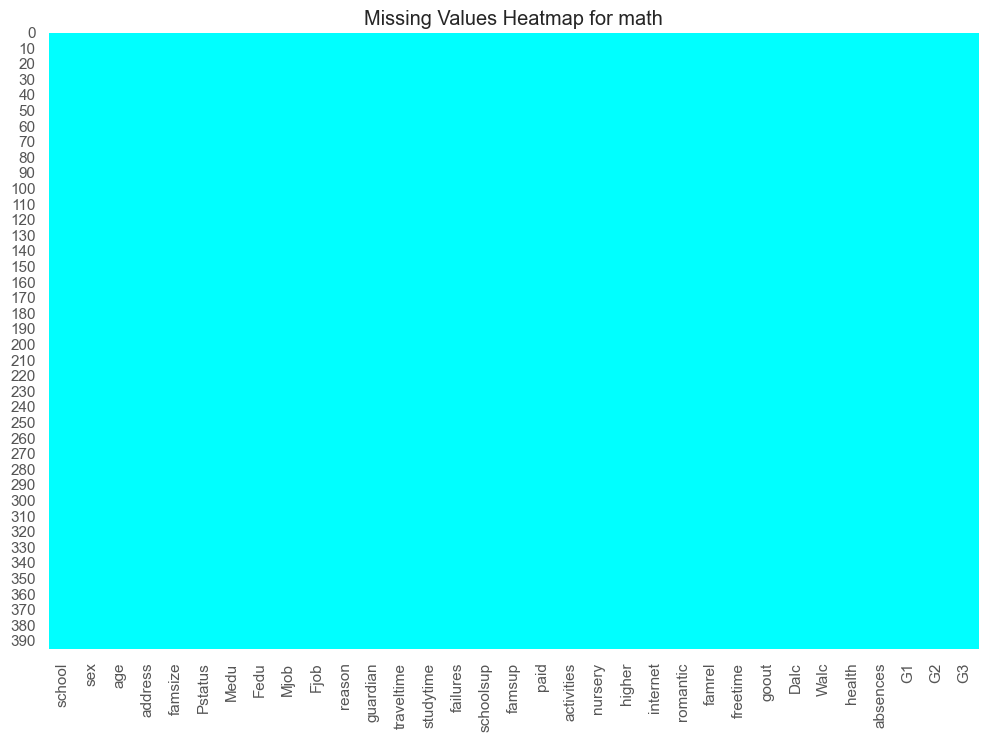

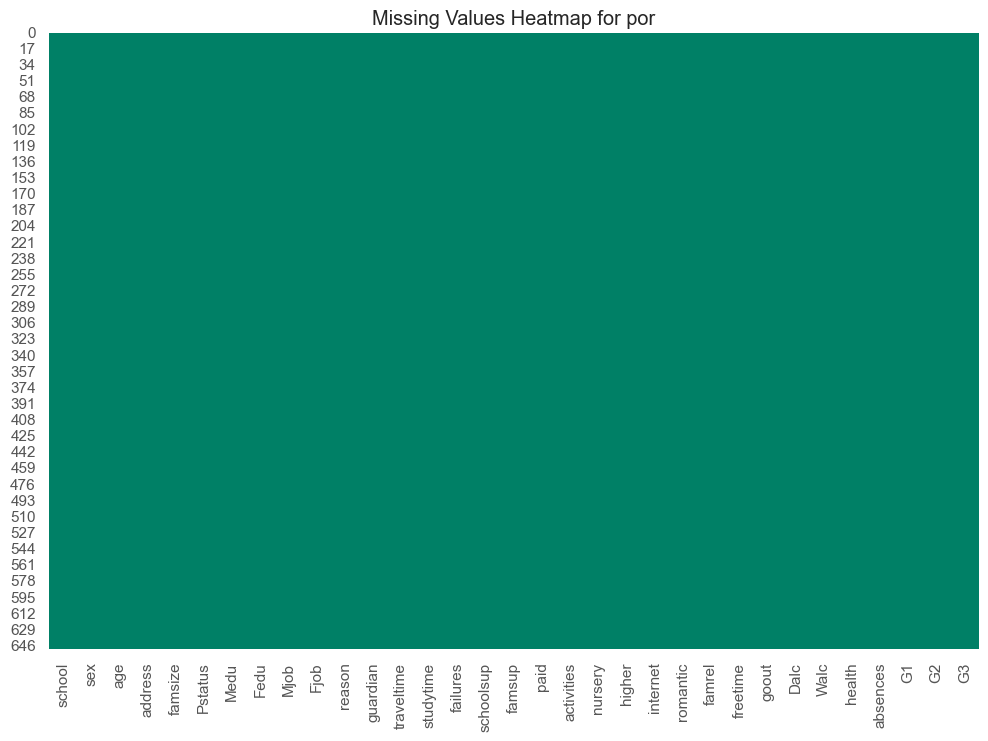

In [25]:
print("Missing Values Count:")
print(math_df.isnull().sum())
print('-'*50)
print(por_df.isnull().sum())

plt.figure(figsize=(12, 8))
sns.heatmap(math_df.isnull(), cbar=False,cmap='cool')
plt.title('Missing Values Heatmap for math')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(por_df.isnull(), cbar=False, cmap='summer')
plt.title('Missing Values Heatmap for por')
plt.show()

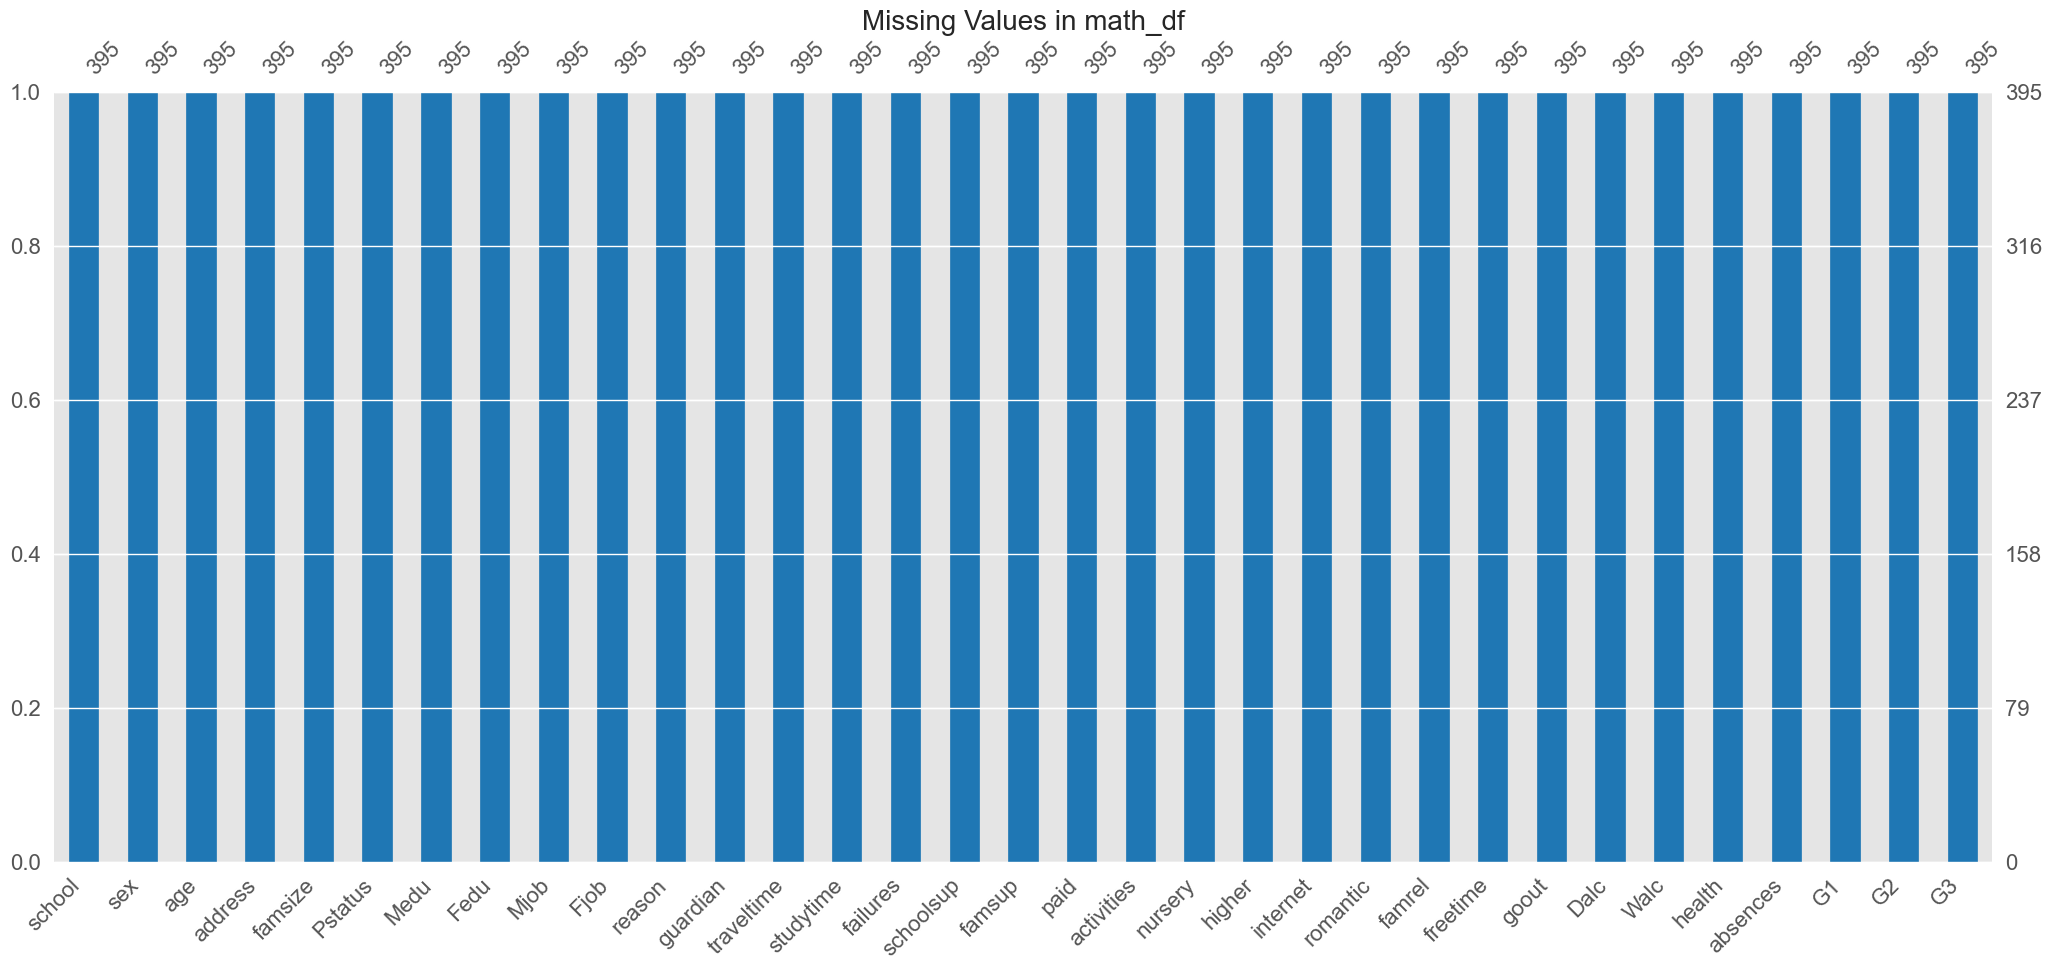

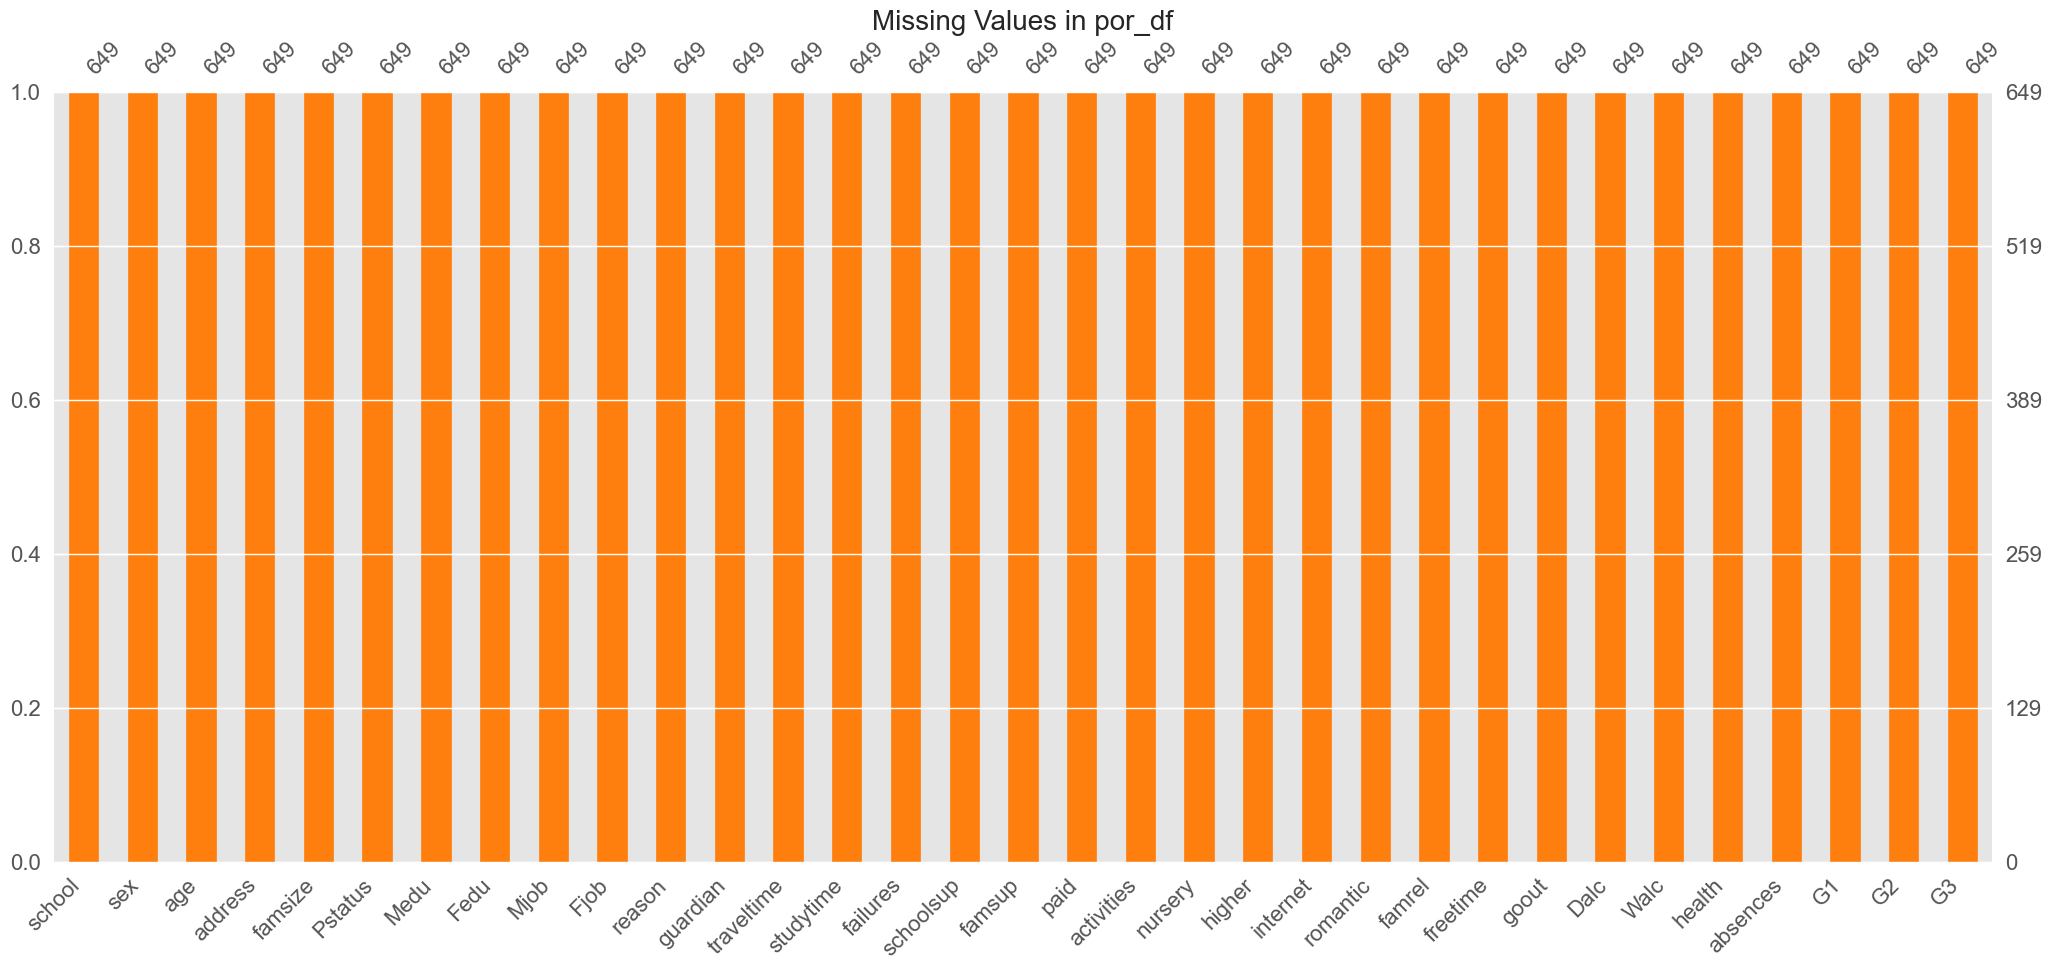

In [28]:
import missingno as msno

ax = msno.bar(math_df)

for bar in ax.patches:
    bar.set_color('#1f77b4') 

plt.title("Missing Values in math_df", fontsize=20)
plt.show()

ax = msno.bar(por_df)
for bar in ax.patches:
    bar.set_color('#ff7f0e')
plt.title("Missing Values in por_df", fontsize=20)
plt.show()



<Axes: >

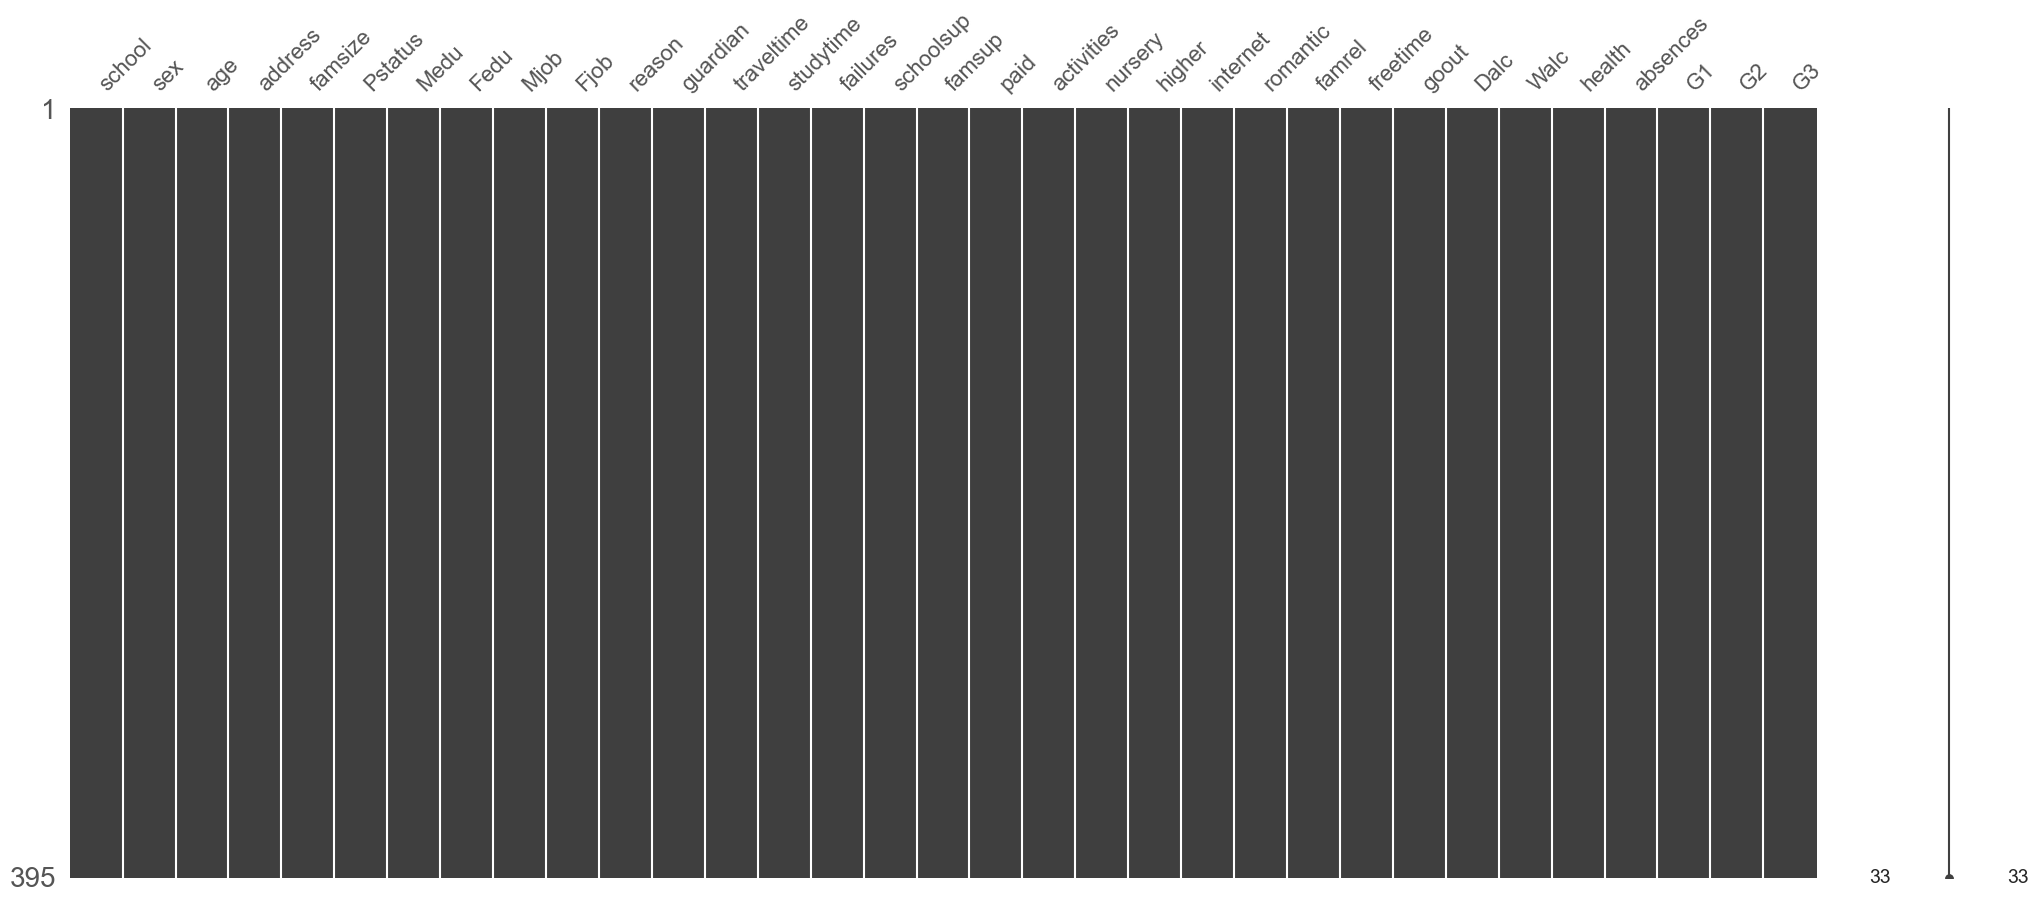

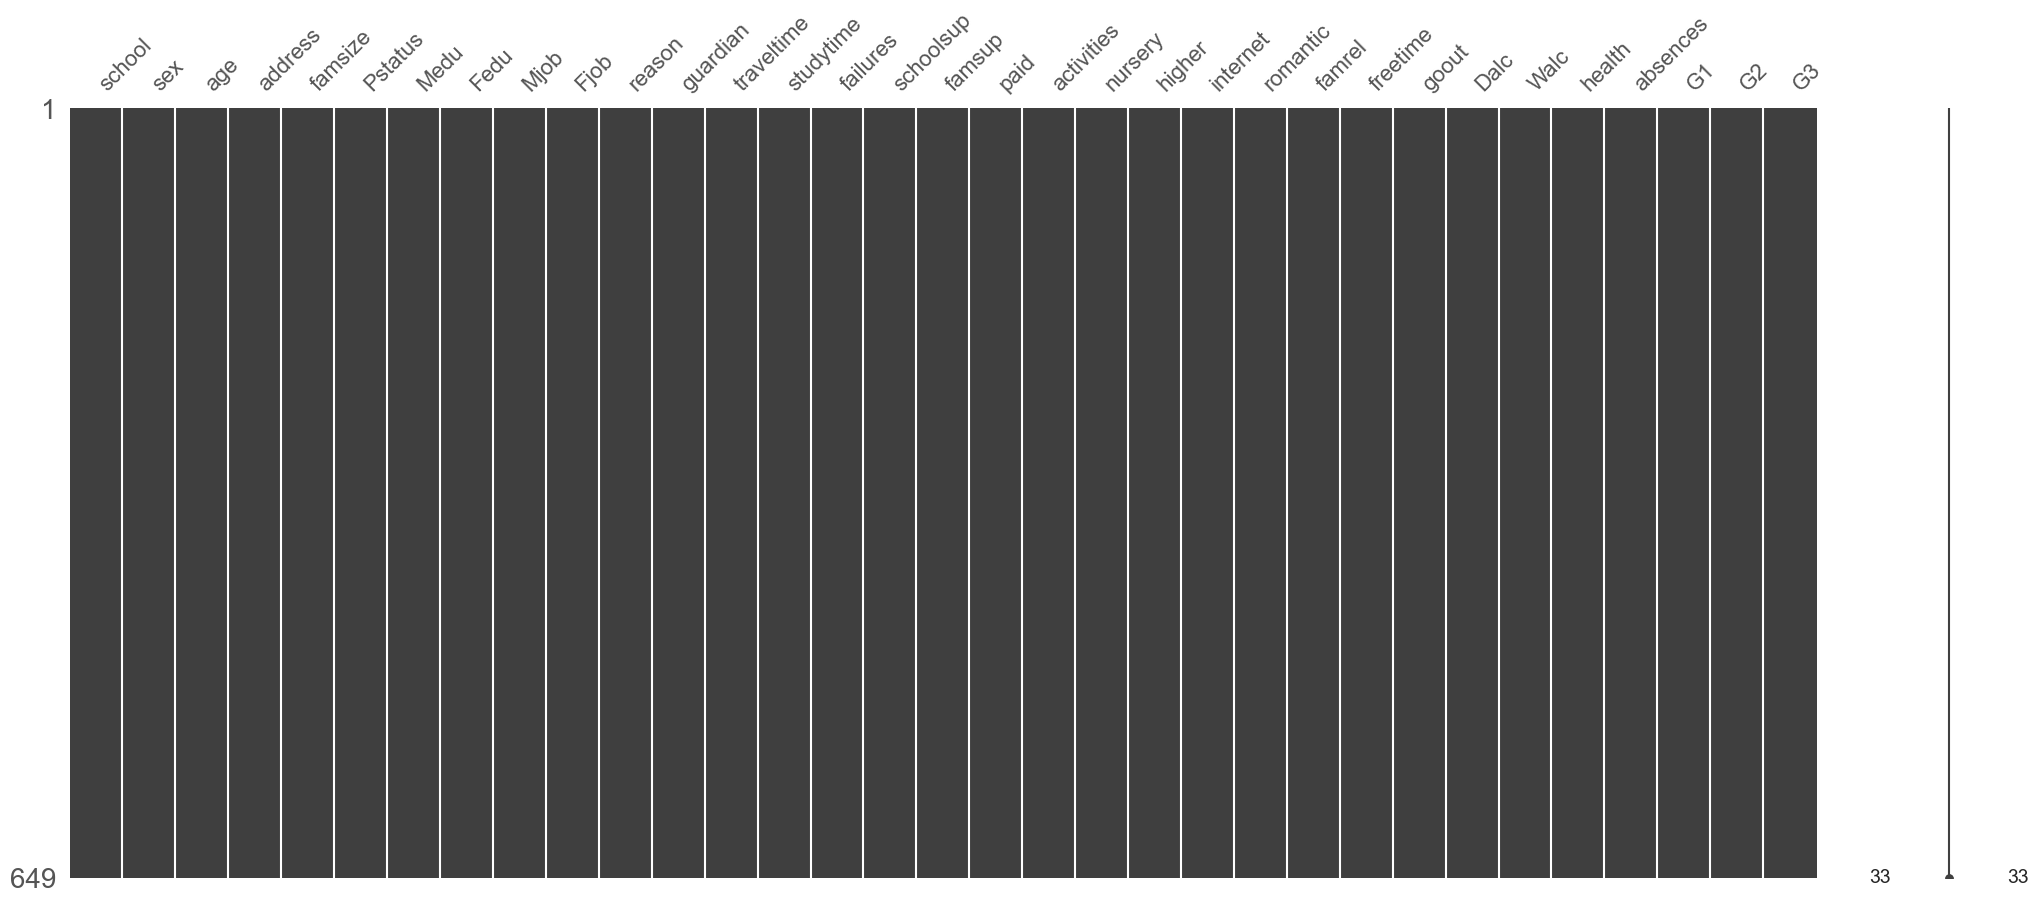

In [31]:

msno.matrix(math_df)
msno.matrix(por_df)

Merge both datasets based on identical attributes to get a combined dataset

In [ ]:

combined_data = pd.merge(math_df, por_df, how='inner', on=[
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
    'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
    'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic',
    'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'
])


List of categorical variables

In [33]:
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                    'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                    'nursery', 'higher', 'internet', 'romantic']

for col in categorical_cols:
    print(combined_data[col].value_counts())


school
GP    32
MS     7
Name: count, dtype: int64
sex
F    20
M    19
Name: count, dtype: int64
address
U    31
R     8
Name: count, dtype: int64
famsize
GT3    26
LE3    13
Name: count, dtype: int64
Pstatus
T    36
A     3
Name: count, dtype: int64
Mjob
other       19
services     6
at_home      6
teacher      5
health       3
Name: count, dtype: int64
Fjob
other       19
services    11
at_home      4
teacher      3
health       2
Name: count, dtype: int64
reason
course        16
home          13
reputation     7
other          3
Name: count, dtype: int64
guardian
mother    21
father    14
other      4
Name: count, dtype: int64
schoolsup
no     33
yes     6
Name: count, dtype: int64
famsup
no     23
yes    16
Name: count, dtype: int64
paid
no     37
yes     2
Name: count, dtype: int64
activities
no     21
yes    18
Name: count, dtype: int64
nursery
yes    30
no      9
Name: count, dtype: int64
higher
yes    39
Name: count, dtype: int64
internet
yes    29
no     10
Name: count, dtype:

 List of numerical variables

In [34]:
numerical_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
                  'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

print(combined_data[numerical_cols].describe())


             age       Medu       Fedu  traveltime  studytime   failures  \
count  39.000000  39.000000  39.000000   39.000000  39.000000  39.000000   
mean   16.282051   2.666667   2.487179    1.384615   1.974359   0.179487   
std     1.255487   1.242521   1.097168    0.673380   0.842527   0.555915   
min    15.000000   0.000000   1.000000    1.000000   1.000000   0.000000   
25%    15.000000   2.000000   2.000000    1.000000   1.000000   0.000000   
50%    16.000000   3.000000   2.000000    1.000000   2.000000   0.000000   
75%    17.000000   4.000000   3.000000    2.000000   2.000000   0.000000   
max    19.000000   4.000000   4.000000    3.000000   4.000000   3.000000   

          famrel   freetime      goout       Dalc       Walc     health  \
count  39.000000  39.000000  39.000000  39.000000  39.000000  39.000000   
mean    4.230769   3.384615   2.743590   1.333333   2.102564   3.358974   
std     0.776685   0.877058   1.044231   0.621261   1.391608   1.441622   
min     2.00000

In [ ]:

print(combined_data.columns)


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1_x', 'G2_x', 'G3_x', 'G1_y', 'G2_y',
       'G3_y'],
      dtype='object')


Choose the appropriate column for the target variable. For example, you may choose 'G3_x' if it represents the grade you want to analyze

count    39.000000
mean     12.128205
std       4.181283
min       0.000000
25%      10.000000
50%      12.000000
75%      15.000000
max      19.000000
Name: G3_x, dtype: float64


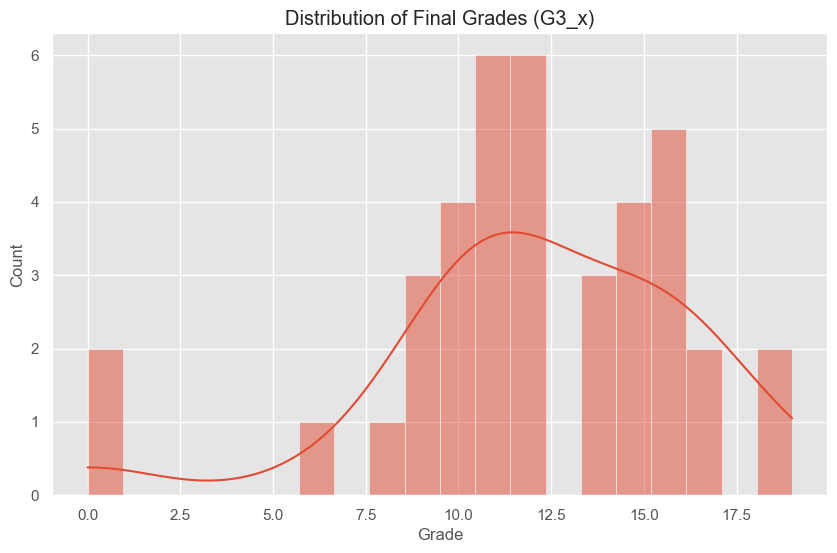

In [36]:
target_col = 'G3_x' 
if target_col in combined_data.columns:
    print(combined_data[target_col].describe())

    plt.figure(figsize=(10, 6))
    sns.histplot(combined_data[target_col], bins=20, kde=True)
    plt.title('Distribution of Final Grades (G3_x)')
    plt.xlabel('Grade')
    plt.ylabel('Count')
    plt.show()
else:
    print(f"Column '{target_col}' does not exist in the DataFrame.")


count    39.000000
mean     12.589744
std       3.143230
min       0.000000
25%      11.000000
50%      12.000000
75%      15.000000
max      18.000000
Name: G3_y, dtype: float64


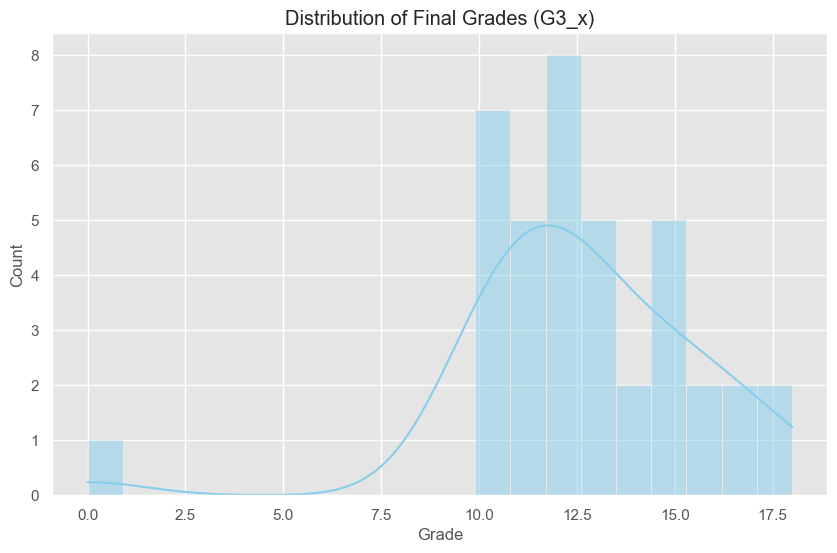

In [37]:
target_col = 'G3_y' 
if target_col in combined_data.columns:
    print(combined_data[target_col].describe())

    plt.figure(figsize=(10, 6))
    sns.histplot(combined_data[target_col], bins=20, kde=True, color='skyblue')
    plt.title('Distribution of Final Grades (G3_x)')
    plt.xlabel('Grade')
    plt.ylabel('Count')
    plt.show()
else:
    print(f"Column '{target_col}' does not exist in the DataFrame.")


combining target variables

In [ ]:
combined_data['G3_combined'] = combined_data[['G3_x', 'G3_y']].mean(axis=1)
combined_data['G1_combined'] = combined_data[['G1_x', 'G1_y']].mean(axis=1)
combined_data['G2_combined'] = combined_data[['G2_x', 'G2_y']].mean(axis=1)

In [39]:
target_col = 'G3_combined'
print("Columns in the dataset after handling target variable:", combined_data.columns)
print("Target column:", target_col)



Columns in the dataset after handling target variable: Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1_x', 'G2_x', 'G3_x', 'G1_y', 'G2_y',
       'G3_y', 'G3_combined', 'G1_combined', 'G2_combined'],
      dtype='object')
Target column: G3_combined


count    39.000000
mean     12.358974
std       3.475381
min       0.000000
25%      10.500000
50%      12.000000
75%      15.000000
max      18.500000
Name: G3_combined, dtype: float64


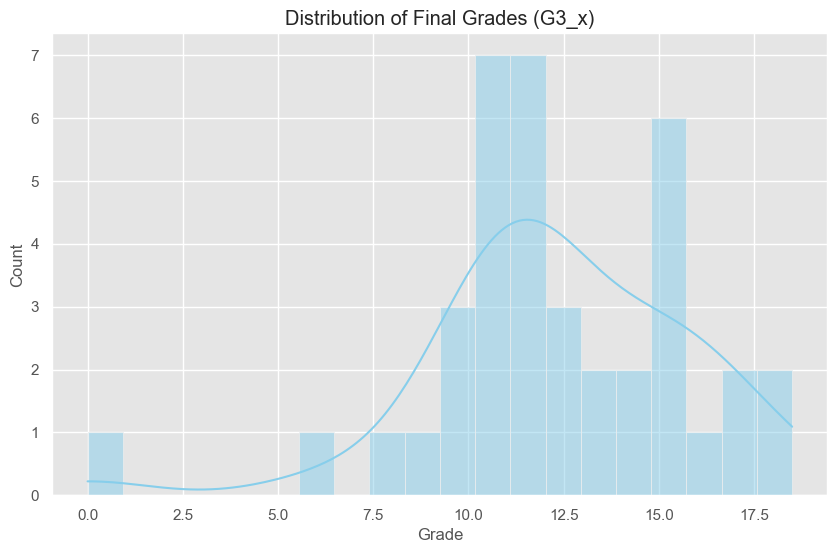

In [40]:
target_col = 'G3_combined'
if target_col in combined_data.columns:
    print(combined_data[target_col].describe())
    plt.figure(figsize=(10, 6))
    sns.histplot(combined_data[target_col], bins=20, kde=True,color='skyblue')
    plt.title('Distribution of Final Grades (G3_x)')
    plt.xlabel('Grade')
    plt.ylabel('Count')
    plt.show()
else:
    print(f"Column '{target_col}' does not exist in the DataFrame.")


Apply log transformation, add a small constant (here 1) to avoid log(0) issue

       G3_combined  G3_combined_log
count    39.000000        39.000000
mean     12.358974         2.527522
std       3.475381         0.467432
min       0.000000         0.000000
25%      10.500000         2.442347
50%      12.000000         2.564949
75%      15.000000         2.772589
max      18.500000         2.970414


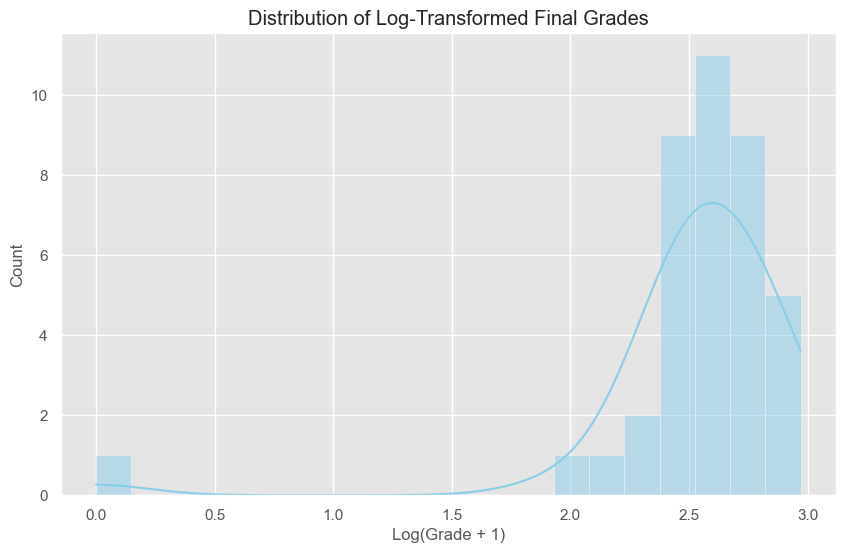

In [41]:
if target_col in combined_data.columns:
 
    combined_data[target_col + '_log'] = np.log(combined_data[target_col] + 1)
    print(combined_data[[target_col, target_col + '_log']].describe())

    plt.figure(figsize=(10, 6))
    sns.histplot(combined_data[target_col + '_log'], bins=20, kde=True,color='skyblue')
    plt.title('Distribution of Log-Transformed Final Grades')
    plt.xlabel('Log(Grade + 1)')
    plt.ylabel('Count')
    plt.show()
else:
    print(f"Column '{target_col}' does not exist in the DataFrame.")

# Outlier Detection using IQR Method

In [ ]:
def plot_boxplots(data, columns):
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(columns, 1):
        plt.subplot(5, 3, i)
        sns.boxplot(y=data[col],color='green')
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

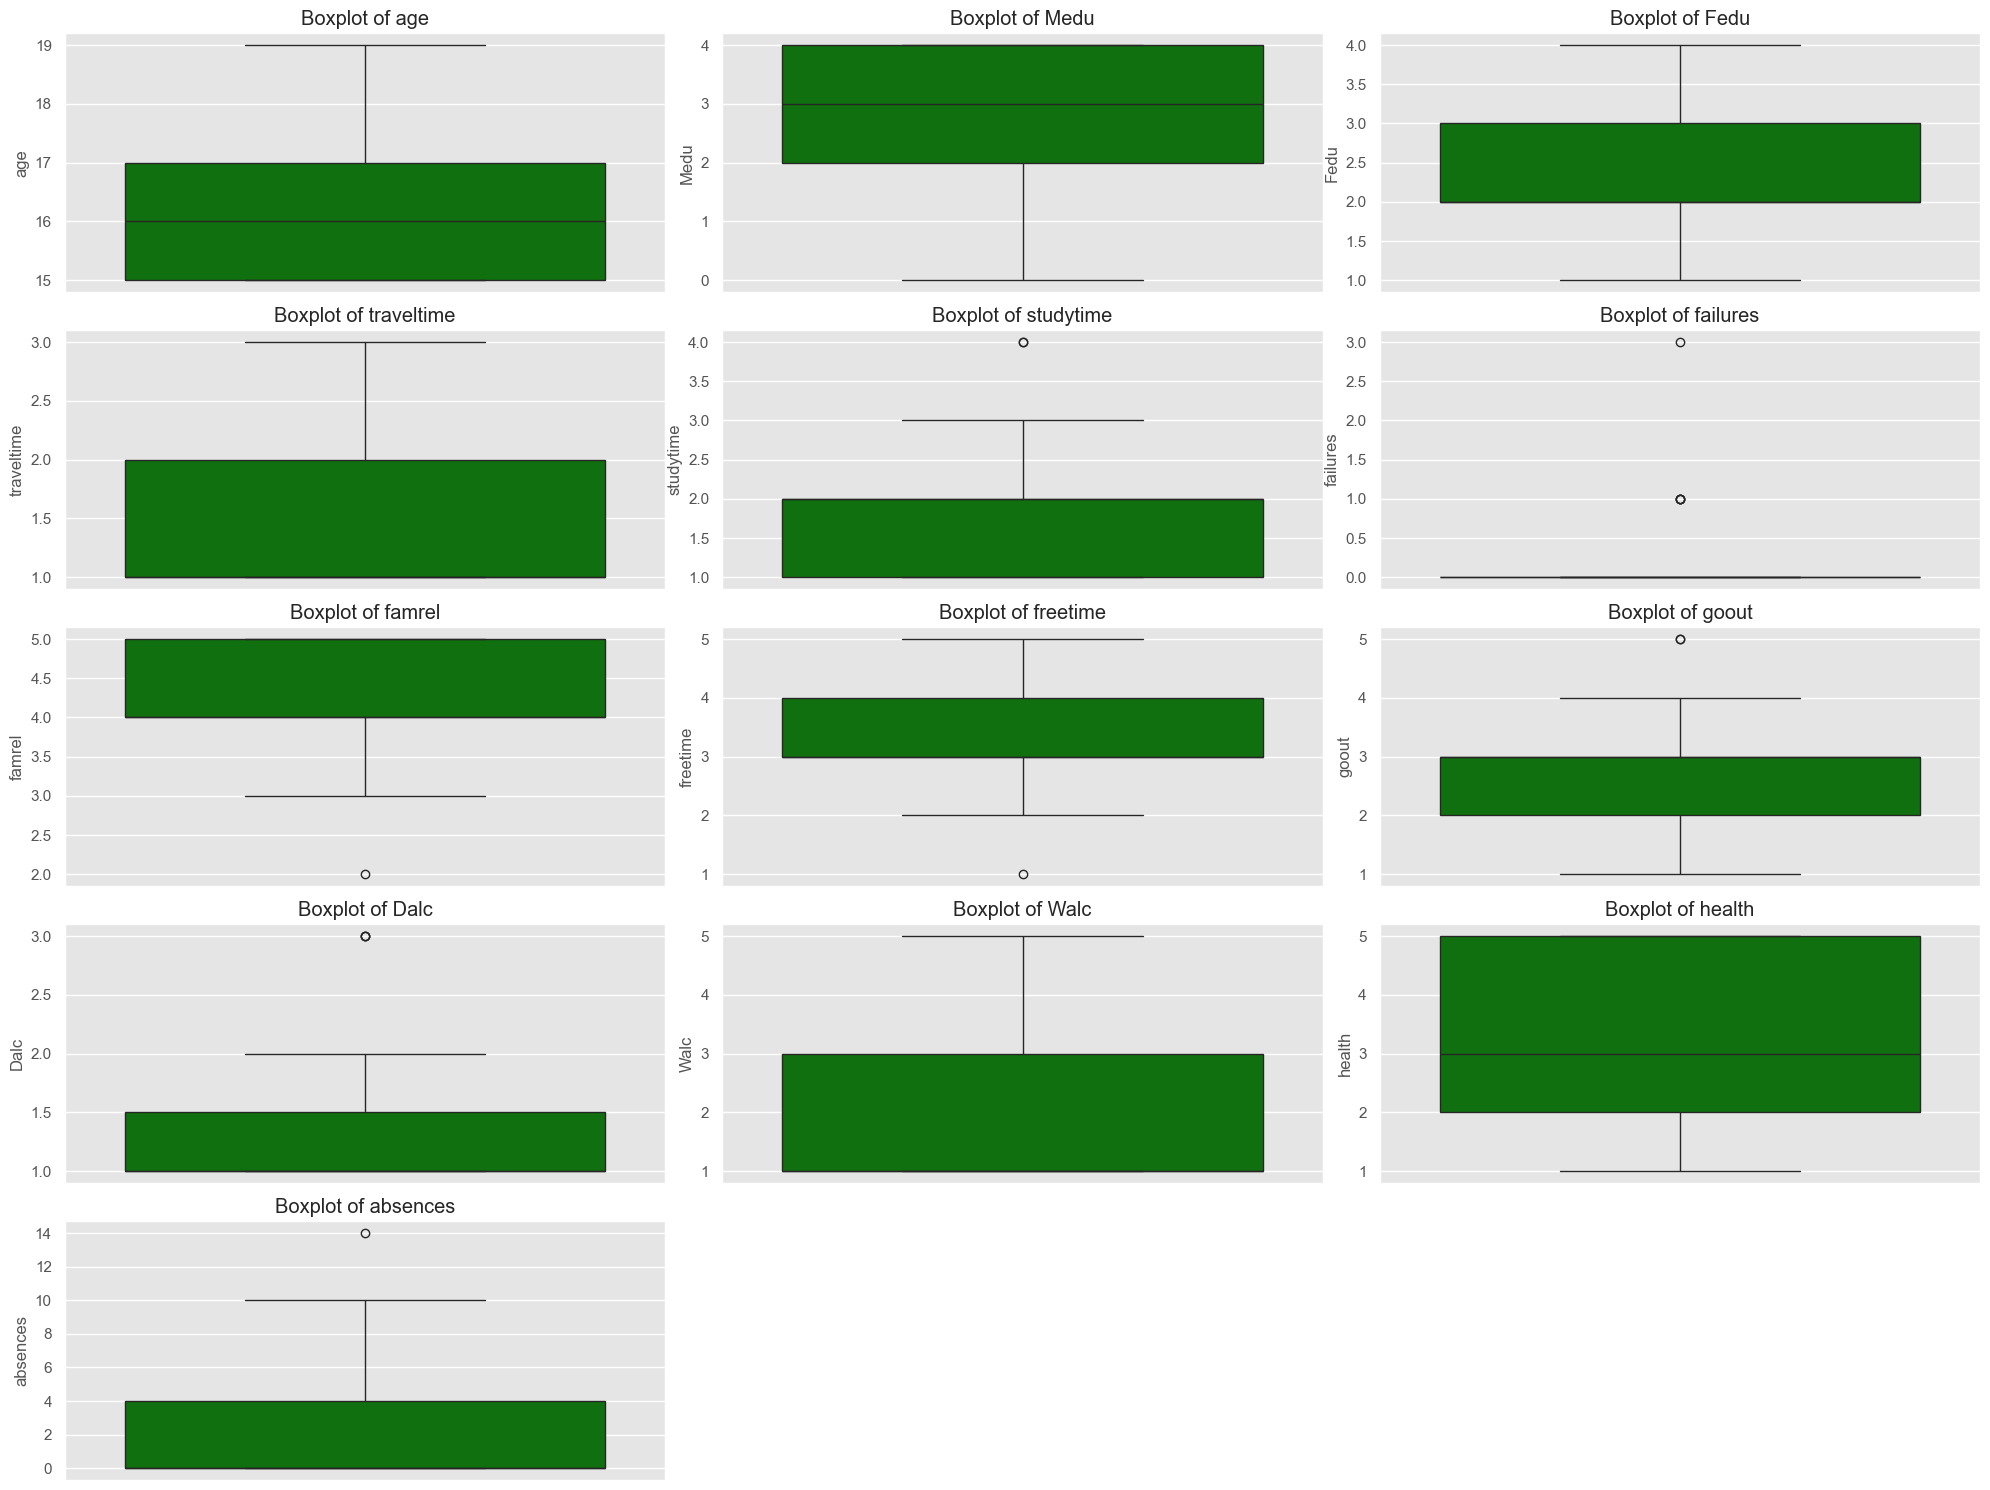

In [44]:
plot_boxplots(combined_data, numerical_cols)

In [45]:
Q1 = combined_data[target_col].quantile(0.25)
Q3 = combined_data[target_col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = combined_data[(combined_data[target_col] < lower_bound) | (combined_data[target_col] > upper_bound)]
cleaned_data = combined_data[(combined_data[target_col] >= lower_bound) & (combined_data[target_col] <= upper_bound)]

print(f'Number of outliers: {outliers.shape[0]}')


Number of outliers: 1


Function to detect and remove outlier using IQR method

Number of outliers in G3_combined: 1


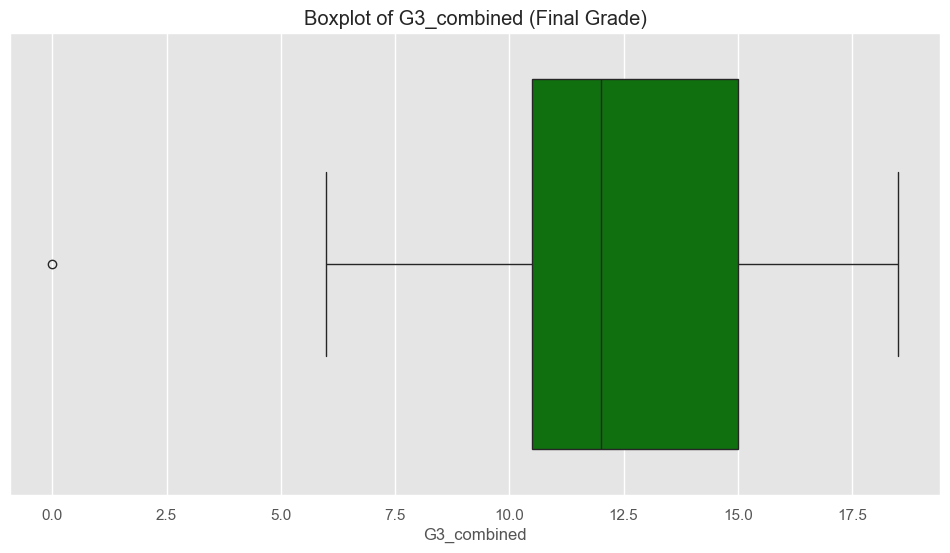

Original data shape: (39, 40)
Cleaned data shape: (38, 40)


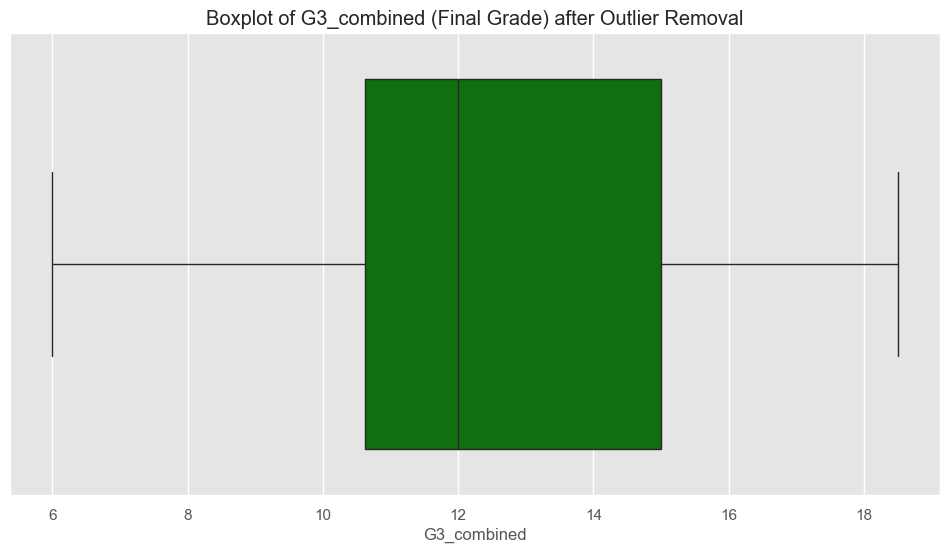

In [46]:
def detect_outliers(combined_data, target_col):
    Q1 = combined_data[target_col].quantile(0.25)
    Q3 = combined_data[target_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = combined_data[(combined_data[target_col] < lower_bound) | (combined_data[target_col] > upper_bound)]
    return outliers

def remove_outliers(combined_data, target_col):
    Q1 = combined_data[target_col].quantile(0.25)
    Q3 = combined_data[target_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    combined_data_cleaned = combined_data[(combined_data[target_col] >= lower_bound) & (combined_data[target_col] <= upper_bound)]
    return combined_data_cleaned

outliers_G3 = detect_outliers(combined_data, target_col)
print(f'Number of outliers in {target_col}: {outliers_G3.shape[0]}')

plt.figure(figsize=(12, 6))
sns.boxplot(x=combined_data[target_col],color='green')
plt.title(f'Boxplot of {target_col} (Final Grade)')
plt.show()

cleaned_data = remove_outliers(combined_data, target_col)

print(f'Original data shape: {combined_data.shape}')
print(f'Cleaned data shape: {cleaned_data.shape}')

plt.figure(figsize=(12, 6))
sns.boxplot(x=cleaned_data[target_col],color='green')
plt.title(f'Boxplot of {target_col} (Final Grade) after Outlier Removal')
plt.show()


In [47]:
missing_values = combined_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 Series([], dtype: int64)


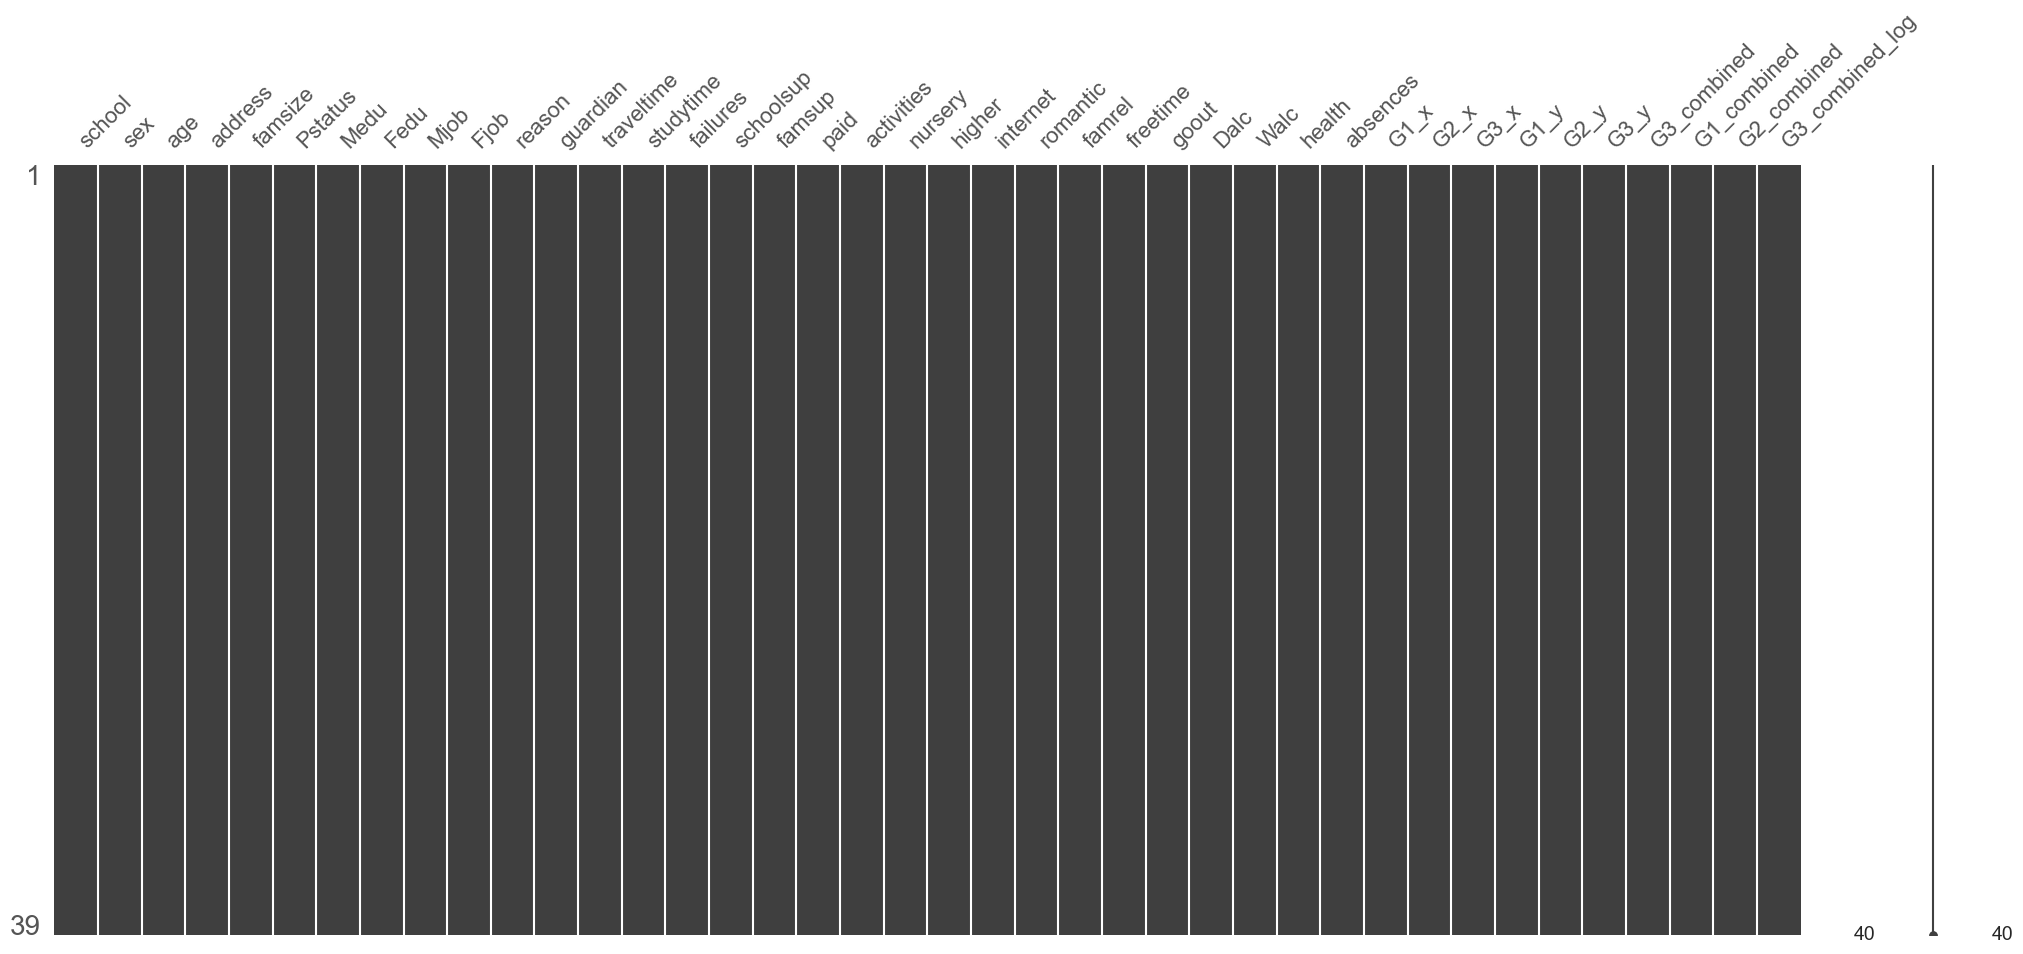

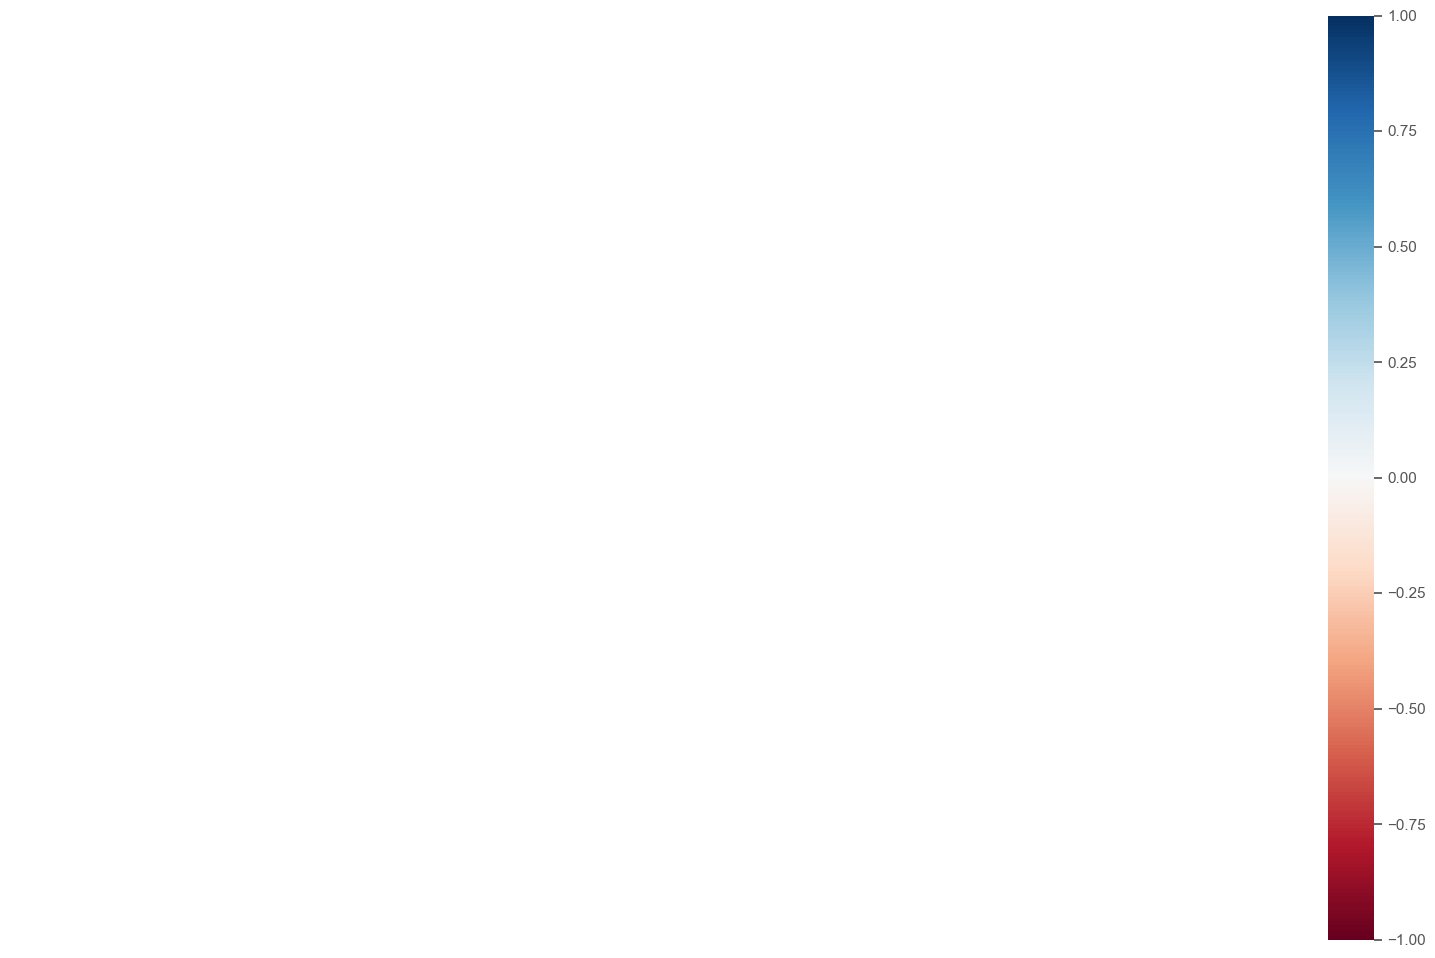

In [48]:
import missingno as msno
msno.matrix(combined_data)
plt.show()

msno.heatmap(combined_data)
plt.show()


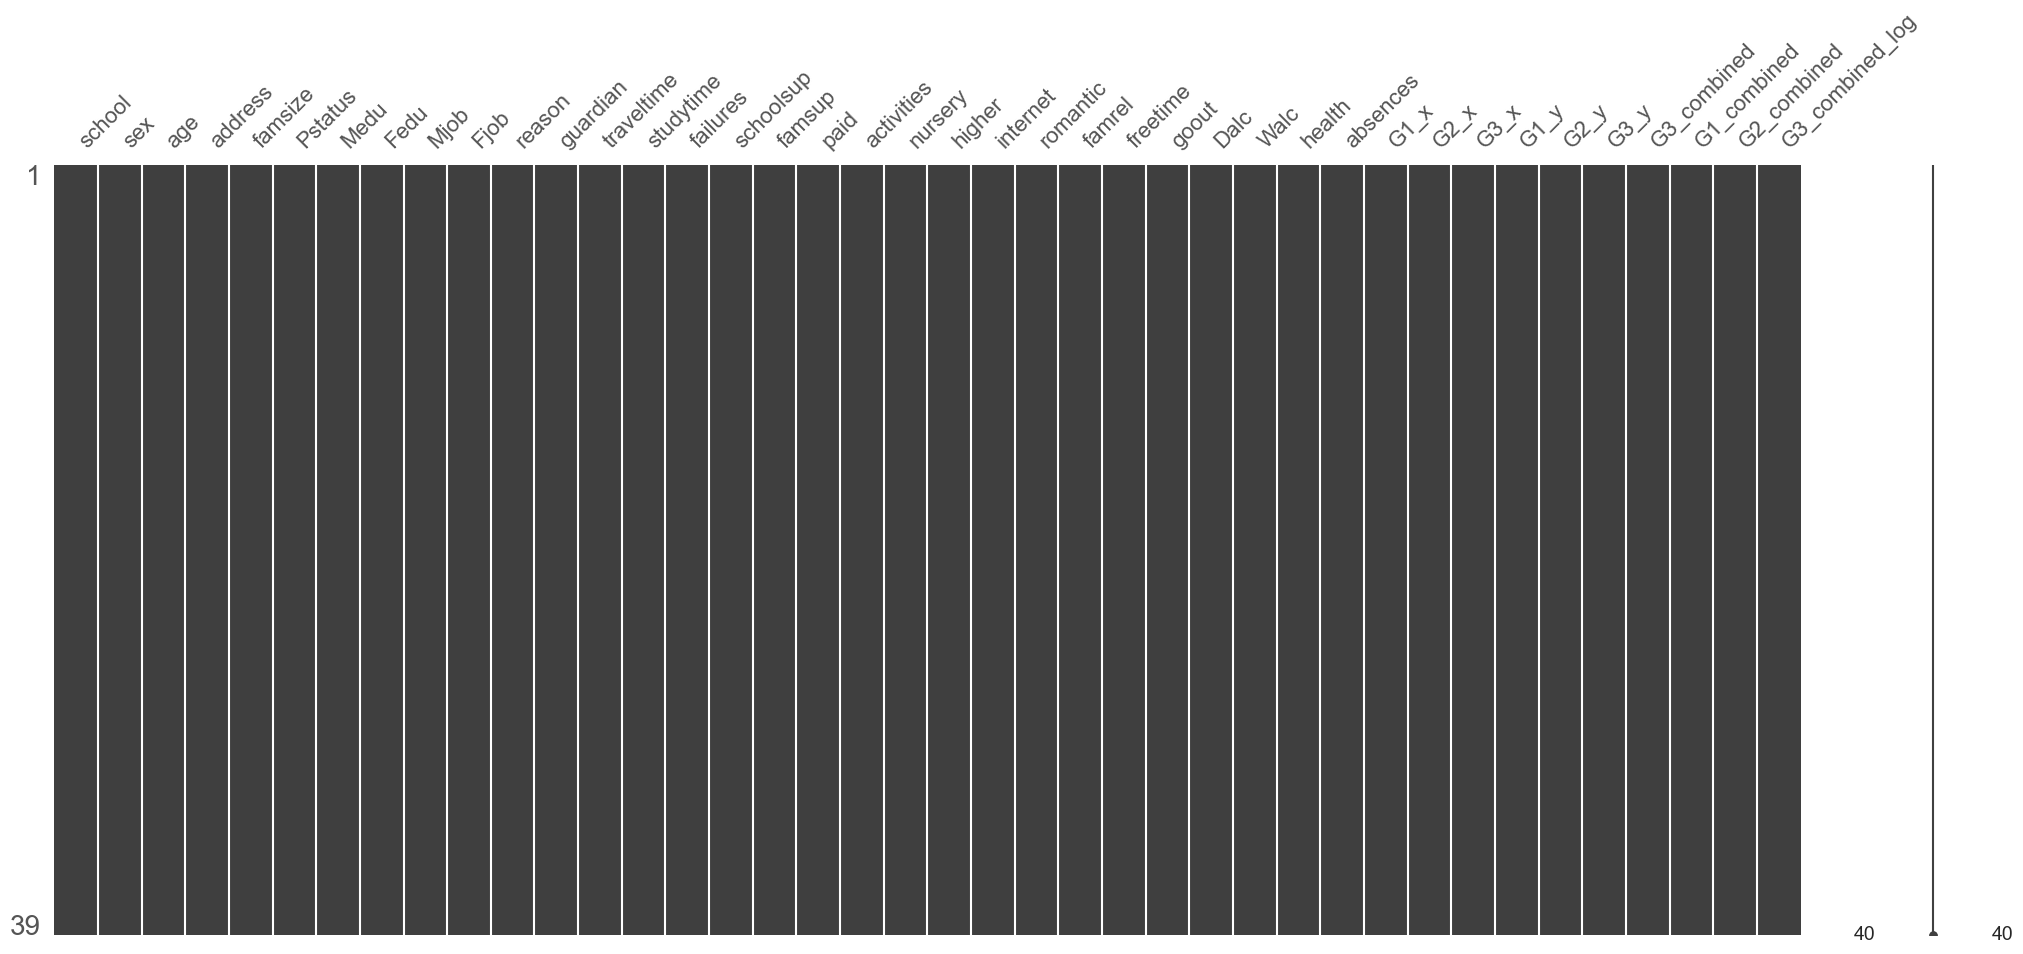

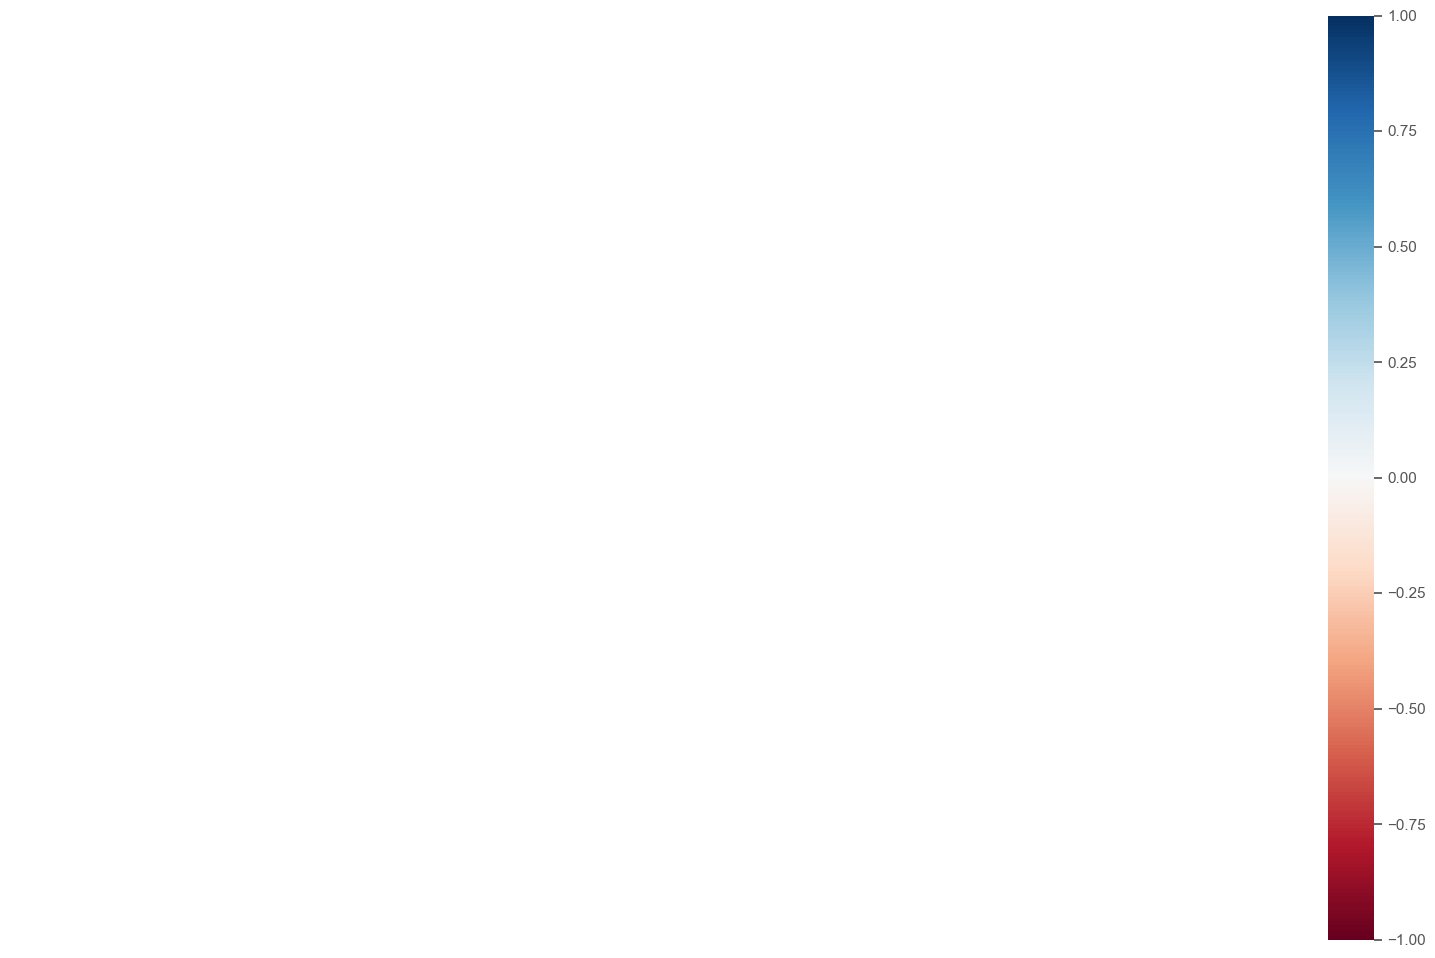

In [49]:
import missingno as msno
msno.matrix(combined_data)
plt.show()

msno.heatmap(combined_data)
plt.show()


# Handling missing values if any

Example: Filling missing values with mean for numerical columns.

Example: Filling missing values with mode for categorical columns

In [ ]:
for col in combined_data.select_dtypes(include=['float64', 'int64']).columns:
    if combined_data[col].isnull().sum() > 0:
        combined_data[col].fillna(combined_data[col].mean(), inplace=True)

for col in combined_data.select_dtypes(include=['object']).columns:
    if combined_data[col].isnull().sum() > 0:
        combined_data[col].fillna(combined_data[col].mode()[0], inplace=True)


# Creating new features, binary encoding the categorical features, Log transformation, skewness handling, 

In [51]:
# Creating a new feature 'FamilySize'
combined_data['FamilySize'] = combined_data['famsize'].apply(lambda x: 1 if x == 'LE3' else 2)


In [52]:
# Creating a new feature 'ParentEdu' by combining mother's and father's education
combined_data['ParentEdu'] = combined_data['Medu'] + combined_data['Fedu']


In [53]:
# Encoding binary categorical features to 0 and 1
binary_cols = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'Pstatus']
for col in binary_cols:
    combined_data[col] = combined_data[col].map({'yes': 1, 'no': 0})
    combined_data[col] = combined_data[col].map({'T': 1, 'A': 0})


In [54]:
# Creating a new feature 'TotalAlcohol' by summing weekday and weekend alcohol consumption
combined_data['TotalAlcohol'] = combined_data['Dalc'] + combined_data['Walc']


In [55]:
# Interaction feature between study time and travel time
combined_data['StudyTravelTime'] = combined_data['studytime'] * combined_data['traveltime']


In [56]:
# Log transformation of 'absences' to handle skewness
combined_data['log_absences'] = np.log1p(combined_data['absences'])


In [57]:
# Creating new features based on grades
combined_data['G1_G2_Avg'] = (combined_data['G1_combined'] + combined_data['G2_combined']) / 2
combined_data['G1_G3_Diff'] = combined_data['G1_combined'] - combined_data['G3_combined']
combined_data['G2_G3_Diff'] = combined_data['G2_combined'] - combined_data['G3_combined']


In [58]:
# Creating dummy variables for nominal categorical features
nominal_cols = ['Mjob', 'Fjob', 'reason', 'guardian']
combined_data = pd.get_dummies(combined_data, columns=nominal_cols, drop_first=True)


In [59]:
# Creating a new feature 'StudyFreeTimeRatio'
combined_data['StudyFreeTimeRatio'] = combined_data['studytime'] / (combined_data['freetime'] + 1)


In [60]:
# Creating a new feature 'TravelStudyRatio'
combined_data['TravelStudyRatio'] = combined_data['traveltime'] / (combined_data['studytime'] + 1)


In [61]:
# Creating a new feature 'HighFamRel' indicating high quality of family relationships
combined_data['HighFamRel'] = combined_data['famrel'].apply(lambda x: 1 if x >= 4 else 0)


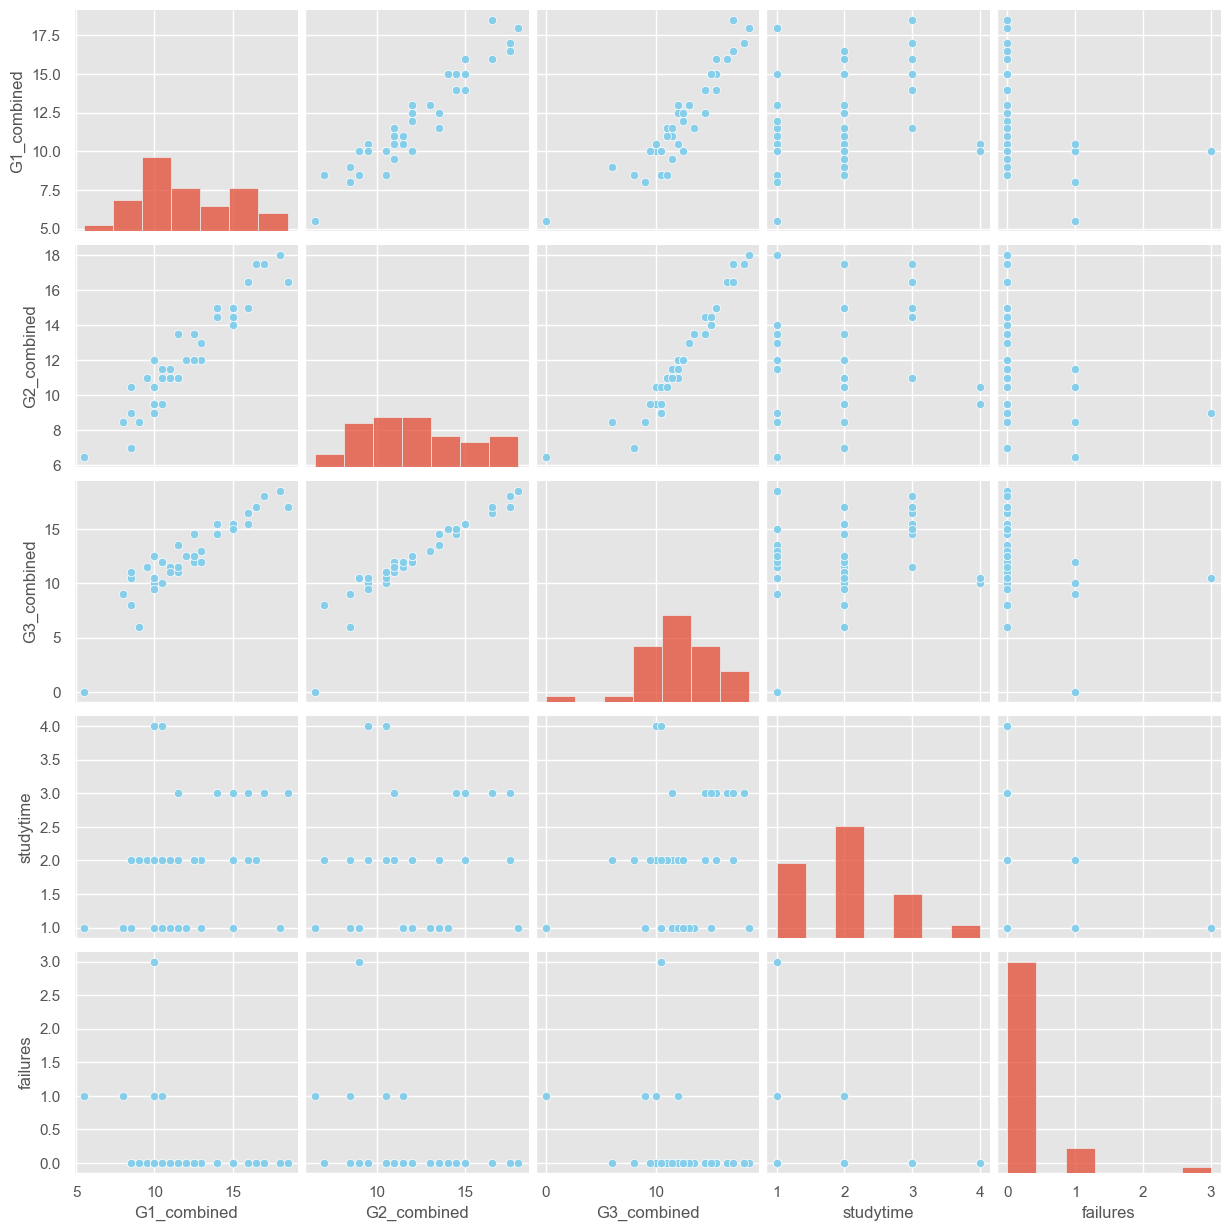

In [62]:
sns.pairplot(combined_data[['G1_combined', 'G2_combined', 'G3_combined', 'studytime', 'failures']],plot_kws={'color': 'skyblue'})
plt.show()


In [63]:
print(combined_data.info())

print(combined_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 60 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              39 non-null     object 
 1   sex                 39 non-null     object 
 2   age                 39 non-null     int64  
 3   address             39 non-null     object 
 4   famsize             39 non-null     object 
 5   Pstatus             0 non-null      float64
 6   Medu                39 non-null     int64  
 7   Fedu                39 non-null     int64  
 8   traveltime          39 non-null     int64  
 9   studytime           39 non-null     int64  
 10  failures            39 non-null     int64  
 11  schoolsup           0 non-null      float64
 12  famsup              0 non-null      float64
 13  paid                0 non-null      float64
 14  activities          0 non-null      float64
 15  nursery             0 non-null      float64
 16  higher    

In [64]:
print(combined_data.describe())


             age  Pstatus       Medu       Fedu  traveltime  studytime  \
count  39.000000      0.0  39.000000  39.000000   39.000000  39.000000   
mean   16.282051      NaN   2.666667   2.487179    1.384615   1.974359   
std     1.255487      NaN   1.242521   1.097168    0.673380   0.842527   
min    15.000000      NaN   0.000000   1.000000    1.000000   1.000000   
25%    15.000000      NaN   2.000000   2.000000    1.000000   1.000000   
50%    16.000000      NaN   3.000000   2.000000    1.000000   2.000000   
75%    17.000000      NaN   4.000000   3.000000    2.000000   2.000000   
max    19.000000      NaN   4.000000   4.000000    3.000000   4.000000   

        failures  schoolsup  famsup  paid  ...  ParentEdu  TotalAlcohol  \
count  39.000000        0.0     0.0   0.0  ...  39.000000     39.000000   
mean    0.179487        NaN     NaN   NaN  ...   5.153846      3.435897   
std     0.555915        NaN     NaN   NaN  ...   2.170841      1.832382   
min     0.000000        NaN     N

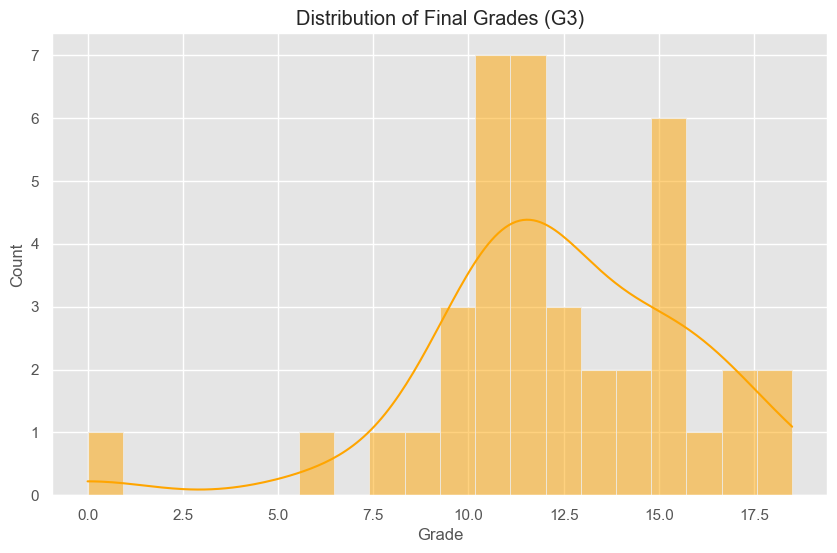

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['G3_combined'], bins=20, kde=True, color='orange')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()


In [66]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 60 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              39 non-null     object 
 1   sex                 39 non-null     object 
 2   age                 39 non-null     int64  
 3   address             39 non-null     object 
 4   famsize             39 non-null     object 
 5   Pstatus             0 non-null      float64
 6   Medu                39 non-null     int64  
 7   Fedu                39 non-null     int64  
 8   traveltime          39 non-null     int64  
 9   studytime           39 non-null     int64  
 10  failures            39 non-null     int64  
 11  schoolsup           0 non-null      float64
 12  famsup              0 non-null      float64
 13  paid                0 non-null      float64
 14  activities          0 non-null      float64
 15  nursery             0 non-null      float64
 16  higher    

In [67]:
print(combined_data.columns)


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1_x',
       'G2_x', 'G3_x', 'G1_y', 'G2_y', 'G3_y', 'G3_combined', 'G1_combined',
       'G2_combined', 'G3_combined_log', 'FamilySize', 'ParentEdu',
       'TotalAlcohol', 'StudyTravelTime', 'log_absences', 'G1_G2_Avg',
       'G1_G3_Diff', 'G2_G3_Diff', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_mother', 'guardian_other',
       'StudyFreeTimeRatio', 'TravelStudyRatio', 'HighFamRel'],
      dtype='object')


Label Encoder to encode categorical columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid',
                    'activities', 'nursery', 'higher', 'internet', 'romantic',
                    'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
                    'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
                    'reason_home', 'reason_other', 'reason_reputation',
                    'guardian_mother', 'guardian_other']

encoder = LabelEncoder()
for col in categorical:
    if col in combined_data.columns:
        combined_data[col] = encoder.fit_transform(combined_data[col])
    else:
        print(f"Column '{col}' not found in the DataFrame.")


In [69]:
print(combined_data.isna().sum())


school                0
sex                   0
age                   0
address               0
famsize               0
Pstatus               0
Medu                  0
Fedu                  0
traveltime            0
studytime             0
failures              0
schoolsup             0
famsup                0
paid                  0
activities            0
nursery               0
higher                0
internet              0
romantic              0
famrel                0
freetime              0
goout                 0
Dalc                  0
Walc                  0
health                0
absences              0
G1_x                  0
G2_x                  0
G3_x                  0
G1_y                  0
G2_y                  0
G3_y                  0
G3_combined           0
G1_combined           0
G2_combined           0
G3_combined_log       0
FamilySize            0
ParentEdu             0
TotalAlcohol          0
StudyTravelTime       0
log_absences          0
G1_G2_Avg       

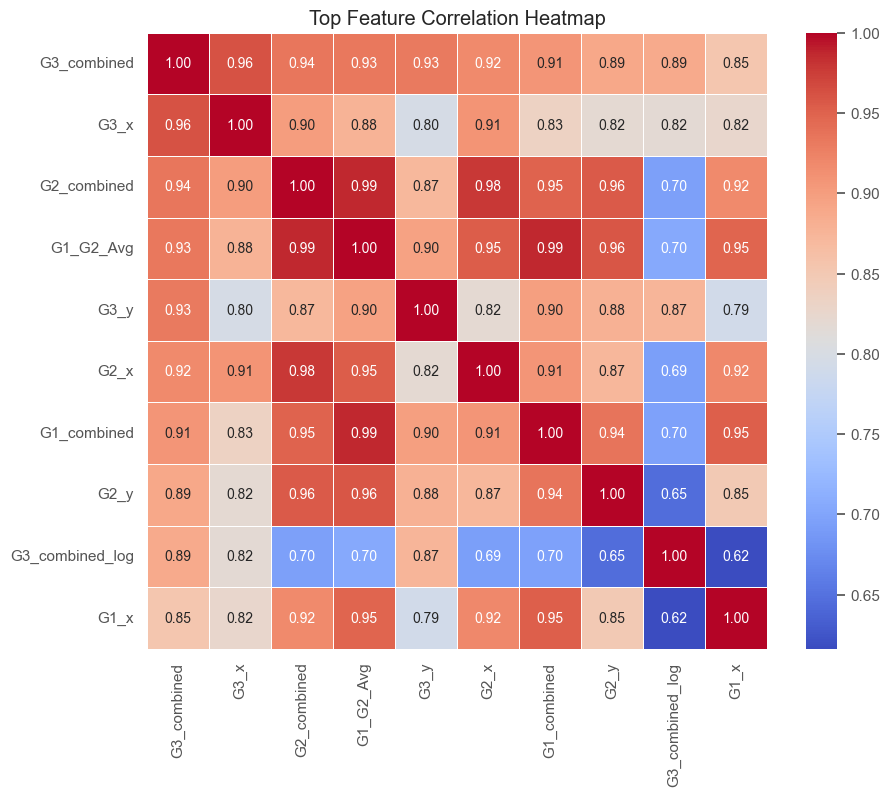

In [ ]:
# Compute the correlation matrix of top 10 features
correlation_matrix = combined_data.corr()

target_corr = correlation_matrix[target_col].abs().sort_values(ascending=False)
top_features = target_corr.index[:10]
filtered_corr = combined_data[top_features].corr()

plt.figure(figsize=(10, 8), dpi=100)
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Top Feature Correlation Heatmap')
plt.show()


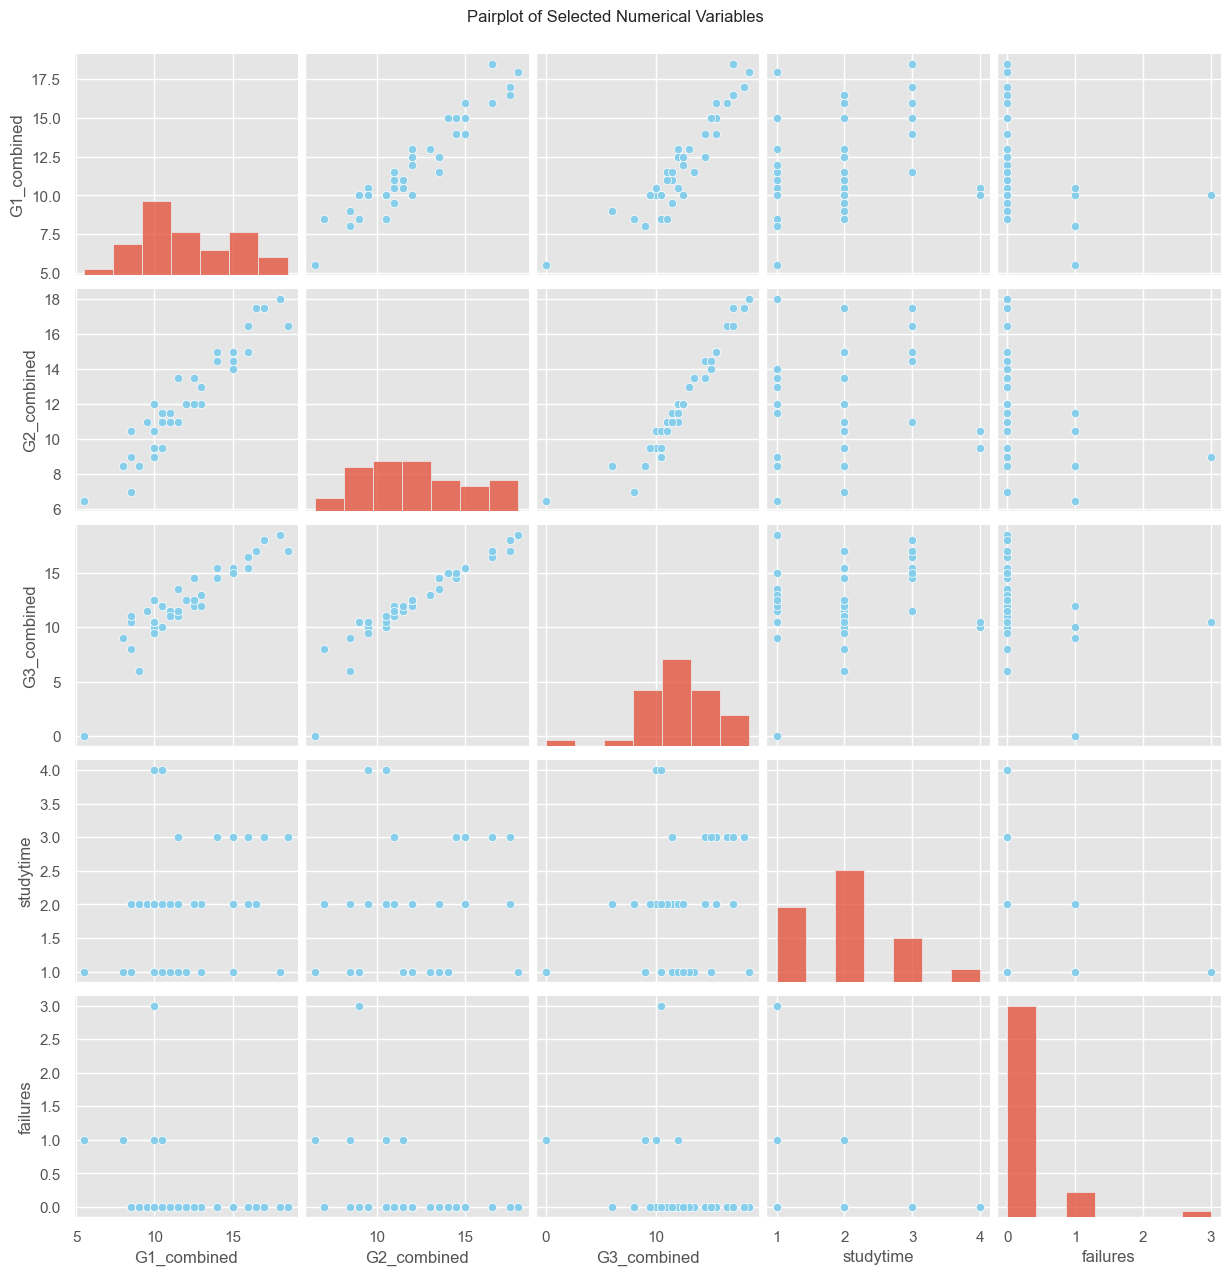

In [73]:
sns.pairplot(combined_data[['G1_combined', 'G2_combined', 'G3_combined', 'studytime', 'failures']],plot_kws={'color': 'skyblue'})
plt.suptitle('Pairplot of Selected Numerical Variables', y=1.02)
plt.show()


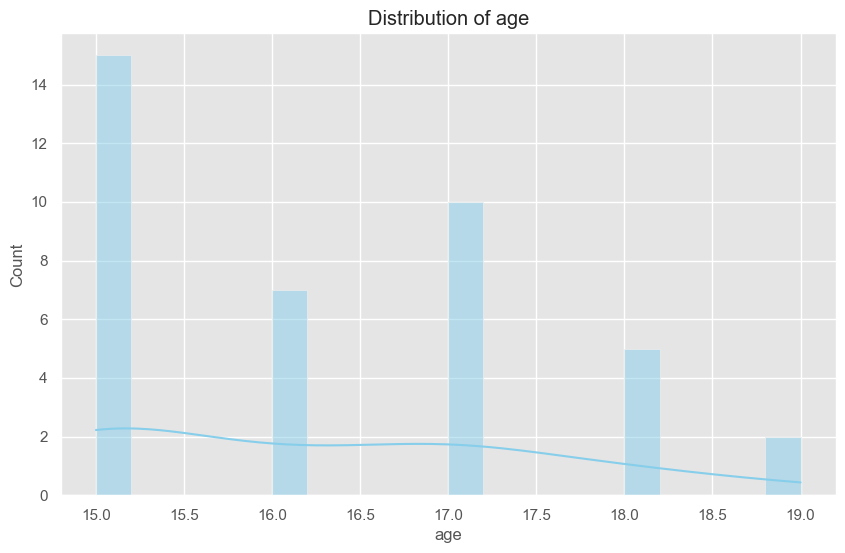

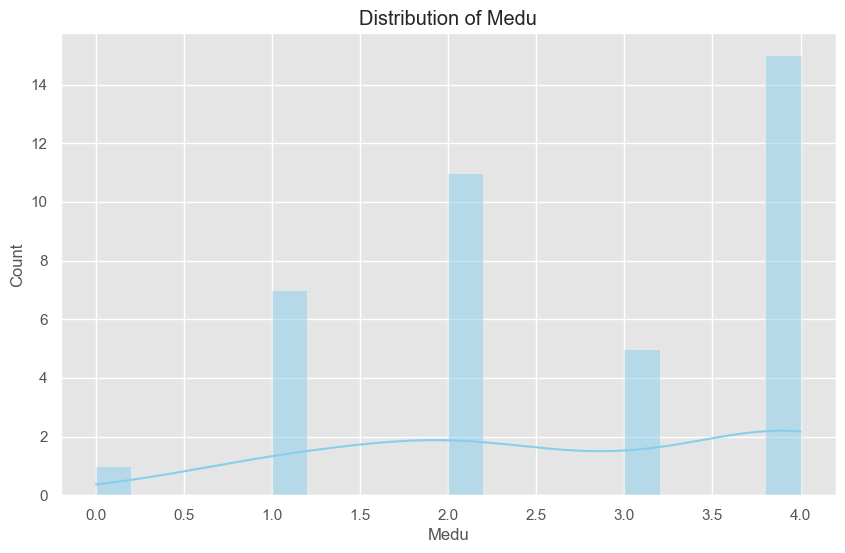

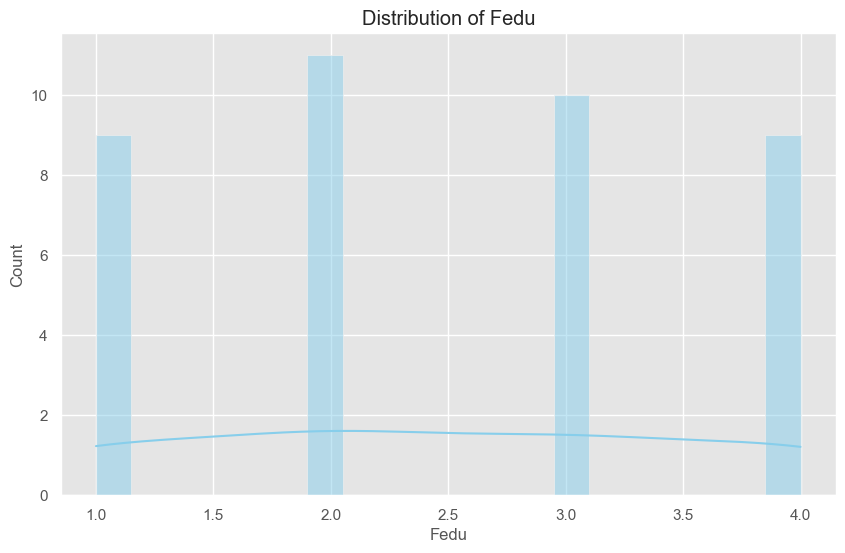

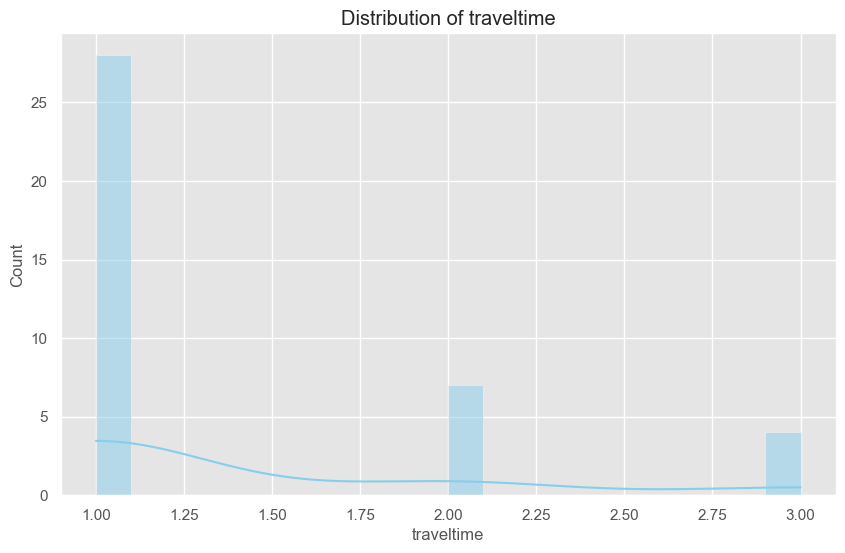

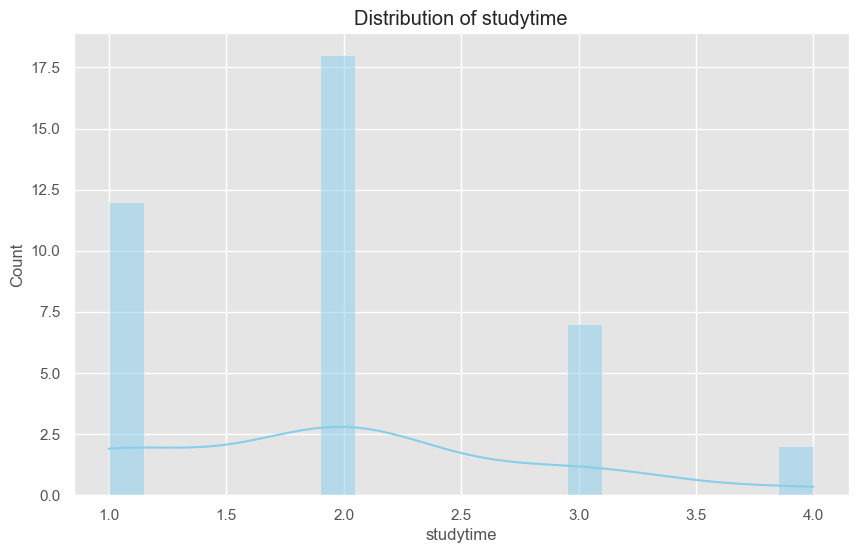

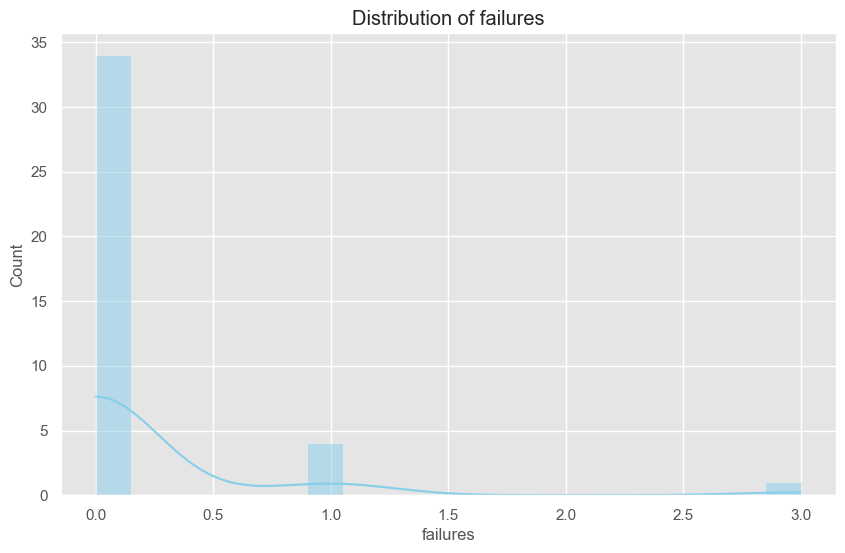

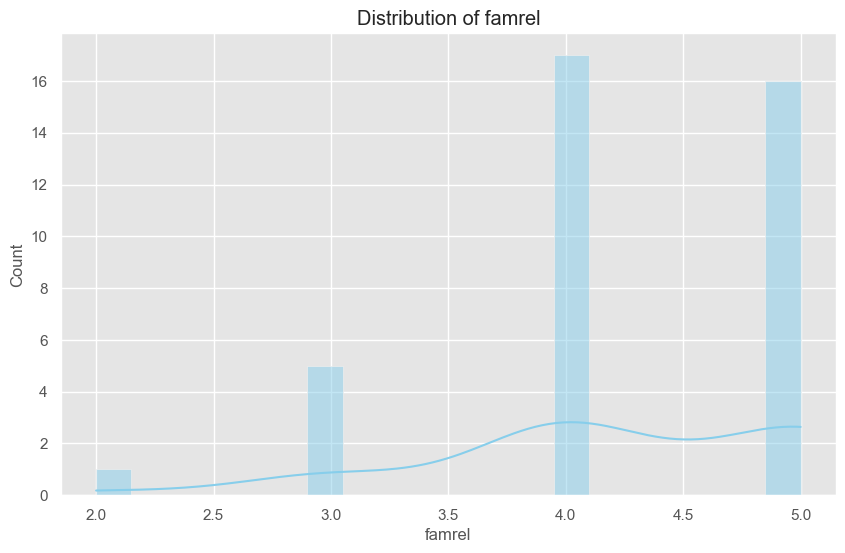

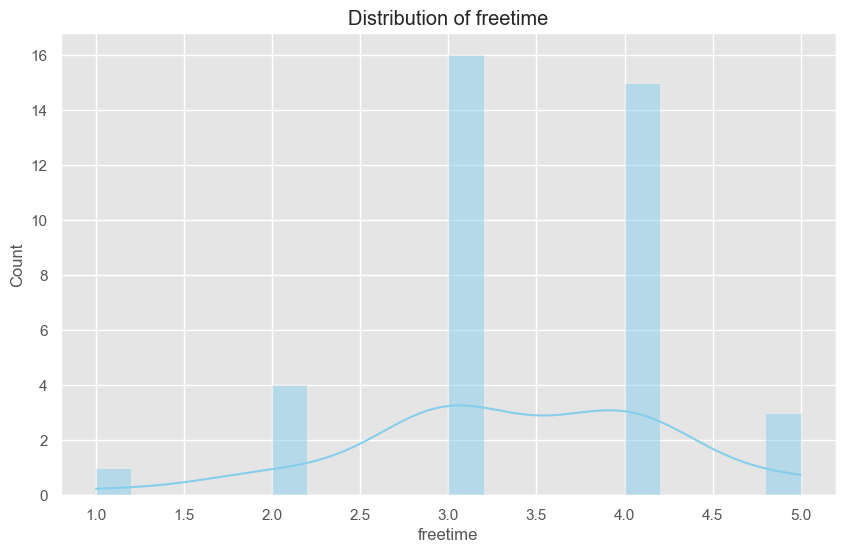

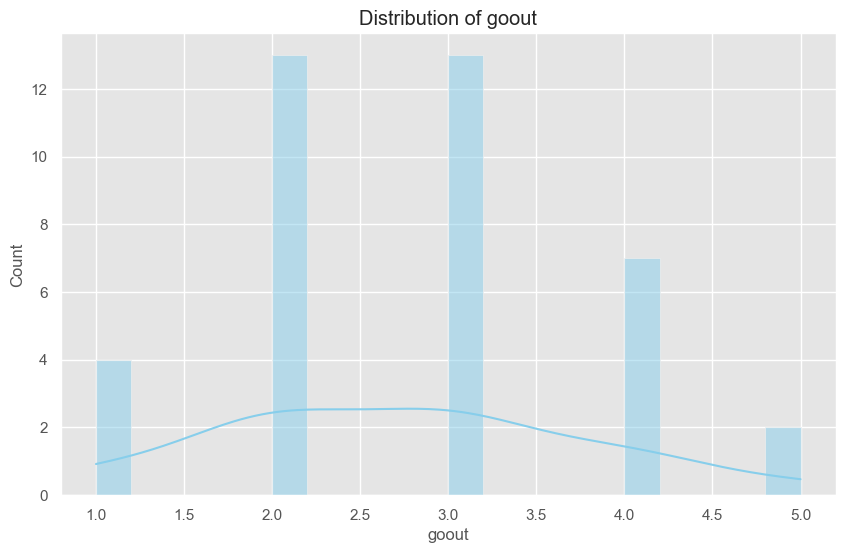

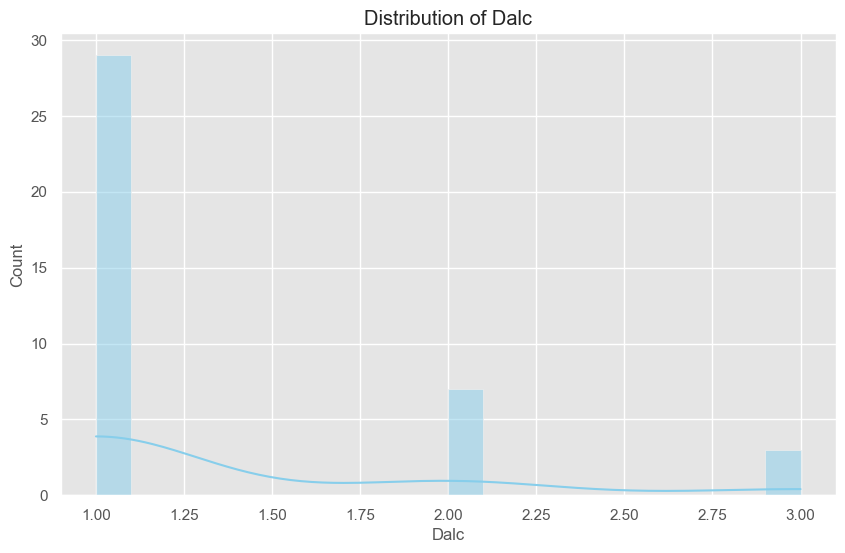

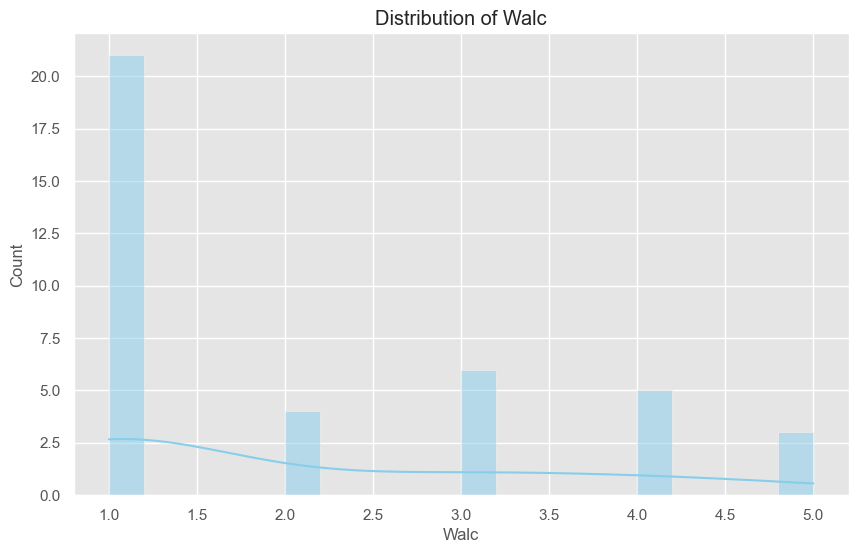

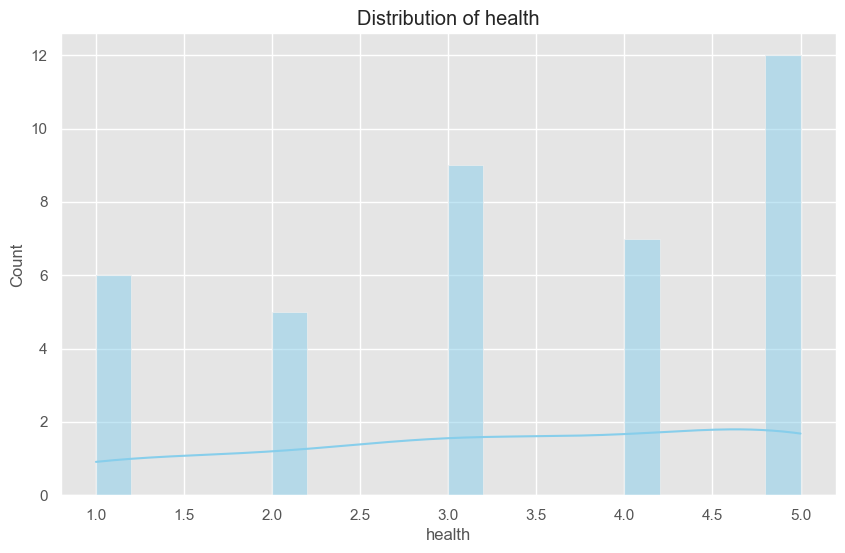

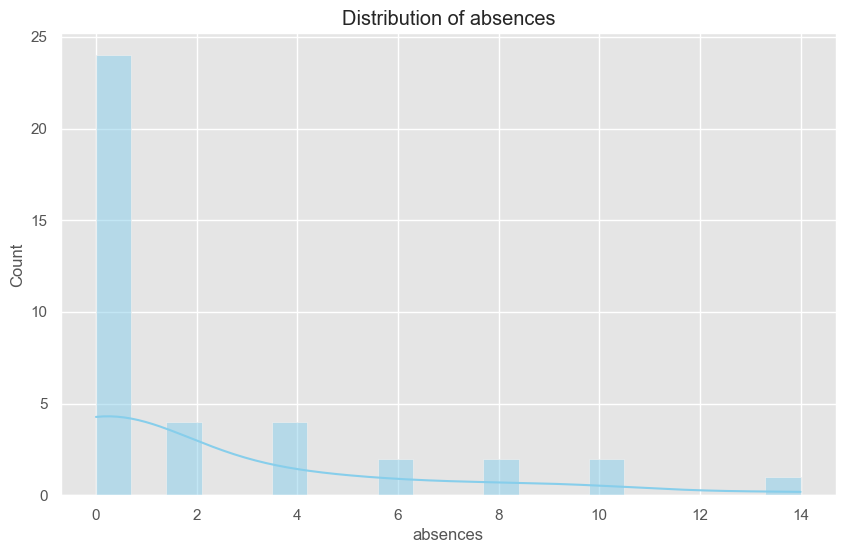

In [74]:
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(combined_data[col], bins=20, kde=True,color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Detecting Outliers in Numeric Features

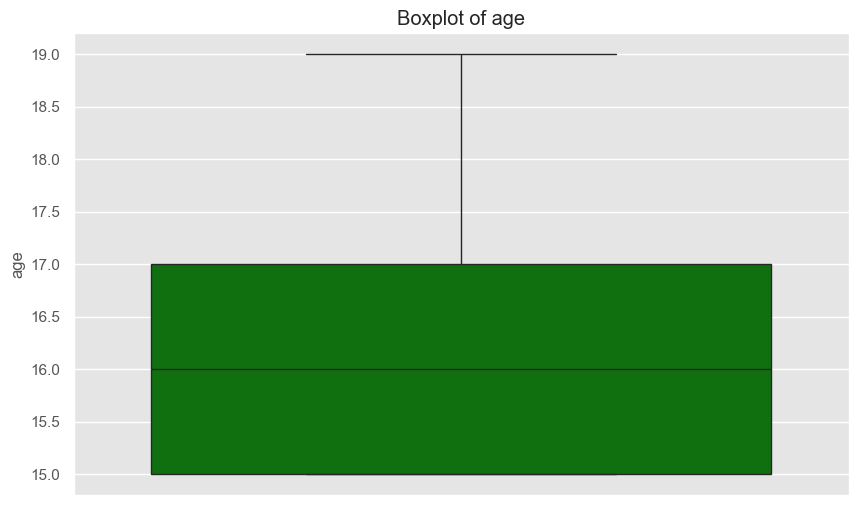

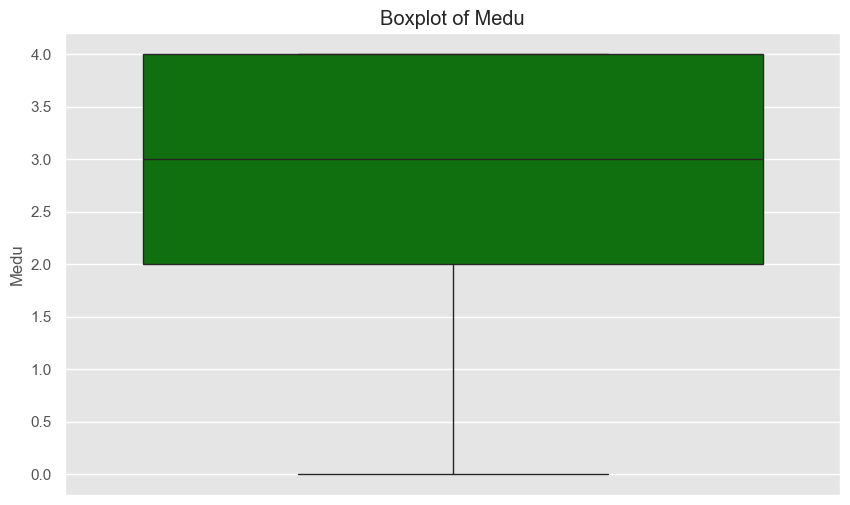

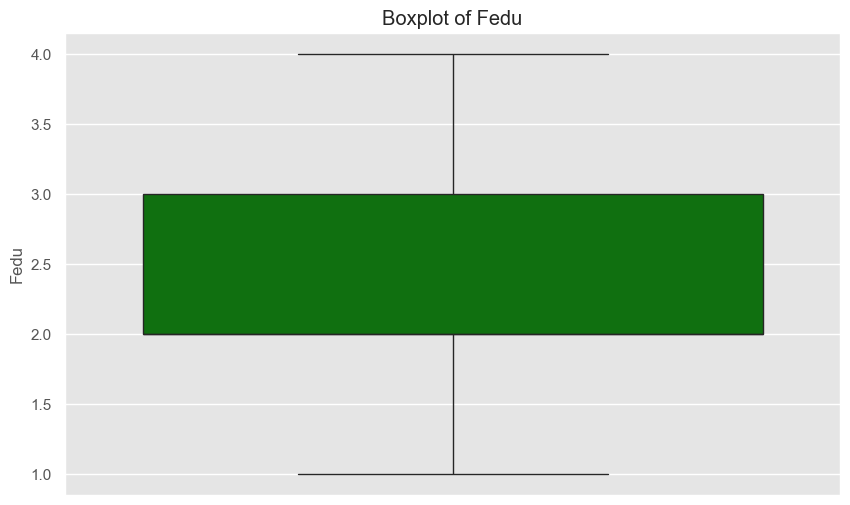

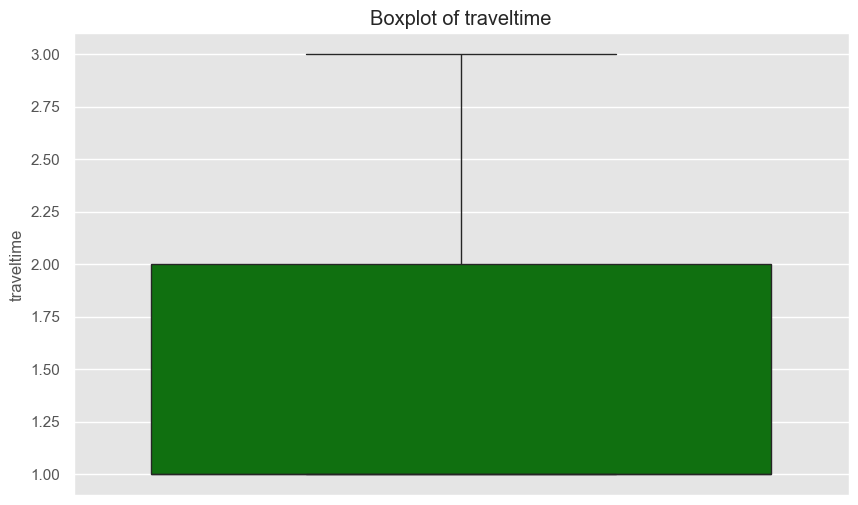

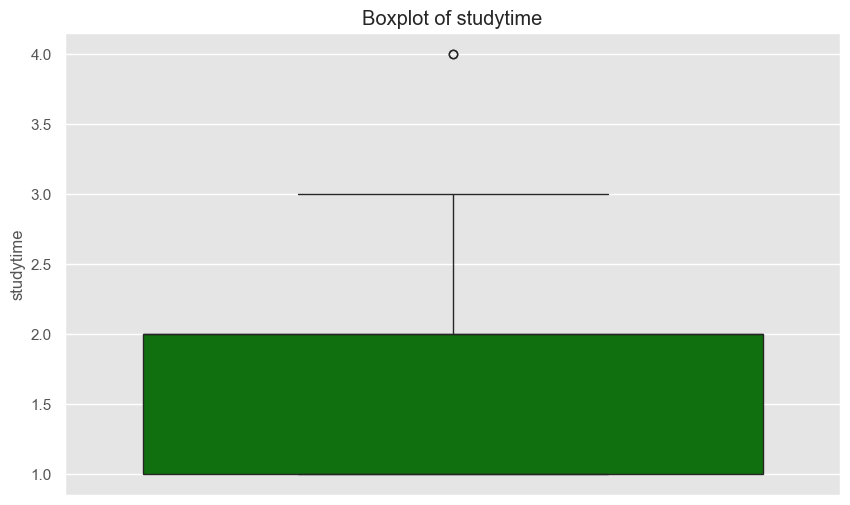

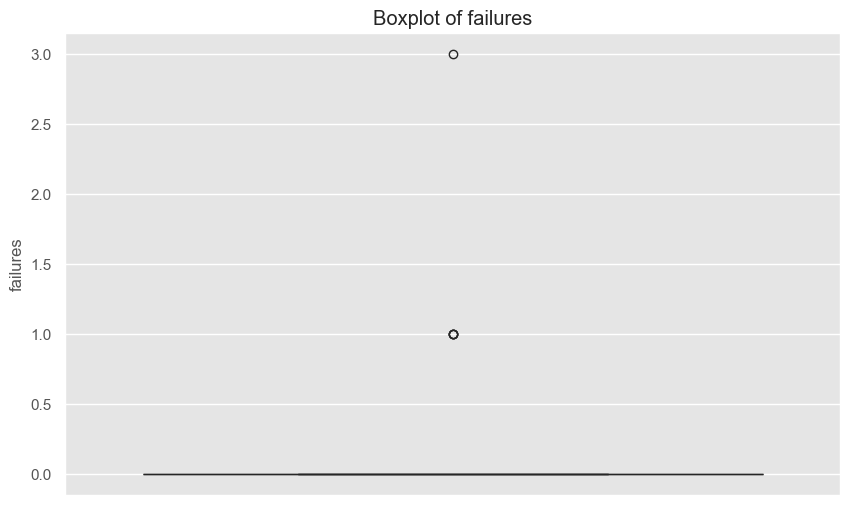

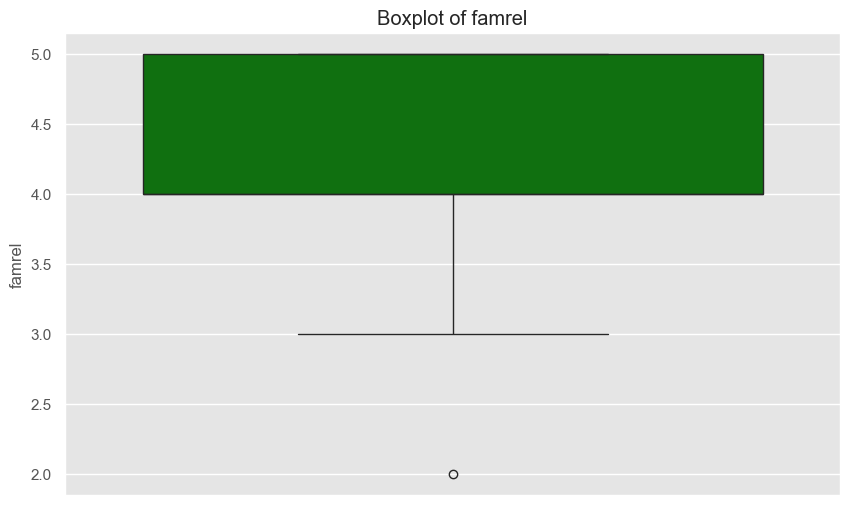

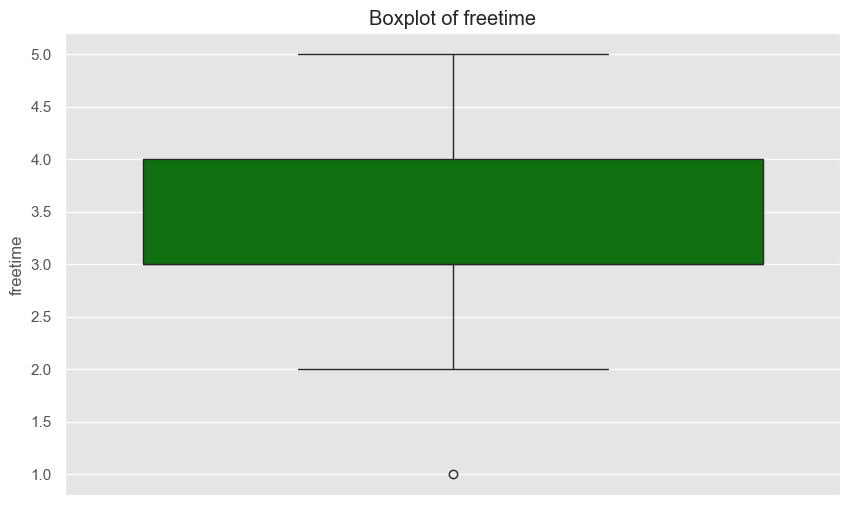

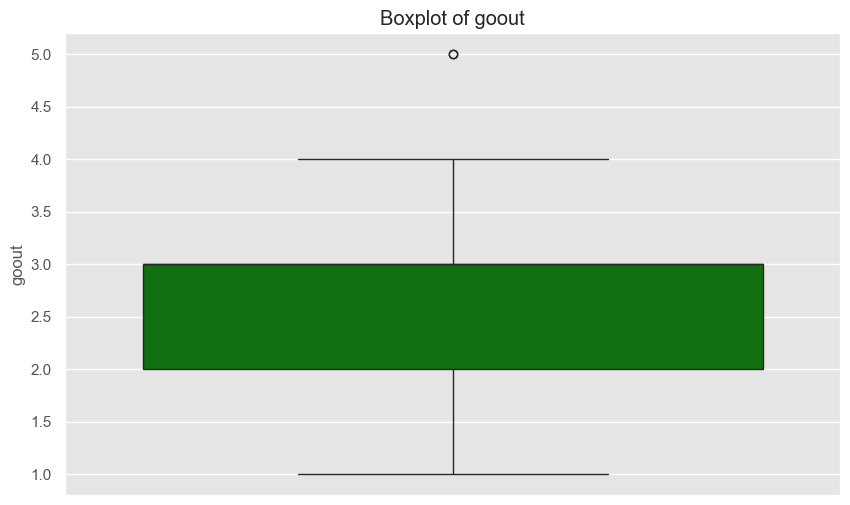

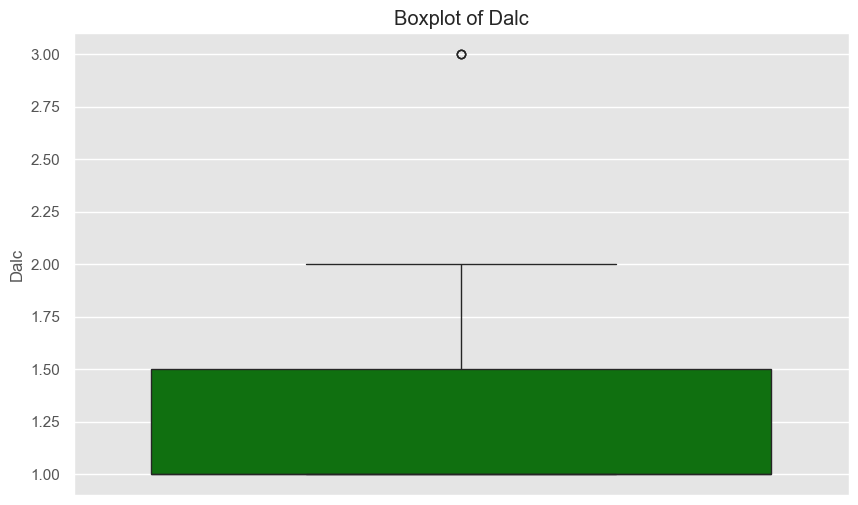

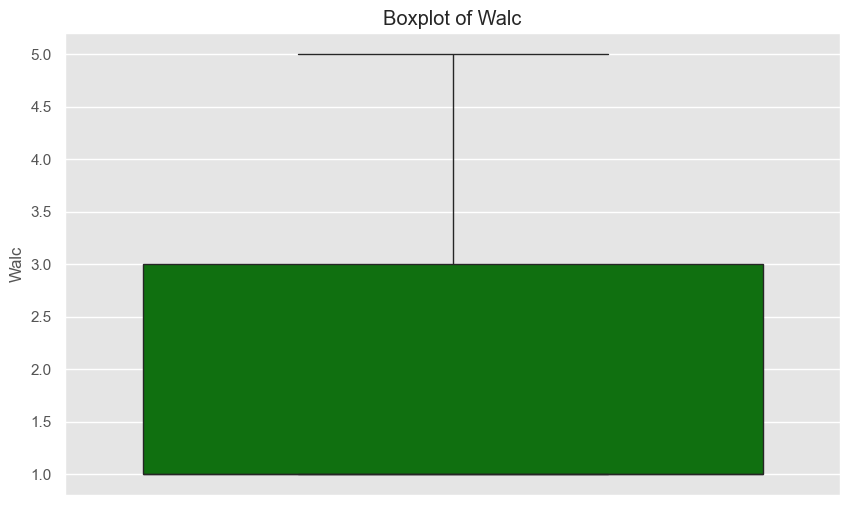

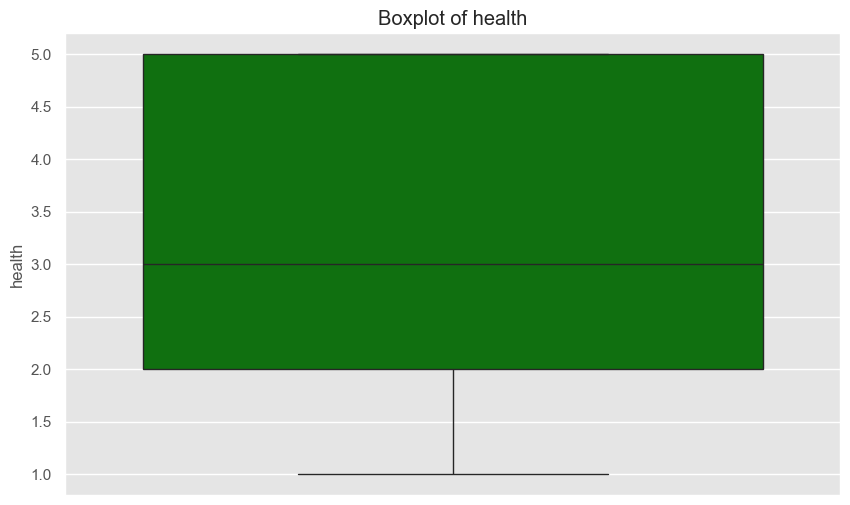

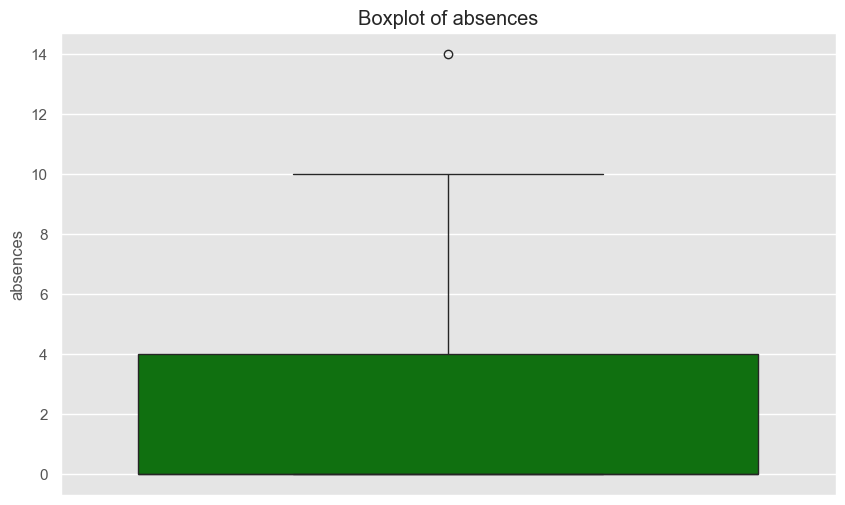

In [75]:
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=combined_data[col],color='green')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()


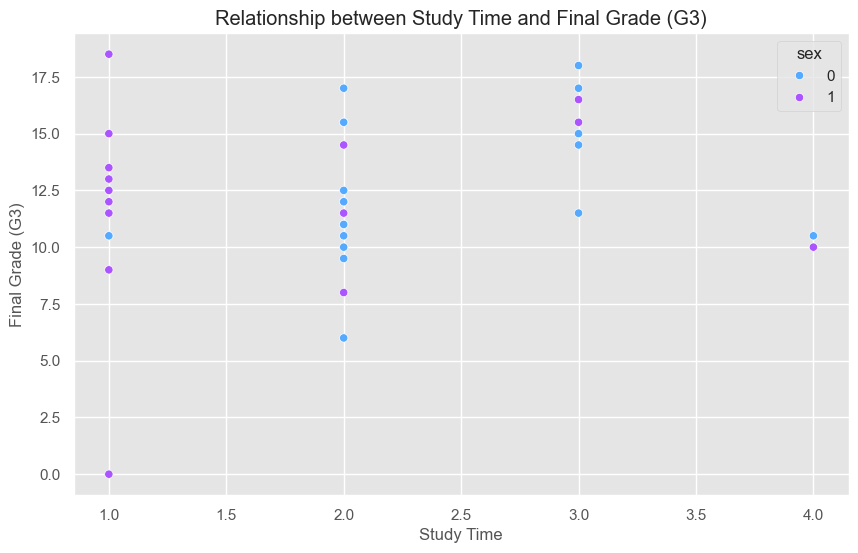

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='studytime', y='G3_combined', data=combined_data, hue='sex', palette='cool')
plt.title('Relationship between Study Time and Final Grade (G3)')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()


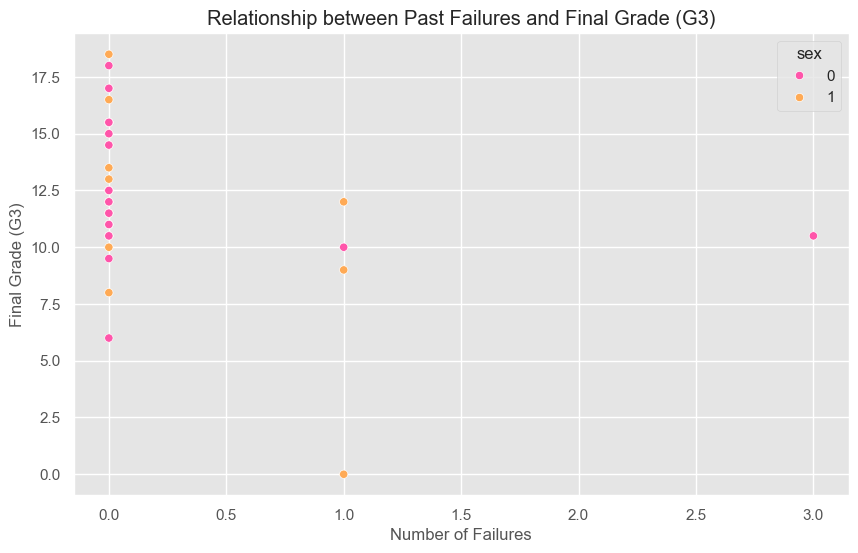

In [79]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='failures', y='G3_combined', data=combined_data, hue='sex', palette='spring')
plt.title('Relationship between Past Failures and Final Grade (G3)')
plt.xlabel('Number of Failures')
plt.ylabel('Final Grade (G3)')
plt.show()


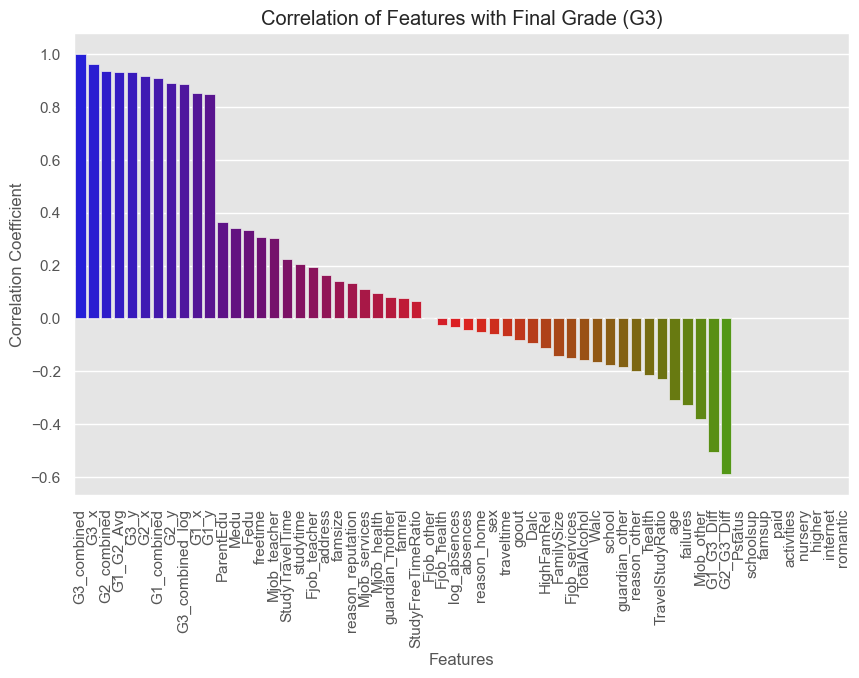

In [80]:
feature_correlation = combined_data.corr()['G3_combined'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_correlation.index, y=feature_correlation.values, palette='brg')
plt.title('Correlation of Features with Final Grade (G3)')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.show()


In [ ]:
X = combined_data.drop(['G1_combined', 'G2_combined', 'G3_combined'], axis=1) 
y = combined_data['G3_combined'] 

In [82]:
categorical_cols

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [83]:
print(X.columns)


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1_x',
       'G2_x', 'G3_x', 'G1_y', 'G2_y', 'G3_y', 'G3_combined_log', 'FamilySize',
       'ParentEdu', 'TotalAlcohol', 'StudyTravelTime', 'log_absences',
       'G1_G2_Avg', 'G1_G3_Diff', 'G2_G3_Diff', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_mother', 'guardian_other',
       'StudyFreeTimeRatio', 'TravelStudyRatio', 'HighFamRel'],
      dtype='object')


In [84]:
missing_cols = [col for col in categorical_cols if col not in X.columns]
print("Missing columns:", missing_cols)

Missing columns: ['Mjob', 'Fjob', 'reason', 'guardian']


One-Hot Encoding on categorical data 

In [87]:
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus',
                    'schoolsup', 'famsup', 'paid', 'activities',
                    'nursery', 'higher', 'internet', 'romantic']

onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = onehot_encoder.fit_transform(X[categorical_cols])

encoded_df = pd.DataFrame(X_encoded, columns=onehot_encoder.get_feature_names_out(categorical_cols))

X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, encoded_df], axis=1)
print(X.head())


   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   16     2     2           1          2         0       4         4      4   
1   15     2     2           1          3         0       4         5      2   
2   15     4     3           1          2         0       4         4      1   
3   15     4     4           1          1         0       5         4      2   
4   15     4     4           1          2         0       5         4      2   

   Dalc  ...  reason_reputation  guardian_mother  guardian_other  \
0     1  ...                  0                1               0   
1     1  ...                  0                0               1   
2     1  ...                  1                1               0   
3     1  ...                  0                0               0   
4     3  ...                  0                1               0   

   StudyFreeTimeRatio  TravelStudyRatio  HighFamRel  school_1  sex_1  \
0                 0.4          0.33333

In [88]:
print(X.columns)

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1_x',
       'G2_x', 'G3_x', 'G1_y', 'G2_y', 'G3_y', 'G3_combined_log', 'FamilySize',
       'ParentEdu', 'TotalAlcohol', 'StudyTravelTime', 'log_absences',
       'G1_G2_Avg', 'G1_G3_Diff', 'G2_G3_Diff', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_mother', 'guardian_other',
       'StudyFreeTimeRatio', 'TravelStudyRatio', 'HighFamRel', 'school_1',
       'sex_1', 'address_1', 'famsize_1'],
      dtype='object')


Standard Scaling to transform numeric data

In [ ]:
scaler = StandardScaler()

X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')


Training data shape: (31, 48)
Test data shape: (8, 48)


In [92]:
print(X.dtypes)


age                   float64
Medu                  float64
Fedu                  float64
traveltime            float64
studytime             float64
failures              float64
famrel                float64
freetime              float64
goout                 float64
Dalc                  float64
Walc                  float64
health                float64
absences              float64
G1_x                    int64
G2_x                    int64
G3_x                    int64
G1_y                    int64
G2_y                    int64
G3_y                    int64
G3_combined_log       float64
FamilySize              int64
ParentEdu               int64
TotalAlcohol            int64
StudyTravelTime         int64
log_absences          float64
G1_G2_Avg             float64
G1_G3_Diff            float64
G2_G3_Diff            float64
Mjob_health             int64
Mjob_other              int64
Mjob_services           int64
Mjob_teacher            int64
Fjob_health             int64
Fjob_other

## LinearRegression

Test Prediction, MAE, MSE, RMSE, R2-Score, Error Analysis, Residual Analysis and checking Robustness.

Mean Absolute Error:  0.014542996094697225
Mean Squared Error:  0.0002962863681109787
Root Mean Squared Error:  0.01721297092633862
R² on Test data:  0.999932034668247


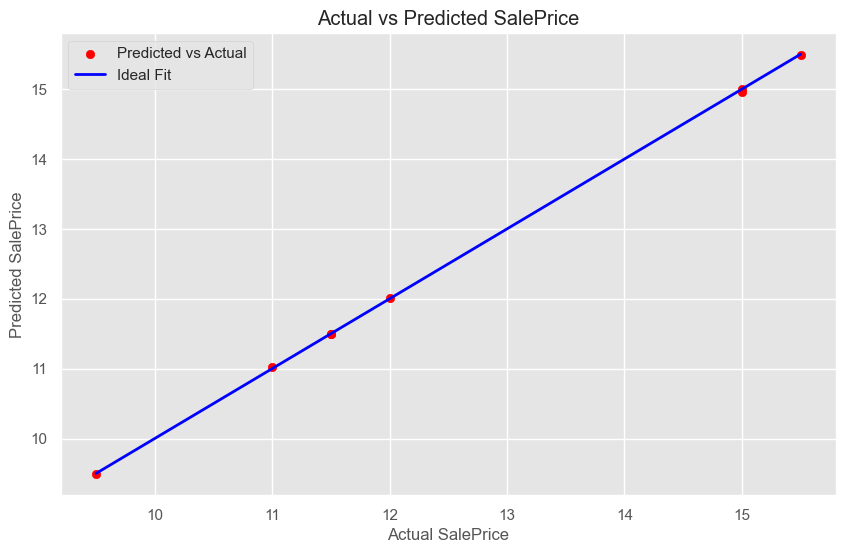

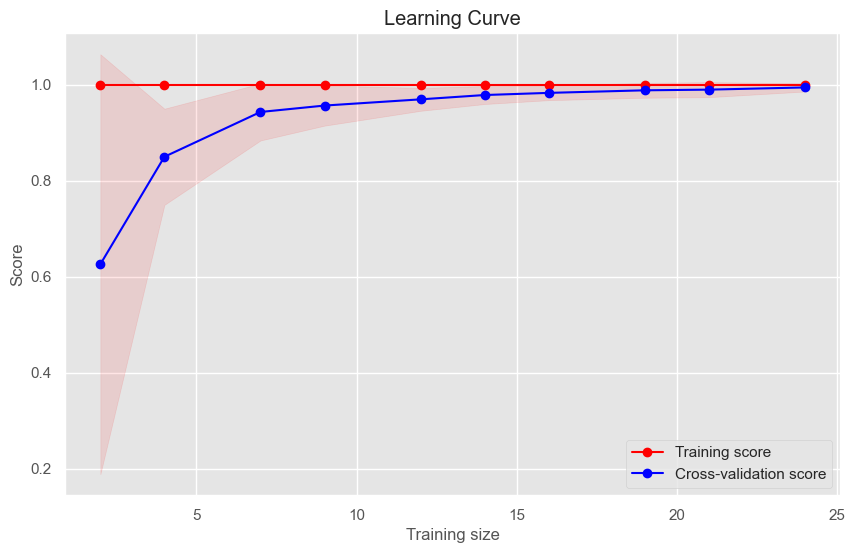

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


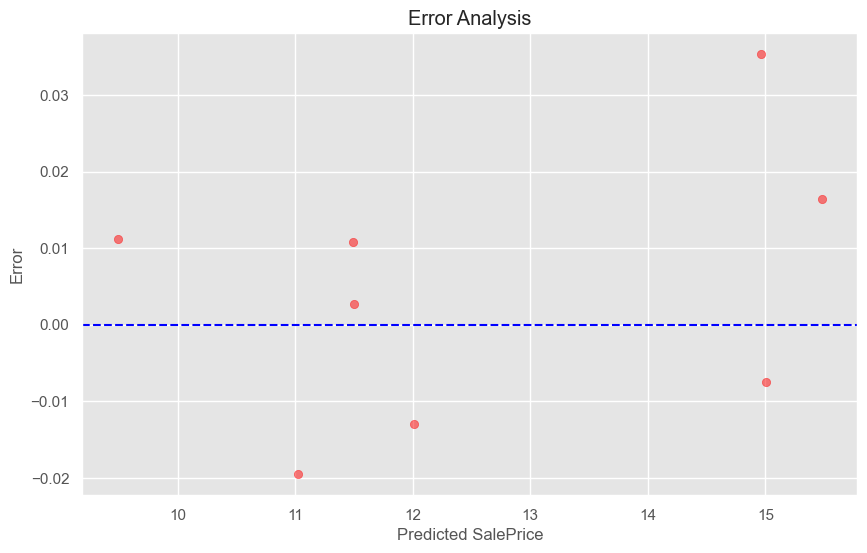

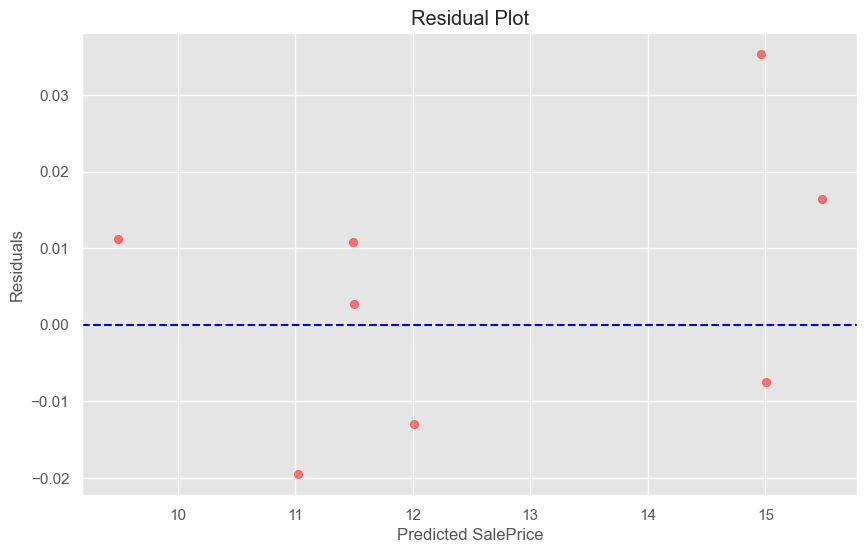

Random State 0:
Mean Absolute Error:  0.02566955881025083
Mean Squared Error:  0.0012429266713530182
Root Mean Squared Error:  0.035255165172680986
R² on Test data:  0.9998319423092255

Random State 1:
Mean Absolute Error:  0.03548637694577428
Mean Squared Error:  0.0018285338353535923
Root Mean Squared Error:  0.042761359138287366
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043015
Mean Squared Error:  0.0012368856317090061
Root Mean Squared Error:  0.03516938486395527
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.25294805595867836
Mean Squared Error:  0.25957299788538285
Root Mean Squared Error:  0.5094830692823686
R² on Test data:  0.9871507350651443

Random State 4:
Mean Absolute Error:  0.13808414828380233
Mean Squared Error:  0.07032614857603613
Root Mean Squared Error:  0.26519077769793603
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import learning_curve, train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

lr = LinearRegression()
lr.fit(X_train, y_train)

X_test_prediction = lr.predict(X_test)

mae = mean_absolute_error(y_test, X_test_prediction)
print('Mean Absolute Error: ', mae)

mse = mean_squared_error(y_test, X_test_prediction)
print('Mean Squared Error: ', mse)

rmse = np.sqrt(mse)
print('Root Mean Squared Error: ', rmse)

test_data_r2 = r2_score(y_test, X_test_prediction)
print('R² on Test data: ', test_data_r2)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, X_test_prediction, color='red', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='red', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='blue', label='Cross-validation score')

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)

errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='red')
plt.axhline(0, color='blue', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='red')
plt.axhline(0, color='blue', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()
baseline_prediction = np.mean(y_train)  
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


## KNN model

Test Prediction, MAE, MSE, RMSE, R2-Score, Error Analysis, Residual Analysis and checking Robustness.

Best parameters for KNN:  {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Best score for KNN:  -3.128279869321661
Best RMSE for KNN:  1.768694396814119

Training Data Metrics for KNN:
Mean Absolute Error:  0.0
Mean Squared Error:  0.0
Root Mean Squared Error:  0.0
R2 Score:  1.0

Test Data Metrics for KNN:
Mean Absolute Error:  0.3067172504605695
Mean Squared Error:  0.1865688377860029
Root Mean Squared Error:  0.43193615012638487
R2 Score:  0.9572028472462215


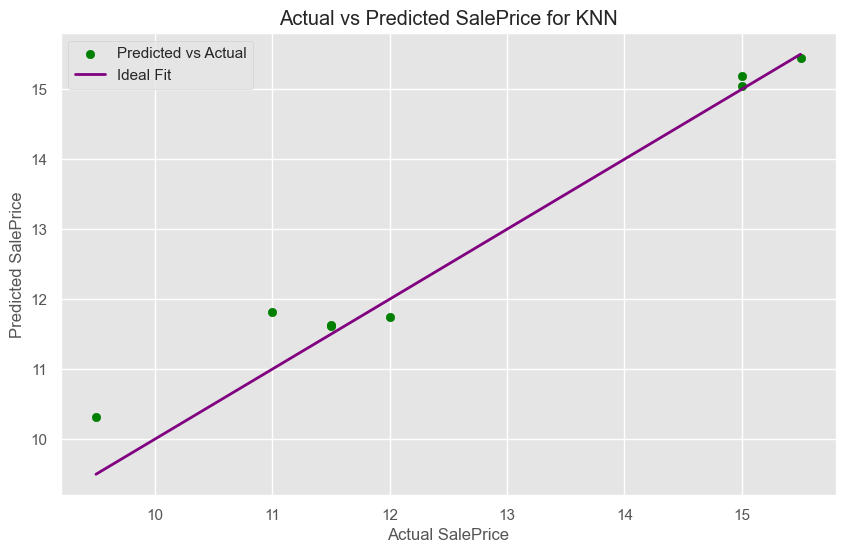

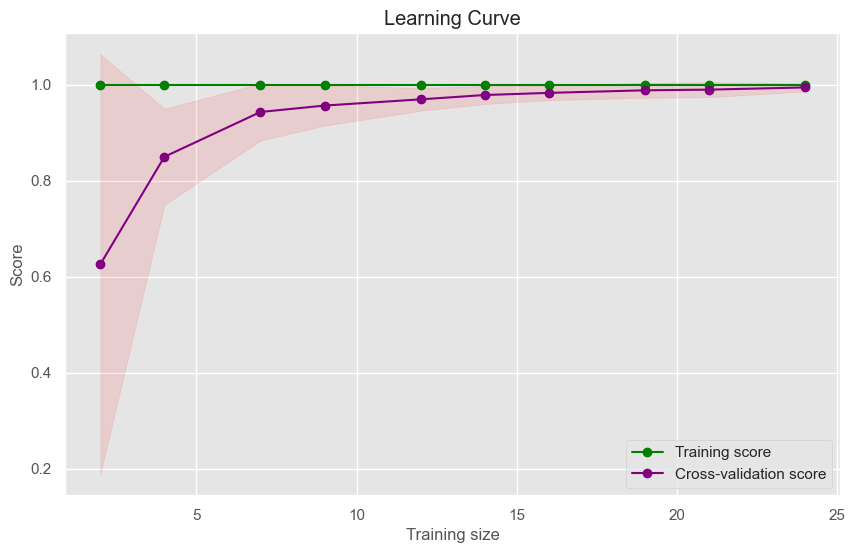

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


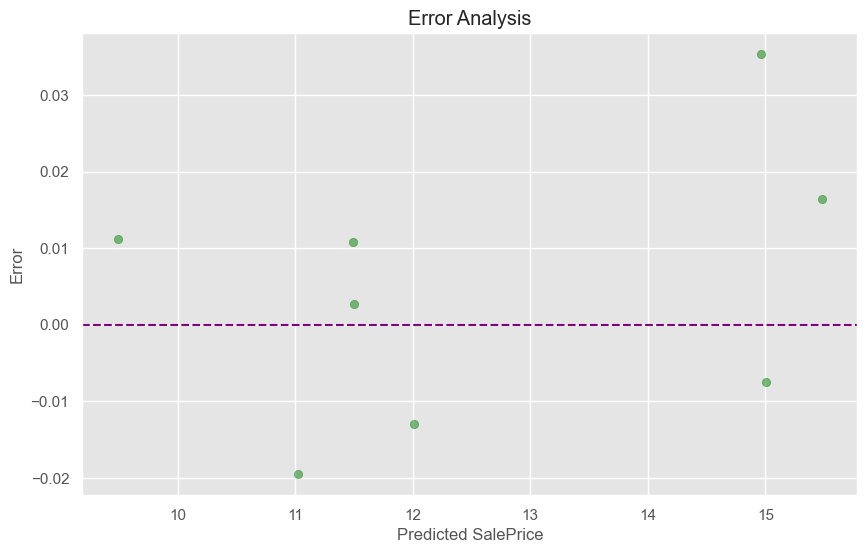

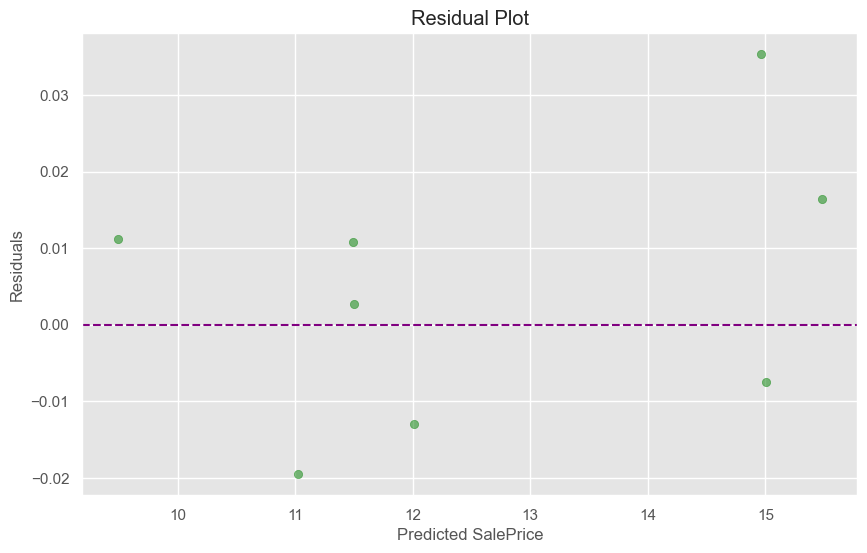

Random State 0:
Mean Absolute Error:  0.02566955881025083
Mean Squared Error:  0.0012429266713530182
Root Mean Squared Error:  0.035255165172680986
R² on Test data:  0.9998319423092255

Random State 1:
Mean Absolute Error:  0.03548637694577428
Mean Squared Error:  0.0018285338353535923
Root Mean Squared Error:  0.042761359138287366
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043015
Mean Squared Error:  0.0012368856317090061
Root Mean Squared Error:  0.03516938486395527
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.25294805595867836
Mean Squared Error:  0.25957299788538285
Root Mean Squared Error:  0.5094830692823686
R² on Test data:  0.9871507350651443

Random State 4:
Mean Absolute Error:  0.13808414828380233
Mean Squared Error:  0.07032614857603613
Root Mean Squared Error:  0.26519077769793603
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [96]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()


param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 100],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}
knn_cv = GridSearchCV(knn, param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
knn_cv.fit(X_train, y_train)


print("Best parameters for KNN: ", knn_cv.best_params_)
print("Best score for KNN: ", knn_cv.best_score_)
print("Best RMSE for KNN: ", np.sqrt(-1 * knn_cv.best_score_))


best_knn = knn_cv.best_estimator_


y_train_pred = best_knn.predict(X_train)

 
y_test_pred = best_knn.predict(X_test)

 
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics for KNN:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)


test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics for KNN:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='purple', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice for KNN')
plt.legend()
plt.show()

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='green', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='purple', label='Cross-validation score')

    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)


errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='green')
plt.axhline(0, color='purple', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='green')
plt.axhline(0, color='purple', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()


baseline_prediction = np.mean(y_train)  
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


## SVM model

RandomizedSearchCV, Test Prediction, MAE, MSE, RMSE, R2-Score, Error Analysis, Residual Analysis and checking Robustness.

Best parameters for SVM:  {'C': 6.086584841970366, 'degree': 5, 'gamma': 46.41588833612773, 'kernel': 'linear'}
Best score for SVM:  -0.21285867403544909
Best RMSE for SVM:  0.4613660954550617

Training Data Metrics for SVM:
Mean Absolute Error:  0.0687602951667339
Mean Squared Error:  0.006100169846748679
Root Mean Squared Error:  0.07810358408388618
R2 Score:  0.9995533513735066

Test Data Metrics for SVM:
Mean Absolute Error:  0.047945954166427995
Mean Squared Error:  0.0034199304614507464
Root Mean Squared Error:  0.05848017152378015
R2 Score:  0.9992154998224629


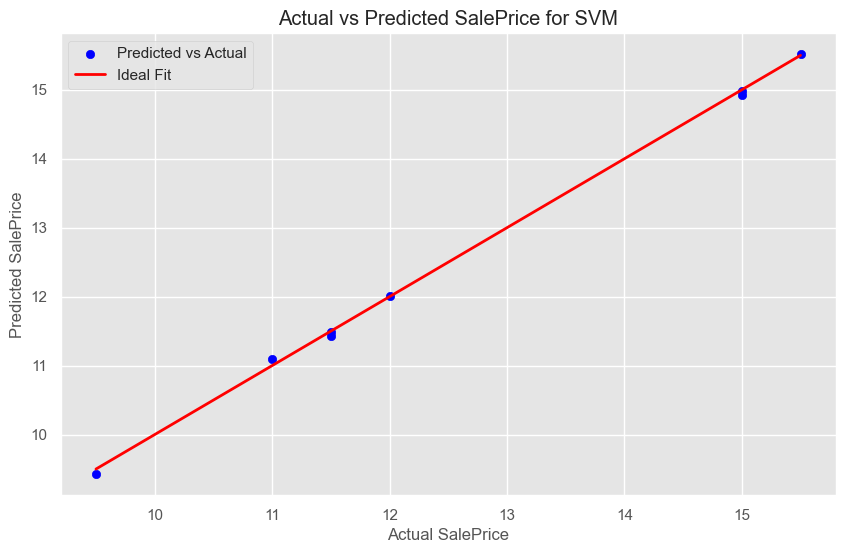

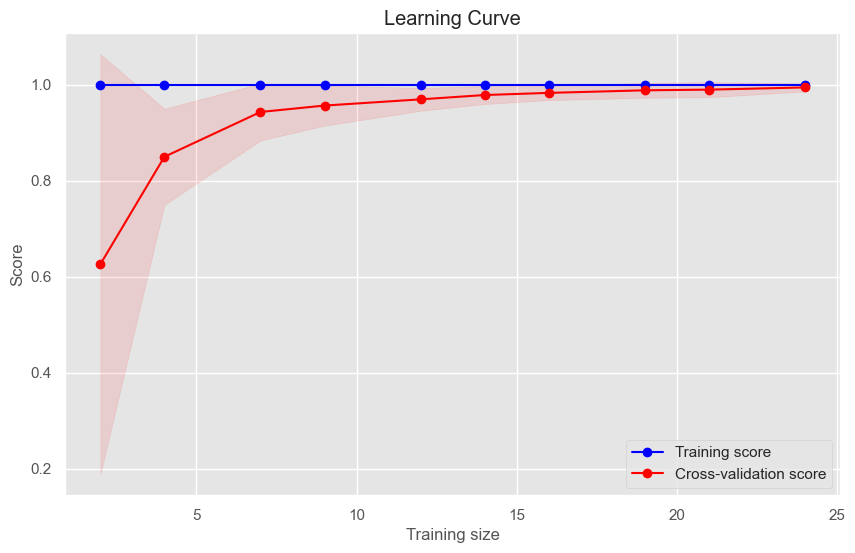

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


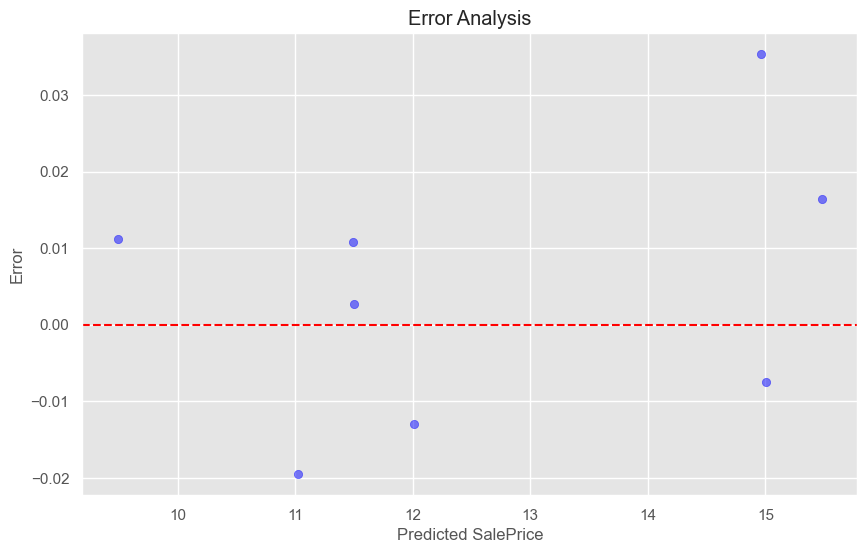

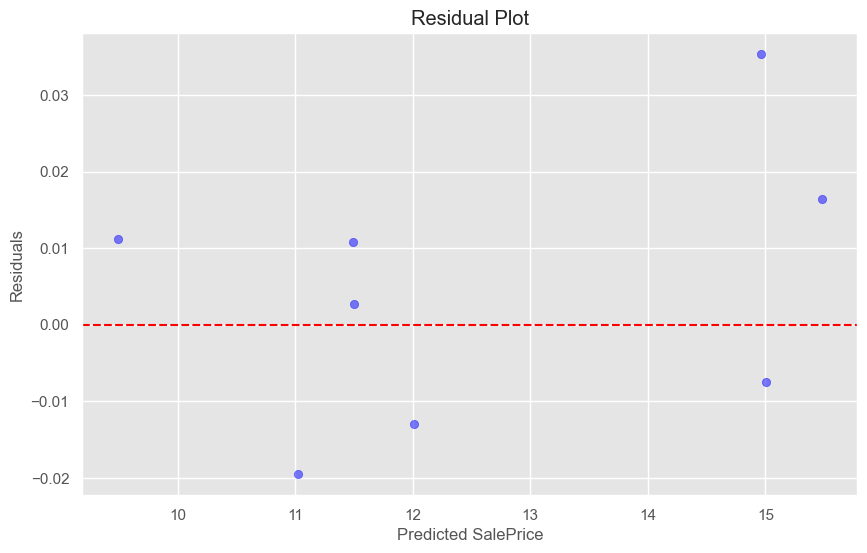

Random State 0:
Mean Absolute Error:  0.02566955881025083
Mean Squared Error:  0.0012429266713530182
Root Mean Squared Error:  0.035255165172680986
R² on Test data:  0.9998319423092255

Random State 1:
Mean Absolute Error:  0.03548637694577428
Mean Squared Error:  0.0018285338353535923
Root Mean Squared Error:  0.042761359138287366
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043015
Mean Squared Error:  0.0012368856317090061
Root Mean Squared Error:  0.03516938486395527
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.25294805595867836
Mean Squared Error:  0.25957299788538285
Root Mean Squared Error:  0.5094830692823686
R² on Test data:  0.9871507350651443

Random State 4:
Mean Absolute Error:  0.13808414828380233
Mean Squared Error:  0.07032614857603613
Root Mean Squared Error:  0.26519077769793603
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [97]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import matplotlib.pyplot as plt


svm = SVR()


param_dist_svm = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 10)),
    'degree': [3, 4, 5]
}


svm_random_search = RandomizedSearchCV(svm, param_distributions=param_dist_svm, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
svm_random_search.fit(X_train, y_train)


print("Best parameters for SVM: ", svm_random_search.best_params_)
print("Best score for SVM: ", svm_random_search.best_score_)
print("Best RMSE for SVM: ", np.sqrt(-1 * svm_random_search.best_score_))


best_svm = svm_random_search.best_estimator_


y_train_pred = best_svm.predict(X_train)


y_test_pred = best_svm.predict(X_test)


train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics for SVM:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)


test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics for SVM:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice for SVM')
plt.legend()
plt.show()

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)


errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()


baseline_prediction = np.mean(y_train)  
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


## Decision Tree model

GridSearchCV, Test Prediction, MAE, MSE, RMSE, R2-Score, Error Analysis, Residual Analysis and checking Robustness.

Best parameters for Decision Tree:  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score for Decision Tree:  -3.7566980820105824
Best RMSE for Decision Tree:  1.9382203388703212

Training Data Metrics for Decision Tree:
Mean Absolute Error:  0.24731182795698922
Mean Squared Error:  0.21908602150537634
Root Mean Squared Error:  0.46806625760182324
R2 Score:  0.9839587301587301

Test Data Metrics for Decision Tree:
Mean Absolute Error:  1.0625
Mean Squared Error:  2.0625
Root Mean Squared Error:  1.4361406616345072
R2 Score:  0.5268817204301075


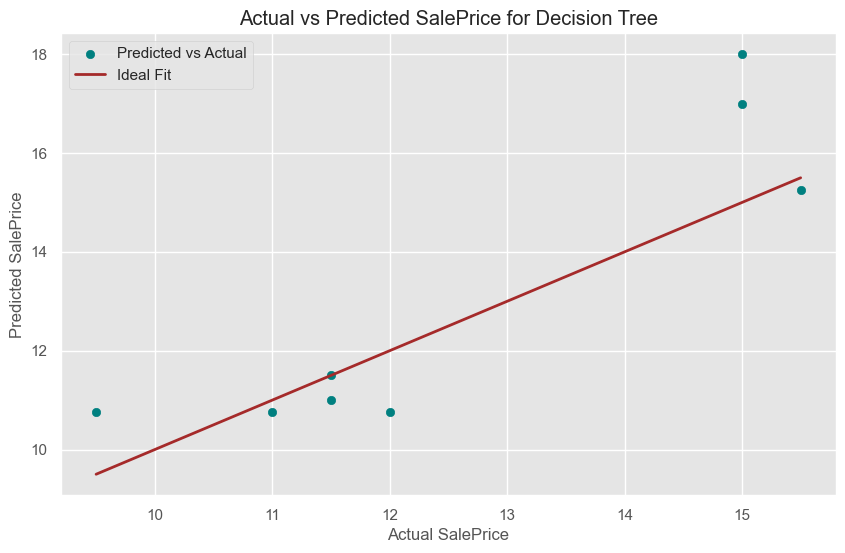

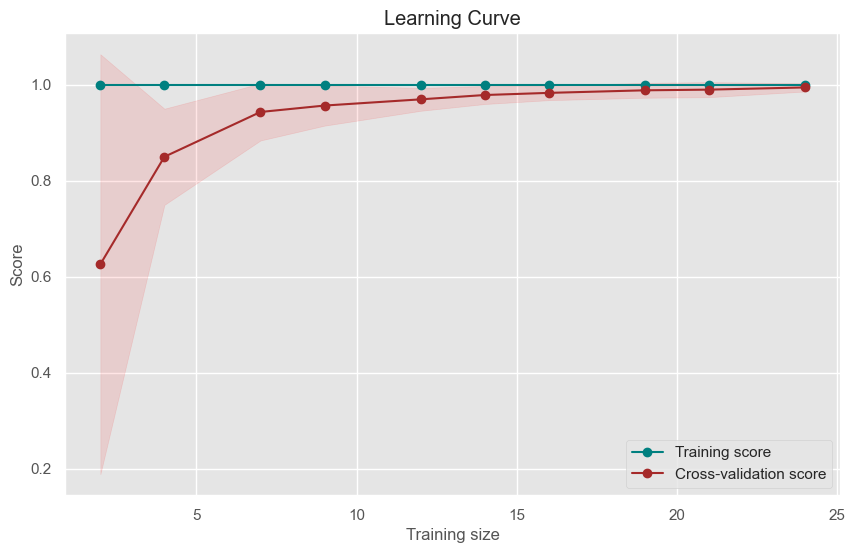

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


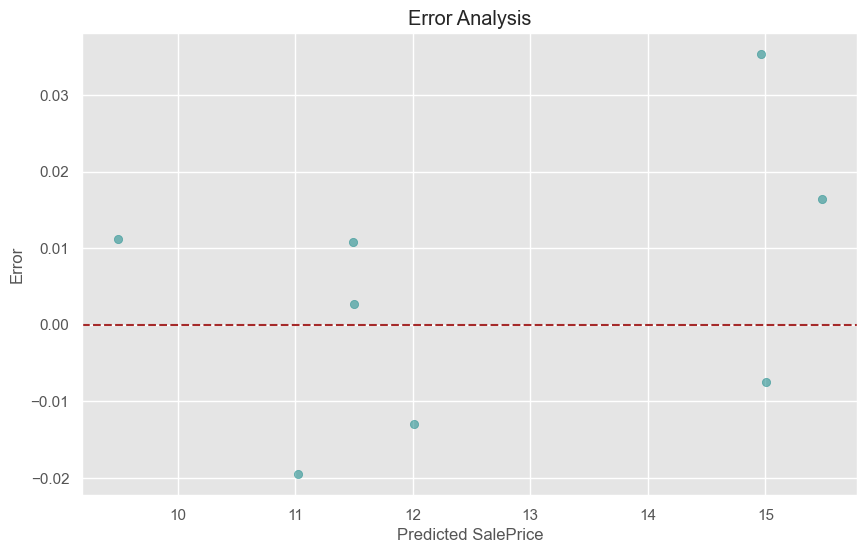

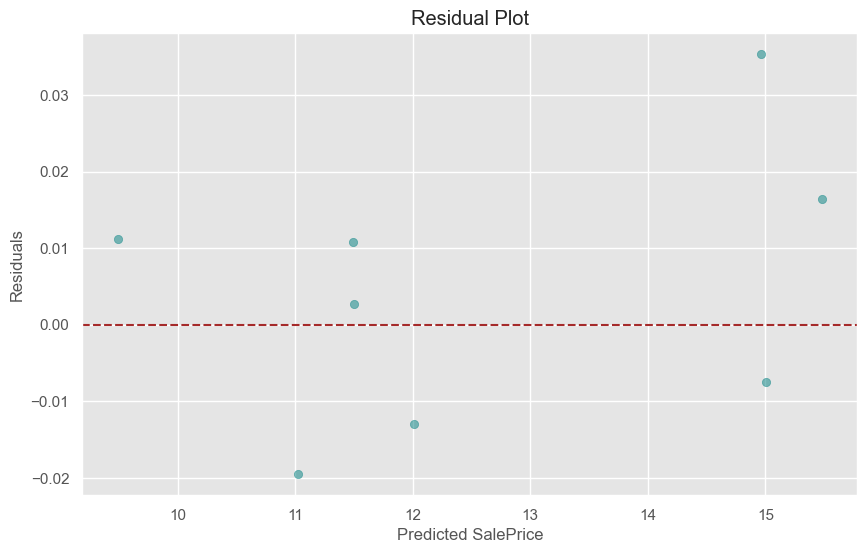

Random State 0:
Mean Absolute Error:  0.02566955881025083
Mean Squared Error:  0.0012429266713530182
Root Mean Squared Error:  0.035255165172680986
R² on Test data:  0.9998319423092255

Random State 1:
Mean Absolute Error:  0.03548637694577428
Mean Squared Error:  0.0018285338353535923
Root Mean Squared Error:  0.042761359138287366
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043015
Mean Squared Error:  0.0012368856317090061
Root Mean Squared Error:  0.03516938486395527
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.25294805595867836
Mean Squared Error:  0.25957299788538285
Root Mean Squared Error:  0.5094830692823686
R² on Test data:  0.9871507350651443

Random State 4:
Mean Absolute Error:  0.13808414828380233
Mean Squared Error:  0.07032614857603613
Root Mean Squared Error:  0.26519077769793603
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [99]:
from sklearn.tree import DecisionTreeRegressor



dt = DecisionTreeRegressor(random_state=13)


param_grid_dt = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}
dt_cv = GridSearchCV(dt, param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
dt_cv.fit(X_train, y_train)


print("Best parameters for Decision Tree: ", dt_cv.best_params_)
print("Best score for Decision Tree: ", dt_cv.best_score_)
print("Best RMSE for Decision Tree: ", np.sqrt(-1 * dt_cv.best_score_))


best_dt = dt_cv.best_estimator_


y_train_pred = best_dt.predict(X_train)


y_test_pred = best_dt.predict(X_test)


train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics for Decision Tree:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)


test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics for Decision Tree:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='teal', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='brown', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice for Decision Tree')
plt.legend()
plt.show()

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='teal', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='brown', label='Cross-validation score')

    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)


errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='teal')
plt.axhline(0, color='brown', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='teal')
plt.axhline(0, color='brown', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()


baseline_prediction = np.mean(y_train)  
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


## ElasticNet model

GridSearchCV, Test Prediction, MAE, MSE, RMSE, R2-Score, Error Analysis, Residual Analysis and checking Robustness.

Best parameters for ElasticNet:  {'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 1000}
Best score for ElasticNet:  -9.999196826269154e-05
Best RMSE for ElasticNet:  0.009999598405070653

Training Data Metrics for ElasticNet:
Mean Absolute Error:  0.0020337746069030447
Mean Squared Error:  8.022300674752142e-06
Root Mean Squared Error:  0.0028323666208229722
R2 Score:  0.9999994126147849

Test Data Metrics for ElasticNet:
Mean Absolute Error:  0.0012222716654723964
Mean Squared Error:  1.9684640536484484e-06
Root Mean Squared Error:  0.0014030196198373166
R2 Score:  0.9999995484526902


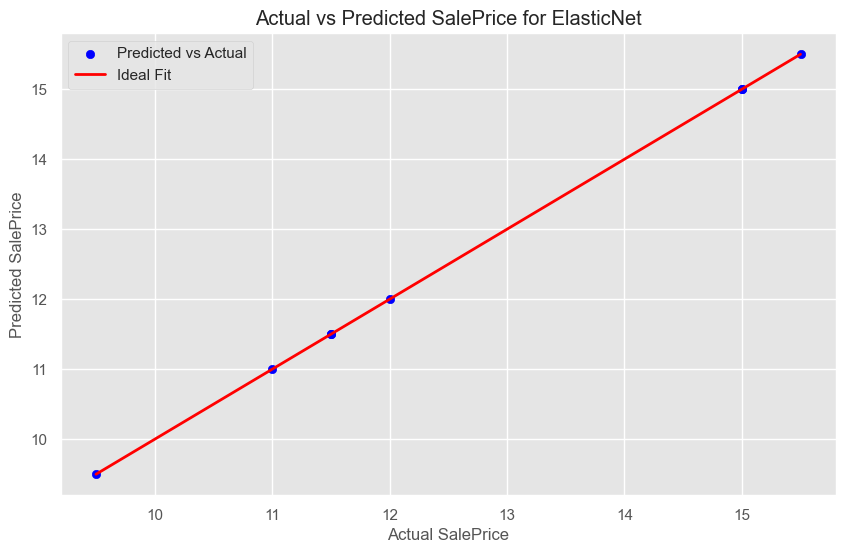

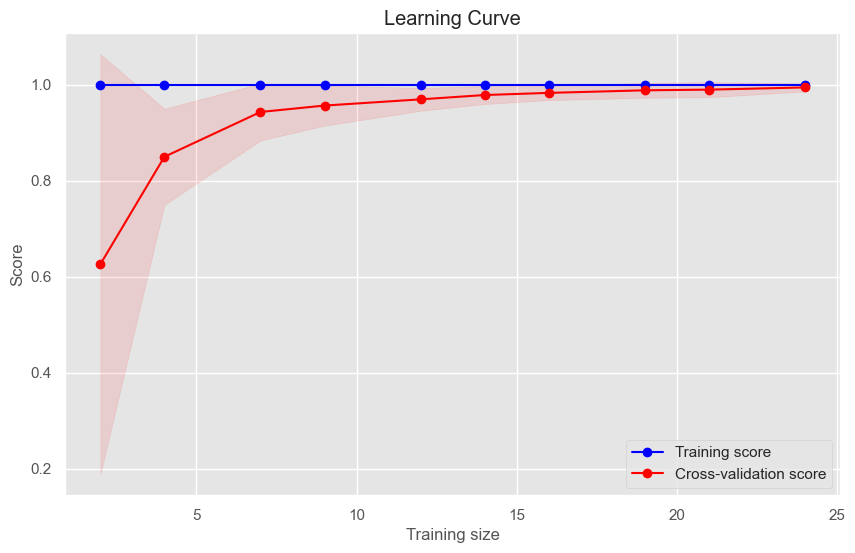

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


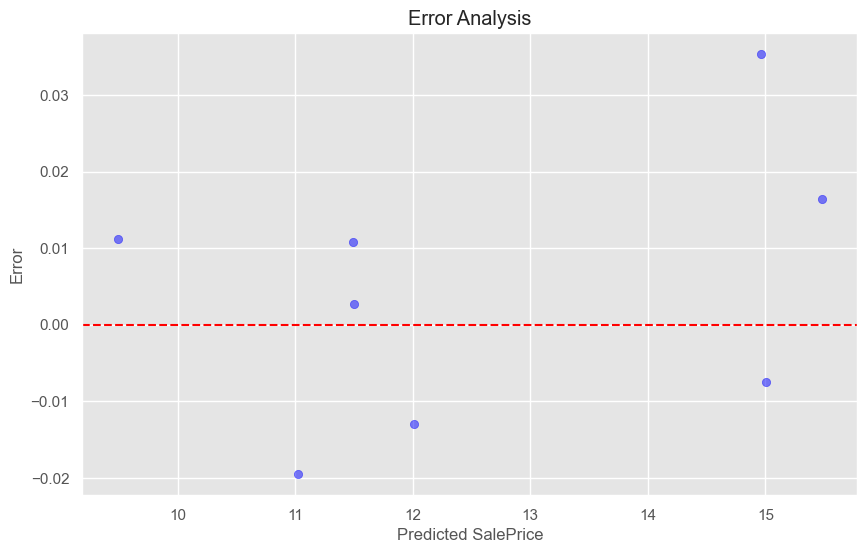

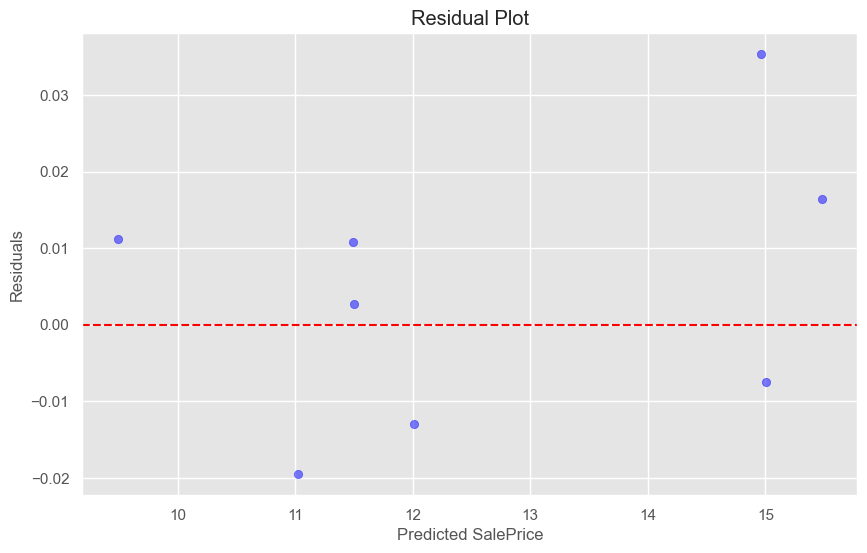

Random State 0:
Mean Absolute Error:  0.02566955881025083
Mean Squared Error:  0.0012429266713530182
Root Mean Squared Error:  0.035255165172680986
R² on Test data:  0.9998319423092255

Random State 1:
Mean Absolute Error:  0.03548637694577428
Mean Squared Error:  0.0018285338353535923
Root Mean Squared Error:  0.042761359138287366
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043015
Mean Squared Error:  0.0012368856317090061
Root Mean Squared Error:  0.03516938486395527
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.25294805595867836
Mean Squared Error:  0.25957299788538285
Root Mean Squared Error:  0.5094830692823686
R² on Test data:  0.9871507350651443

Random State 4:
Mean Absolute Error:  0.13808414828380233
Mean Squared Error:  0.07032614857603613
Root Mean Squared Error:  0.26519077769793603
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [100]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


elasticnet = ElasticNet(random_state=13)


param_grid_en = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9],
    'max_iter': [1000, 2000, 3000]
}
en_cv = GridSearchCV(elasticnet, param_grid_en, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
en_cv.fit(X_train, y_train)


print("Best parameters for ElasticNet: ", en_cv.best_params_)
print("Best score for ElasticNet: ", en_cv.best_score_)
print("Best RMSE for ElasticNet: ", np.sqrt(-1 * en_cv.best_score_))


best_en = en_cv.best_estimator_


y_train_pred = best_en.predict(X_train)


y_test_pred = best_en.predict(X_test)


train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics for ElasticNet:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)


test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics for ElasticNet:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice for ElasticNet')
plt.legend()
plt.show()

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)


errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()


baseline_prediction = np.mean(y_train)  
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


## Bayesian Ridge model

GridSearchCv,Test Prediction, MAE, MSE, RMSE, R2-Score, Error Analysis, Residual Analysis and checking Robustness.

Best parameters for Bayesian Ridge:  {'alpha_1': 0.0001, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 0.0001, 'max_iter': 100}
Best score for Bayesian Ridge:  -0.07747812991046485
Best RMSE for Bayesian Ridge:  0.27834893552960616

Training Data Metrics for Bayesian Ridge:
Mean Absolute Error:  1.3506346961534818e-06
Mean Squared Error:  3.4844916858211998e-12
Root Mean Squared Error:  1.8666793205639793e-06
R2 Score:  0.9999999999997449

Test Data Metrics for Bayesian Ridge:
Mean Absolute Error:  0.014545502771432517
Mean Squared Error:  0.0002963954828494344
Root Mean Squared Error:  0.017216140184415158
R2 Score:  0.9999320096383428


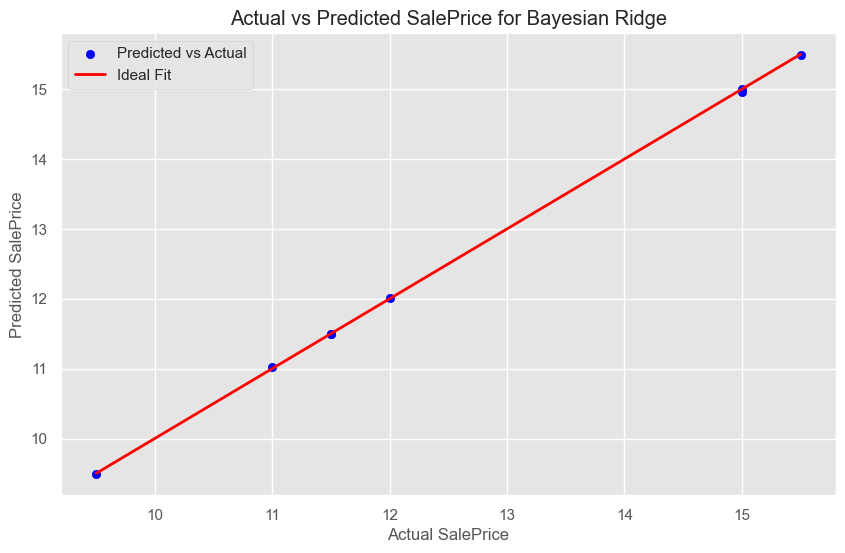

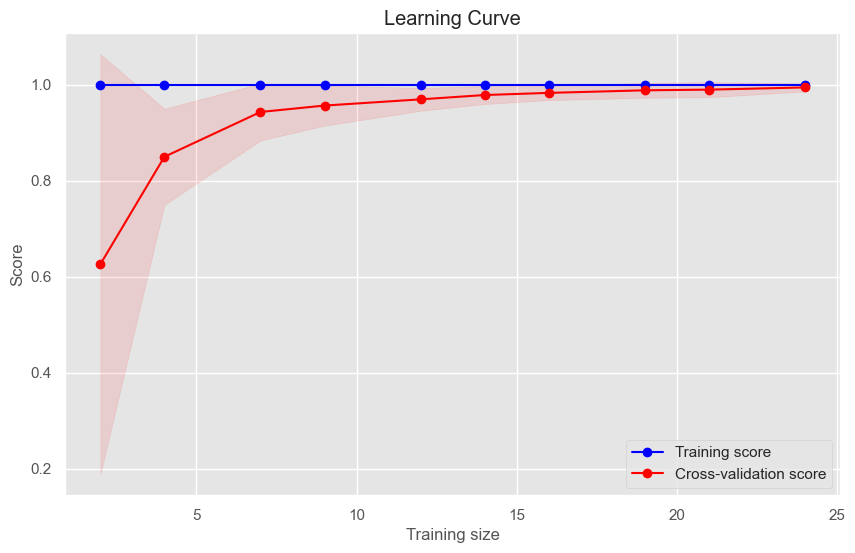

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


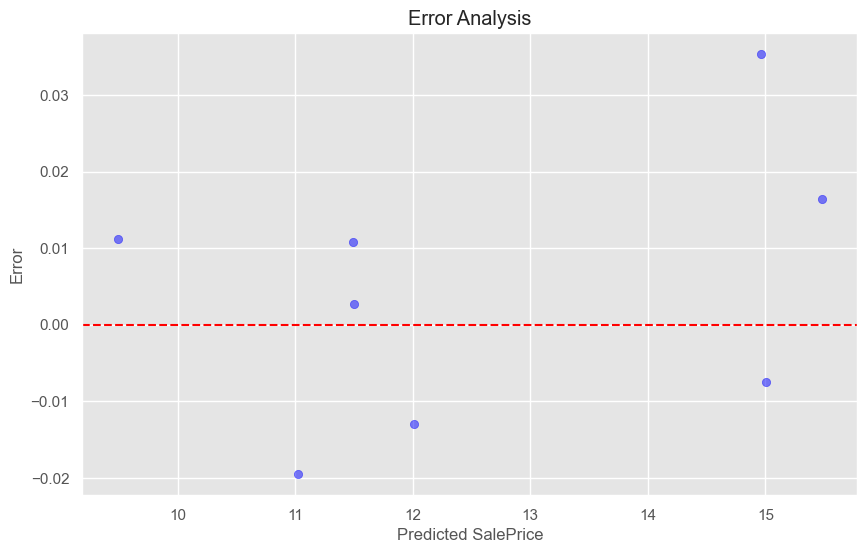

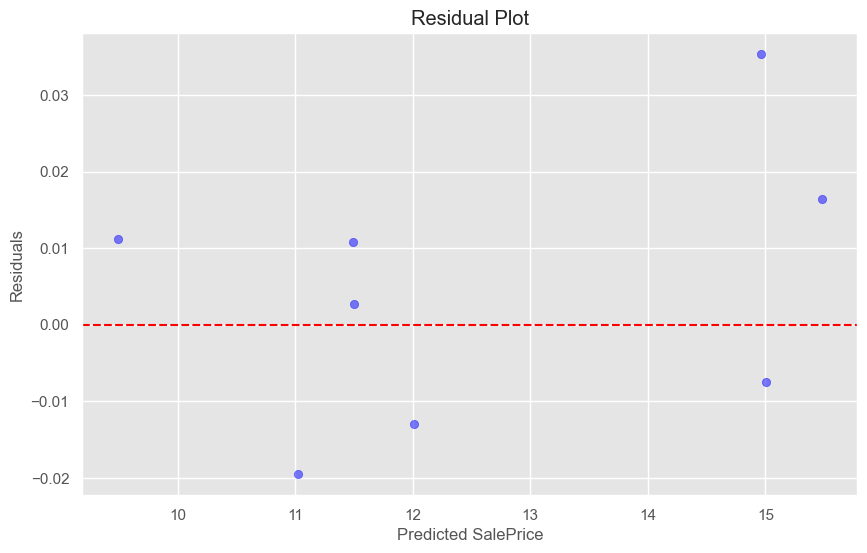

Random State 0:
Mean Absolute Error:  0.02566955881025083
Mean Squared Error:  0.0012429266713530182
Root Mean Squared Error:  0.035255165172680986
R² on Test data:  0.9998319423092255

Random State 1:
Mean Absolute Error:  0.03548637694577428
Mean Squared Error:  0.0018285338353535923
Root Mean Squared Error:  0.042761359138287366
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043015
Mean Squared Error:  0.0012368856317090061
Root Mean Squared Error:  0.03516938486395527
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.25294805595867836
Mean Squared Error:  0.25957299788538285
Root Mean Squared Error:  0.5094830692823686
R² on Test data:  0.9871507350651443

Random State 4:
Mean Absolute Error:  0.13808414828380233
Mean Squared Error:  0.07032614857603613
Root Mean Squared Error:  0.26519077769793603
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [102]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


bayesian_ridge = BayesianRidge()


param_grid_br = {
    'alpha_1': [1e-6, 1e-5, 1e-4],
    'alpha_2': [1e-6, 1e-5, 1e-4],
    'lambda_1': [1e-6, 1e-5, 1e-4],
    'lambda_2': [1e-6, 1e-5, 1e-4],
    'max_iter': [100, 200, 300]
}
br_cv = GridSearchCV(bayesian_ridge, param_grid_br, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
br_cv.fit(X_train, y_train)


print("Best parameters for Bayesian Ridge: ", br_cv.best_params_)
print("Best score for Bayesian Ridge: ", br_cv.best_score_)
print("Best RMSE for Bayesian Ridge: ", np.sqrt(-1 * br_cv.best_score_))


best_br = br_cv.best_estimator_


y_train_pred = best_br.predict(X_train)


y_test_pred = best_br.predict(X_test)


train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics for Bayesian Ridge:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)


test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics for Bayesian Ridge:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice for Bayesian Ridge')
plt.legend()
plt.show()


def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)


errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()


baseline_prediction = np.mean(y_train)  
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


## AdaBoost Regressor model

GridSearchCV, Test Prediction, MAE, MSE, RMSE, R2-Score, Error Analysis, Residual Analysis and checking Robustness.

Best parameters for AdaBoost:  {'learning_rate': 1, 'n_estimators': 50}
Best score for AdaBoost:  -2.5305028729237335
Best RMSE for AdaBoost:  1.590755440953679

Training Data Metrics for AdaBoost:
Mean Absolute Error:  0.17137747083193014
Mean Squared Error:  0.059363351021195755
Root Mean Squared Error:  0.24364595424754287
R2 Score:  0.9956534719747528

Test Data Metrics for AdaBoost:
Mean Absolute Error:  0.3293831168831167
Mean Squared Error:  0.1527916807218755
Root Mean Squared Error:  0.3908857642865438
R2 Score:  0.9649510123075268


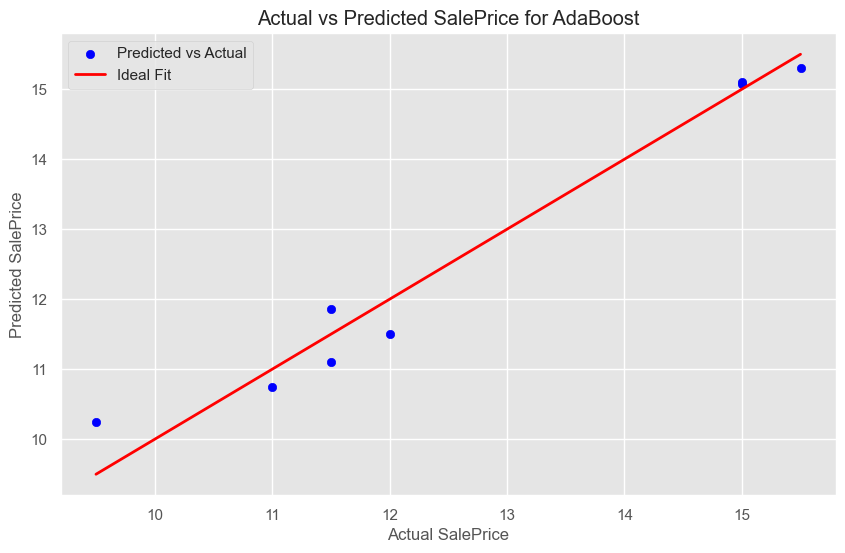

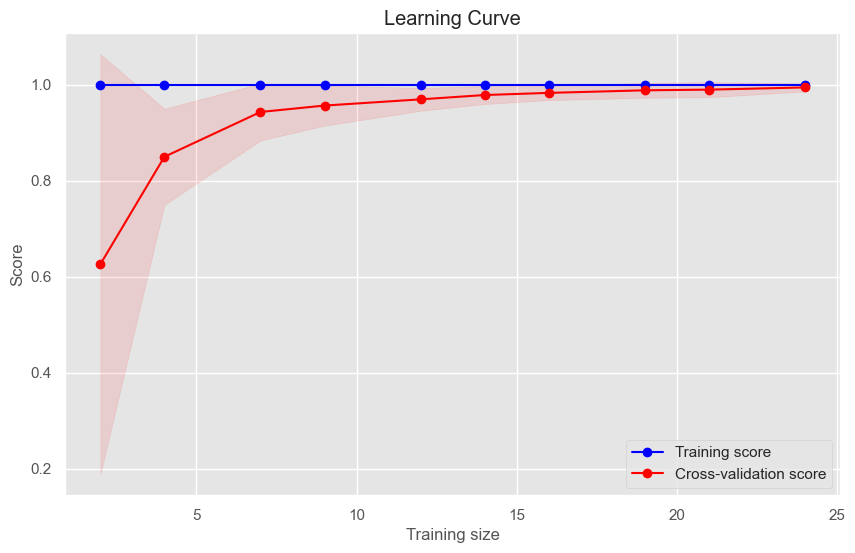

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


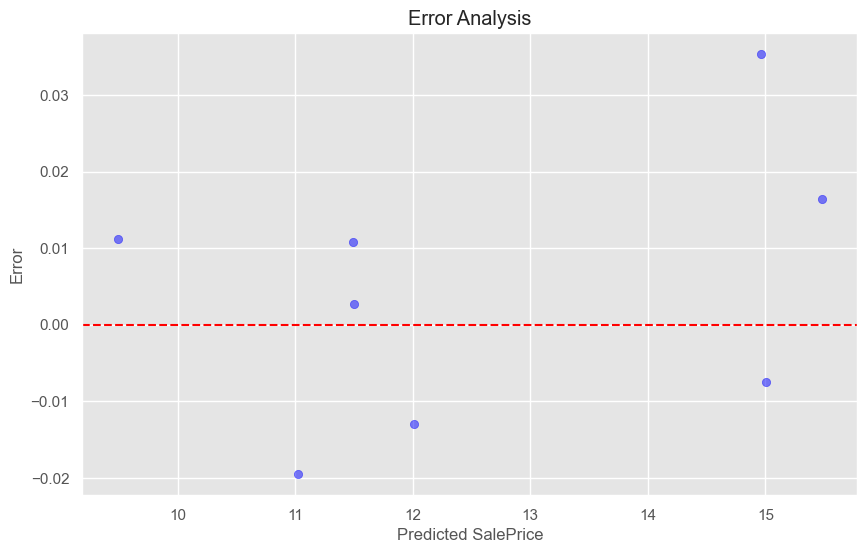

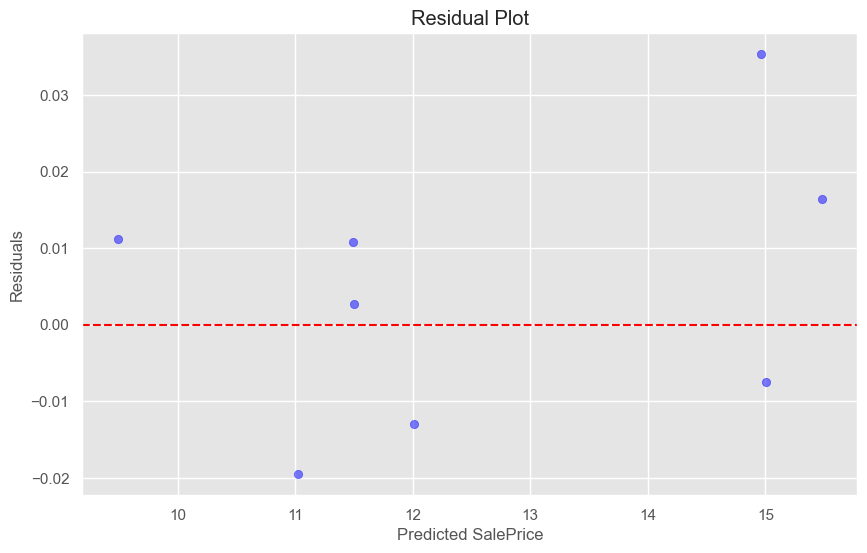

Random State 0:
Mean Absolute Error:  0.02566955881025083
Mean Squared Error:  0.0012429266713530182
Root Mean Squared Error:  0.035255165172680986
R² on Test data:  0.9998319423092255

Random State 1:
Mean Absolute Error:  0.03548637694577428
Mean Squared Error:  0.0018285338353535923
Root Mean Squared Error:  0.042761359138287366
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043015
Mean Squared Error:  0.0012368856317090061
Root Mean Squared Error:  0.03516938486395527
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.25294805595867836
Mean Squared Error:  0.25957299788538285
Root Mean Squared Error:  0.5094830692823686
R² on Test data:  0.9871507350651443

Random State 4:
Mean Absolute Error:  0.13808414828380233
Mean Squared Error:  0.07032614857603613
Root Mean Squared Error:  0.26519077769793603
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [103]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


ada = AdaBoostRegressor(random_state=13)


param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}
ada_cv = GridSearchCV(ada, param_grid_ada, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ada_cv.fit(X_train, y_train)


print("Best parameters for AdaBoost: ", ada_cv.best_params_)
print("Best score for AdaBoost: ", ada_cv.best_score_)
print("Best RMSE for AdaBoost: ", np.sqrt(-1 * ada_cv.best_score_))


best_ada = ada_cv.best_estimator_


y_train_pred = best_ada.predict(X_train)


y_test_pred = best_ada.predict(X_test)


train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics for AdaBoost:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)


test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics for AdaBoost:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice for AdaBoost')
plt.legend()
plt.show()


def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)


errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()


baseline_prediction = np.mean(y_train)  
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


## Random Forest Regressor

GridSearchCV, Test Prediction, MAE, MSE, RMSE, R2-Score, Error Analysis, Residual Analysis and checking Robustness.

Best parameters:  {'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 500}
Best score:  -2.6417515809486165
Best RMSE:  1.6253466033276154

Training Data Metrics:
Mean Absolute Error:  0.2925350230414753
Mean Squared Error:  0.49981408999487986
Root Mean Squared Error:  0.7069753107392647
R2 Score:  0.9634040883439939

Test Data Metrics:
Mean Absolute Error:  0.1942526785714287
Mean Squared Error:  0.06977240436011917
Root Mean Squared Error:  0.26414466559088257
R2 Score:  0.9839948606485748


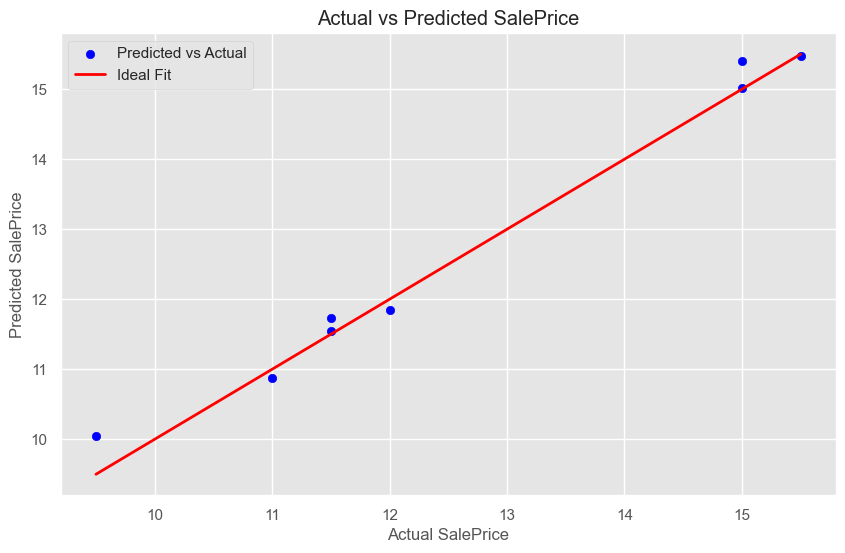

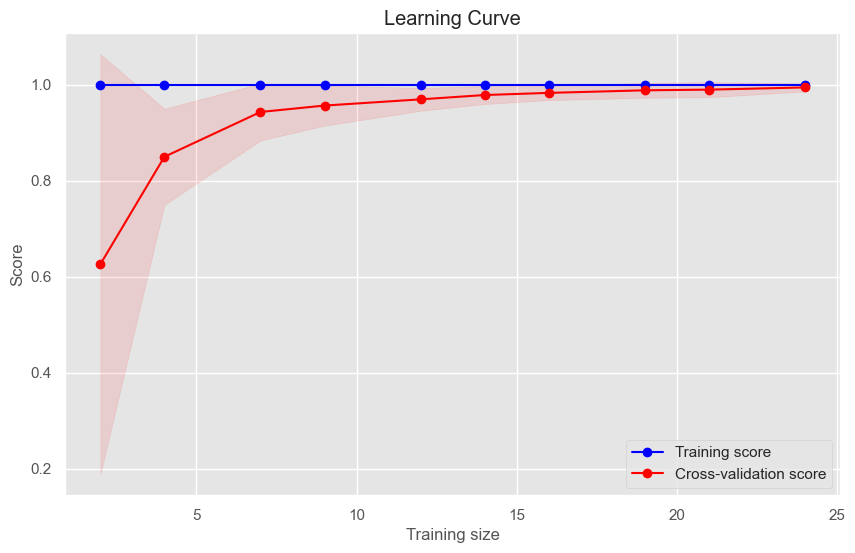

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


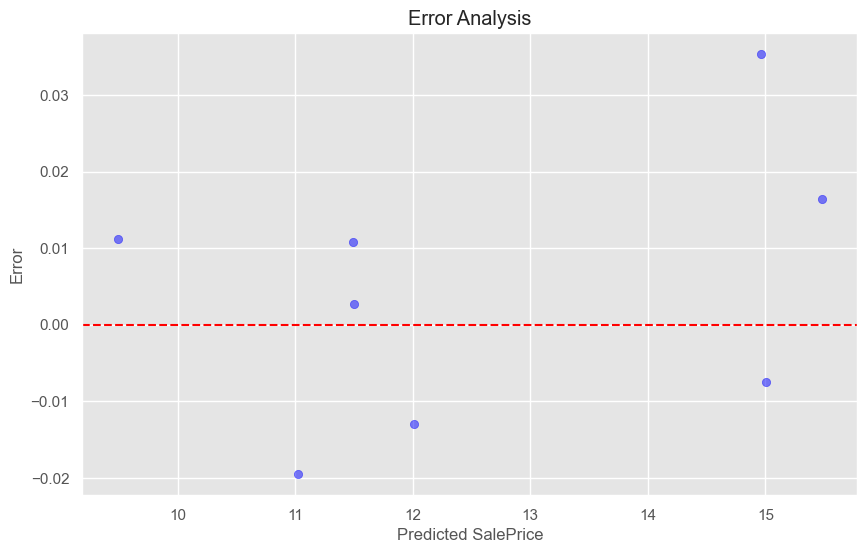

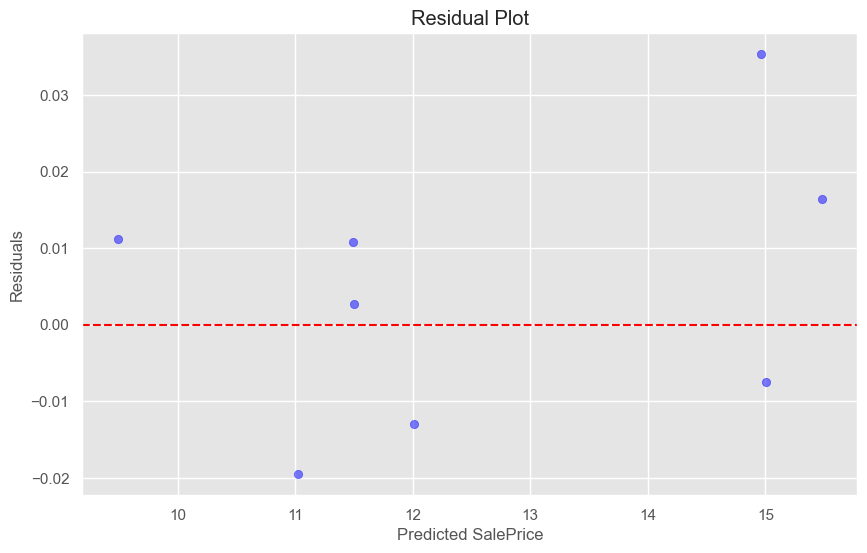

Random State 0:
Mean Absolute Error:  0.02566955881025083
Mean Squared Error:  0.0012429266713530182
Root Mean Squared Error:  0.035255165172680986
R² on Test data:  0.9998319423092255

Random State 1:
Mean Absolute Error:  0.03548637694577428
Mean Squared Error:  0.0018285338353535923
Root Mean Squared Error:  0.042761359138287366
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043015
Mean Squared Error:  0.0012368856317090061
Root Mean Squared Error:  0.03516938486395527
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.25294805595867836
Mean Squared Error:  0.25957299788538285
Root Mean Squared Error:  0.5094830692823686
R² on Test data:  0.9871507350651443

Random State 4:
Mean Absolute Error:  0.13808414828380233
Mean Squared Error:  0.07032614857603613
Root Mean Squared Error:  0.26519077769793603
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [104]:
RFR = RandomForestRegressor(random_state=13)


param_grid_RFR = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 250, 500 , 1000],
    'min_samples_split': [3, 5, 10]
}
rfr_cv = GridSearchCV(RFR, param_grid_RFR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rfr_cv.fit(X_train, y_train)


print("Best parameters: ", rfr_cv.best_params_)
print("Best score: ", rfr_cv.best_score_)
print("Best RMSE: ", np.sqrt(-1 * rfr_cv.best_score_))


best_rfr = rfr_cv.best_estimator_


y_train_pred = best_rfr.predict(X_train)


y_test_pred = best_rfr.predict(X_test)


train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)


test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()


def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)


errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()


baseline_prediction = np.mean(y_train)  
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


## XGB Regressor

GridSearchCV, Test Prediction, MAE, MSE, RMSE, R2-Score, Error Analysis, Residual Analysis and checking Robustness.

Best parameters:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 300, 'subsample': 1.0}
Best score:  -4.226600044179684
Best RMSE:  2.0558696564178587

Training Data Metrics:
Mean Absolute Error:  0.0005480736388915008
Mean Squared Error:  6.334937477694118e-07
Root Mean Squared Error:  0.0007959232046934
R2 Score:  0.9999999536161911

Test Data Metrics:
Mean Absolute Error:  0.17854392528533936
Mean Squared Error:  0.07073867877090834
Root Mean Squared Error:  0.265967439305845
R2 Score:  0.9837732063034476


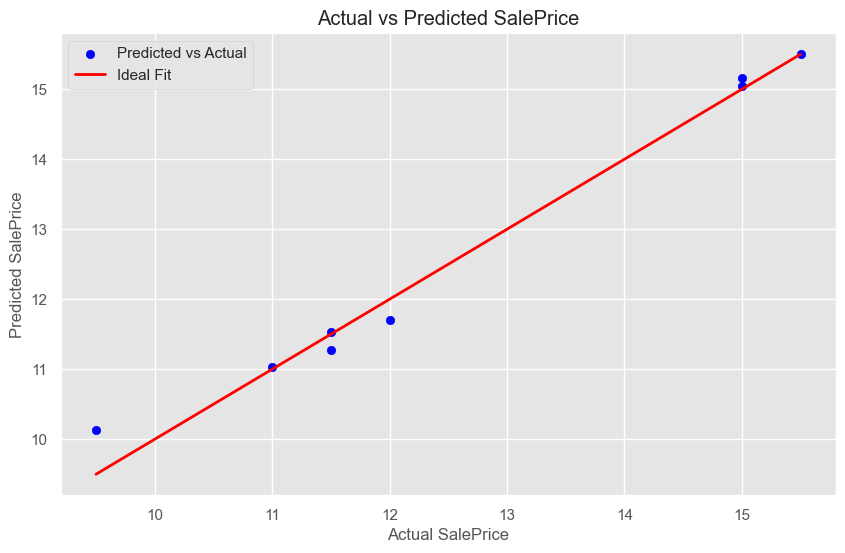

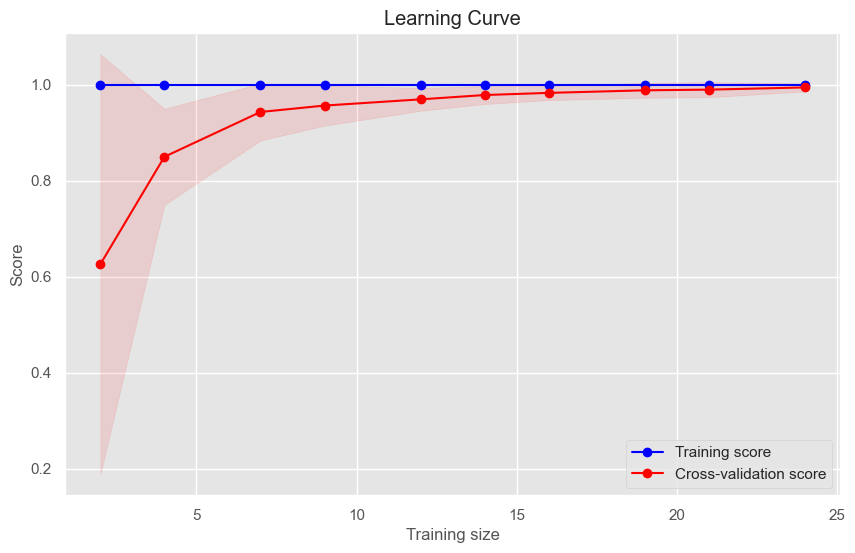

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


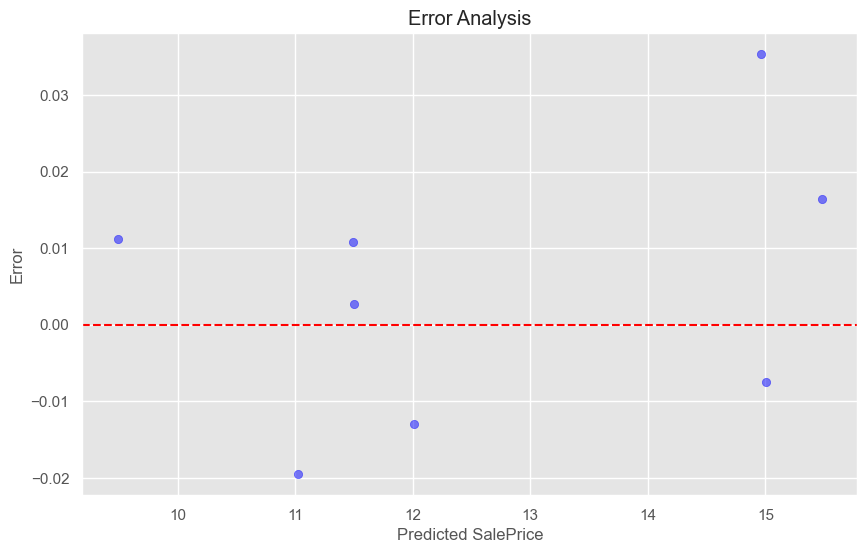

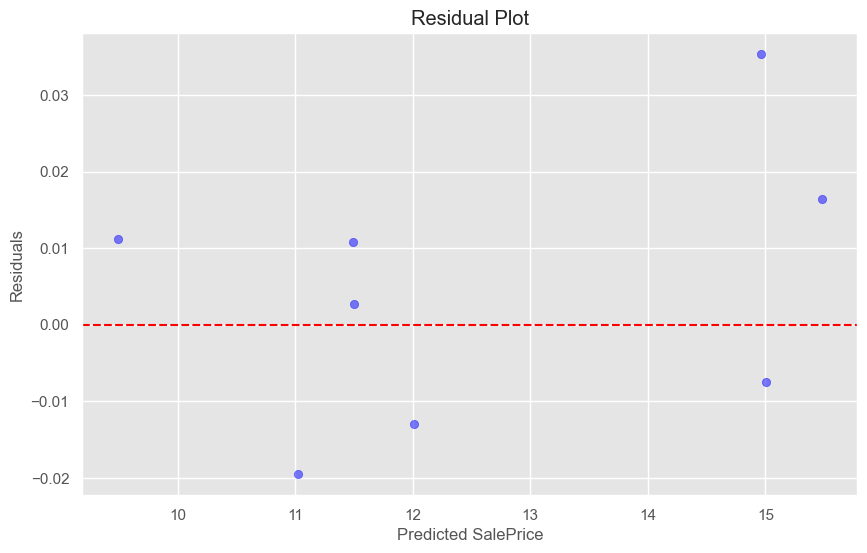

Random State 0:
Mean Absolute Error:  0.02566955881025083
Mean Squared Error:  0.0012429266713530182
Root Mean Squared Error:  0.035255165172680986
R² on Test data:  0.9998319423092255

Random State 1:
Mean Absolute Error:  0.03548637694577428
Mean Squared Error:  0.0018285338353535923
Root Mean Squared Error:  0.042761359138287366
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043015
Mean Squared Error:  0.0012368856317090061
Root Mean Squared Error:  0.03516938486395527
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.25294805595867836
Mean Squared Error:  0.25957299788538285
Root Mean Squared Error:  0.5094830692823686
R² on Test data:  0.9871507350651443

Random State 4:
Mean Absolute Error:  0.13808414828380233
Mean Squared Error:  0.07032614857603613
Root Mean Squared Error:  0.26519077769793603
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [105]:
XGB = XGBRegressor(random_state=13)
param_grid_XGB = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1,2,3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}
xgb_cv = GridSearchCV(XGB, param_grid_XGB, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_cv.fit(X_train, y_train)


print("Best parameters: ", xgb_cv.best_params_)
print("Best score: ", xgb_cv.best_score_)
print("Best RMSE: ", np.sqrt(-1 * xgb_cv.best_score_))


best_xgb = xgb_cv.best_estimator_


y_train_pred = best_xgb.predict(X_train)


y_test_pred = best_xgb.predict(X_test)


train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)


test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()


def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)


errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()


baseline_prediction = np.mean(y_train)  
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


## Ridge regressor

GridSearchCV,Test Prediction, MAE, MSE, RMSE, R2-Score, Error Analysis, Residual Analysis and checking Robustness.

Best parameters:  {'alpha': 0.05, 'solver': 'lsqr'}
Best score:  -0.08020425041487207
Best RMSE:  0.2832035494390423

Training Data Metrics:
Mean Absolute Error:  0.00032966602795534767
Mean Squared Error:  1.8932160257162465e-07
Root Mean Squared Error:  0.0004351110232706414
R2 Score:  0.9999999861380525

Test Data Metrics:
Mean Absolute Error:  0.015148113304985555
Mean Squared Error:  0.0003217741372426704
Root Mean Squared Error:  0.017938063921244966
R2 Score:  0.9999261880115285


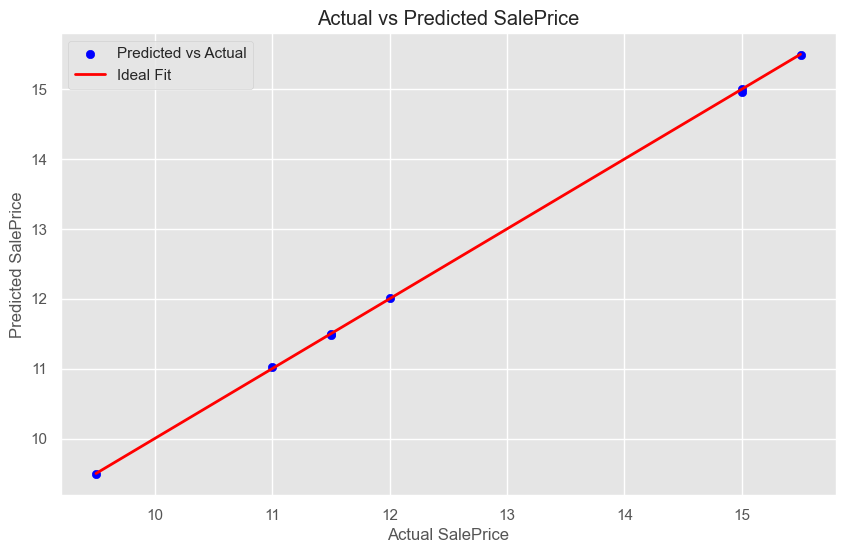

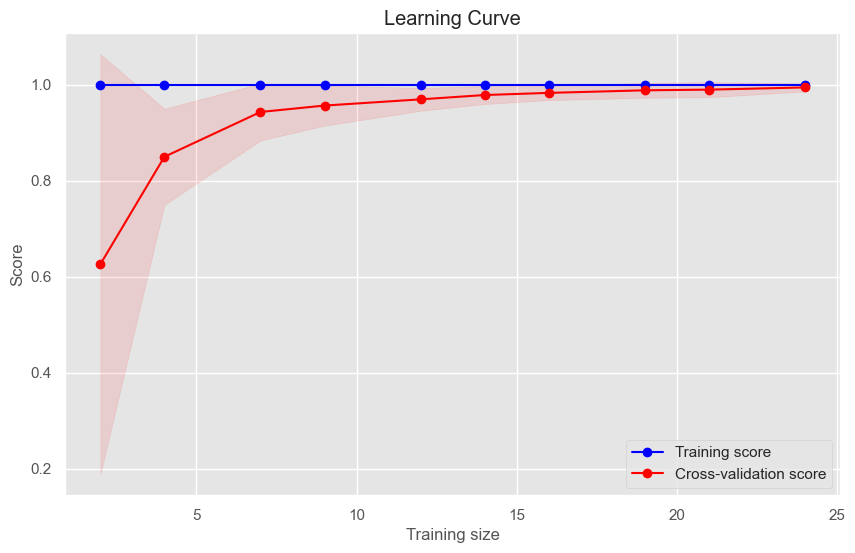

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


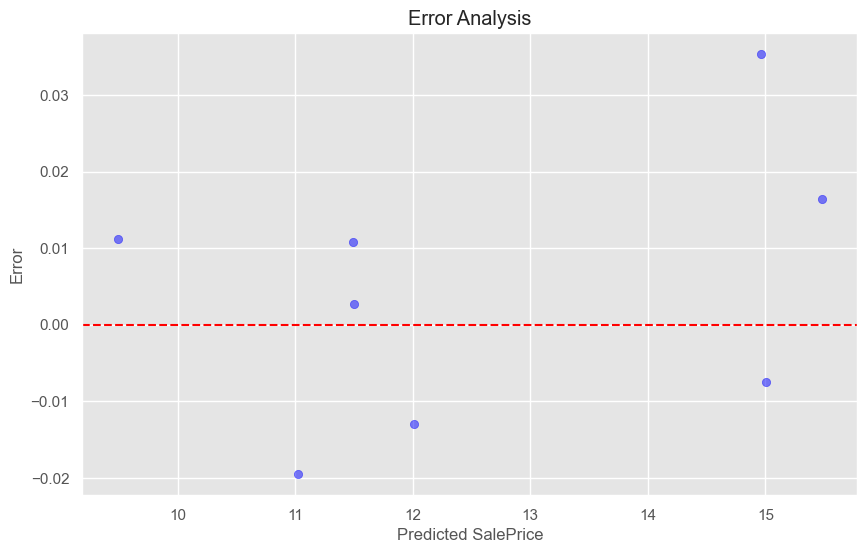

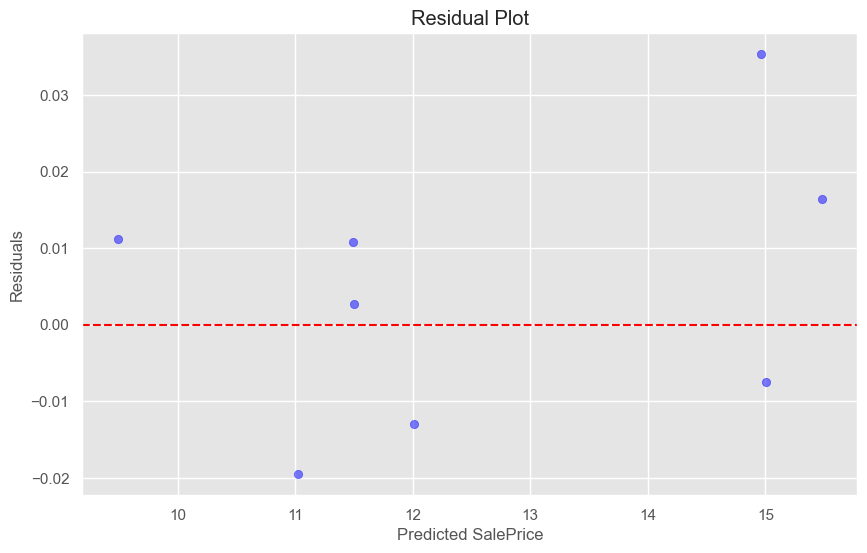

Random State 0:
Mean Absolute Error:  0.02566955881025083
Mean Squared Error:  0.0012429266713530182
Root Mean Squared Error:  0.035255165172680986
R² on Test data:  0.9998319423092255

Random State 1:
Mean Absolute Error:  0.03548637694577428
Mean Squared Error:  0.0018285338353535923
Root Mean Squared Error:  0.042761359138287366
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043015
Mean Squared Error:  0.0012368856317090061
Root Mean Squared Error:  0.03516938486395527
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.25294805595867836
Mean Squared Error:  0.25957299788538285
Root Mean Squared Error:  0.5094830692823686
R² on Test data:  0.9871507350651443

Random State 4:
Mean Absolute Error:  0.13808414828380233
Mean Squared Error:  0.07032614857603613
Root Mean Squared Error:  0.26519077769793603
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [106]:

ridge = Ridge()


param_grid_ridge = {
    'alpha': [0.05, 0.1, 1, 3, 5, 10],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
}


ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_cv.fit(X_train, y_train)


print("Best parameters: ", ridge_cv.best_params_)
print("Best score: ", ridge_cv.best_score_)
print("Best RMSE: ", np.sqrt(-1 * ridge_cv.best_score_))

best_ridge = ridge_cv.best_estimator_


y_train_pred = best_ridge.predict(X_train)


y_test_pred = best_ridge.predict(X_test)


train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)


test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()


def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)


errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()


baseline_prediction = np.mean(y_train)  
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


# Ensemble Learning

## Gradient Boosting Regressor

GridSearchCV, Test Prediction, MAE, MSE, RMSE, R2-Score, Error Analysis, Residual Analysis and checking Robustness.

Best parameters:  {'learning_rate': 0.1, 'max_depth': 15, 'max_features': 0.01, 'min_samples_leaf': 10, 'n_estimators': 300}
Best score:  -5.0404012769151
Best RMSE:  2.2450838017577652

Training Data Metrics:
Mean Absolute Error:  0.8541113457861162
Mean Squared Error:  1.549052701029755
Root Mean Squared Error:  1.2446094572313657
R2 Score:  0.886579836518888

Test Data Metrics:
Mean Absolute Error:  0.8761914718072896
Mean Squared Error:  1.3581352504072173
Root Mean Squared Error:  1.1653905999308631
R2 Score:  0.688456430014115


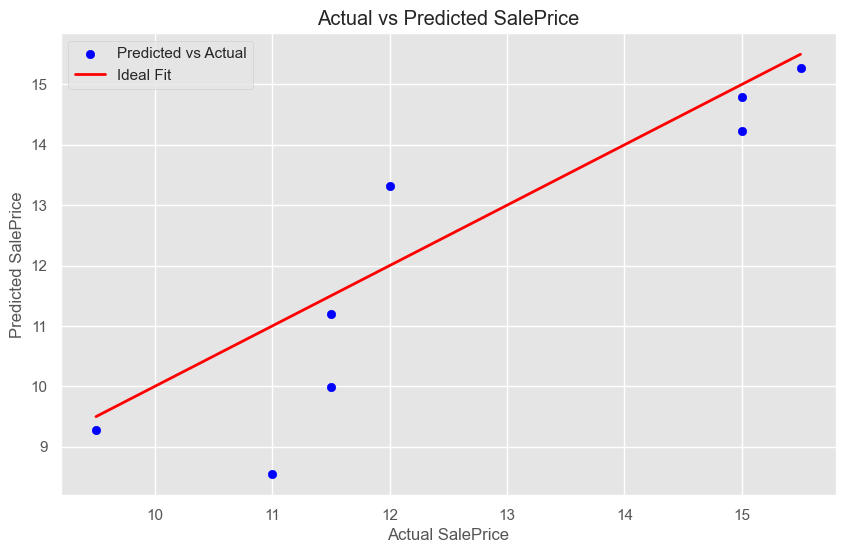

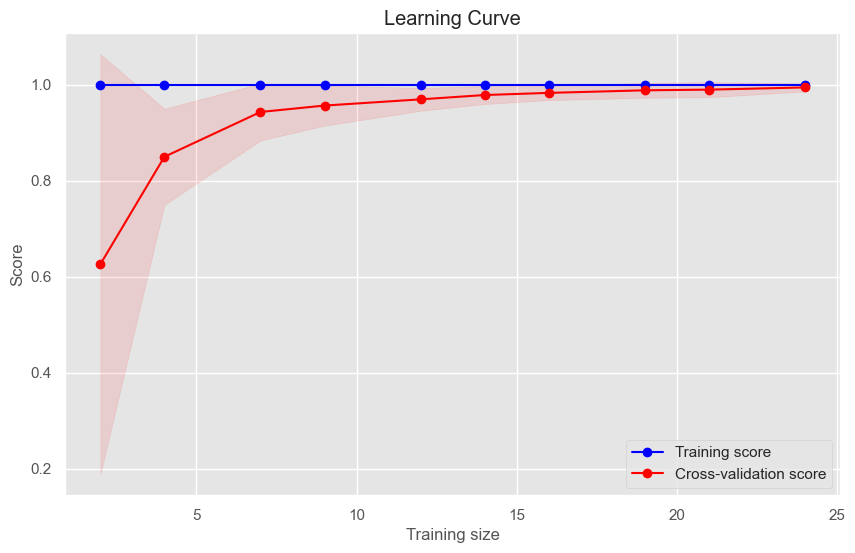

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


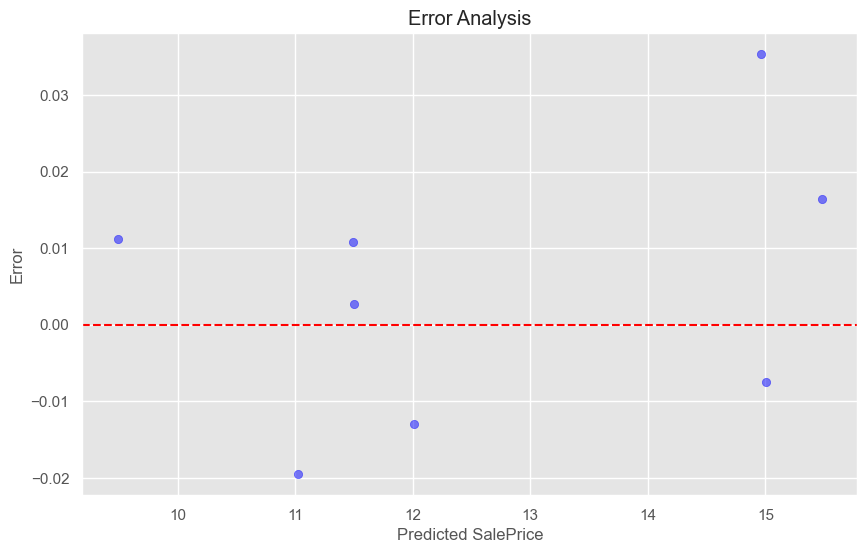

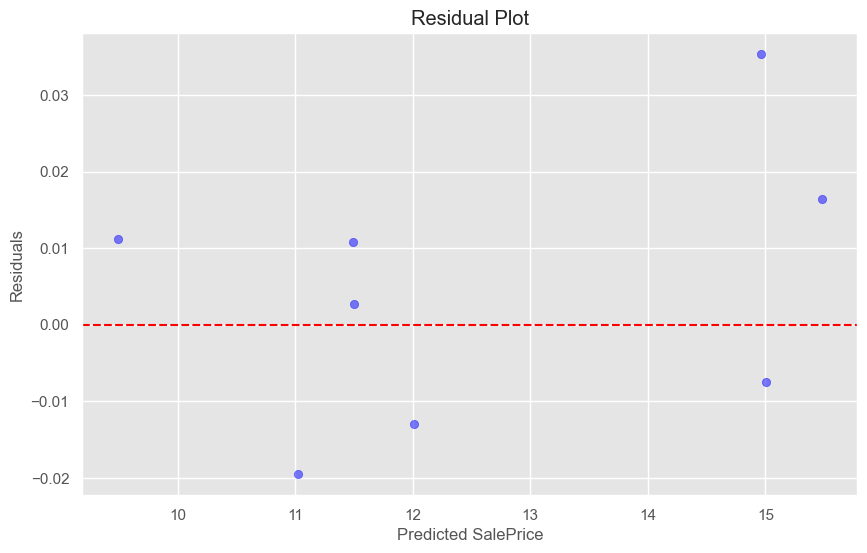

Random State 0:
Mean Absolute Error:  0.02566955881025083
Mean Squared Error:  0.0012429266713530182
Root Mean Squared Error:  0.035255165172680986
R² on Test data:  0.9998319423092255

Random State 1:
Mean Absolute Error:  0.03548637694577428
Mean Squared Error:  0.0018285338353535923
Root Mean Squared Error:  0.042761359138287366
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043015
Mean Squared Error:  0.0012368856317090061
Root Mean Squared Error:  0.03516938486395527
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.25294805595867836
Mean Squared Error:  0.25957299788538285
Root Mean Squared Error:  0.5094830692823686
R² on Test data:  0.9871507350651443

Random State 4:
Mean Absolute Error:  0.13808414828380233
Mean Squared Error:  0.07032614857603613
Root Mean Squared Error:  0.26519077769793603
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [107]:

GBR = GradientBoostingRegressor()


param_grid_GBR = {
    'max_depth': [12, 15, 20],
    'n_estimators': [200, 300, 500],
    'min_samples_leaf': [10, 25, 50],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_features': [0.01, 0.1, 0.7]
}


GBR_cv = GridSearchCV(GBR, param_grid_GBR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
GBR_cv.fit(X_train, y_train)


print("Best parameters: ", GBR_cv.best_params_)
print("Best score: ", GBR_cv.best_score_)
print("Best RMSE: ", np.sqrt(-1 * GBR_cv.best_score_))


best_gbr = GBR_cv.best_estimator_


y_train_pred = best_gbr.predict(X_train)


y_test_pred = best_gbr.predict(X_test)


train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)


test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)


errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()


baseline_prediction = np.mean(y_train)  
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


## LGBM Regressor (LightGBM)

GridSearchCV, Test Prediction, MAE, MSE, RMSE, R2-Score, Error Analysis, Residual Analysis and checking Robustness.

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 31, number of used features: 0
[LightGBM] [Info] Start training from score 12.290323
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

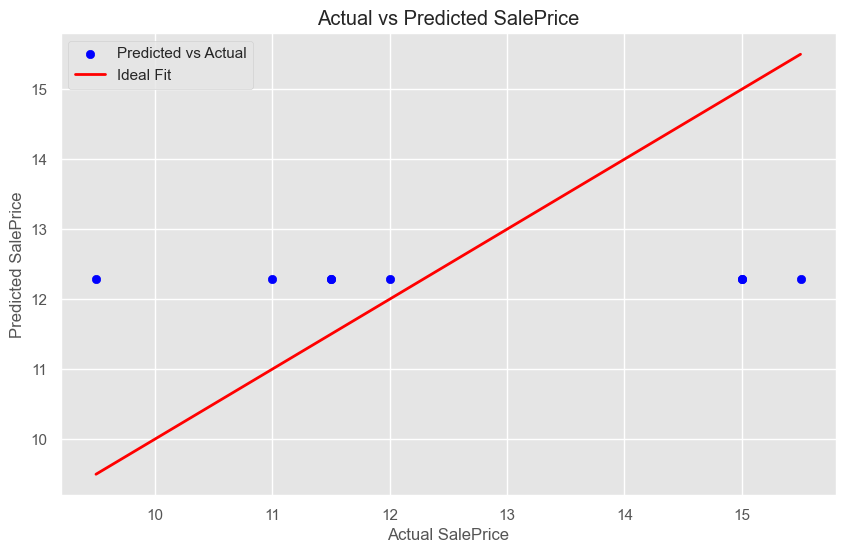

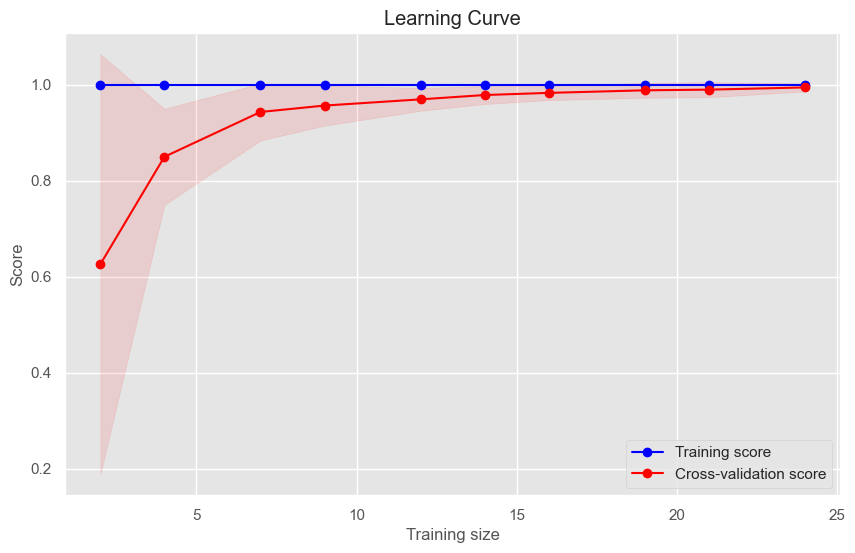

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


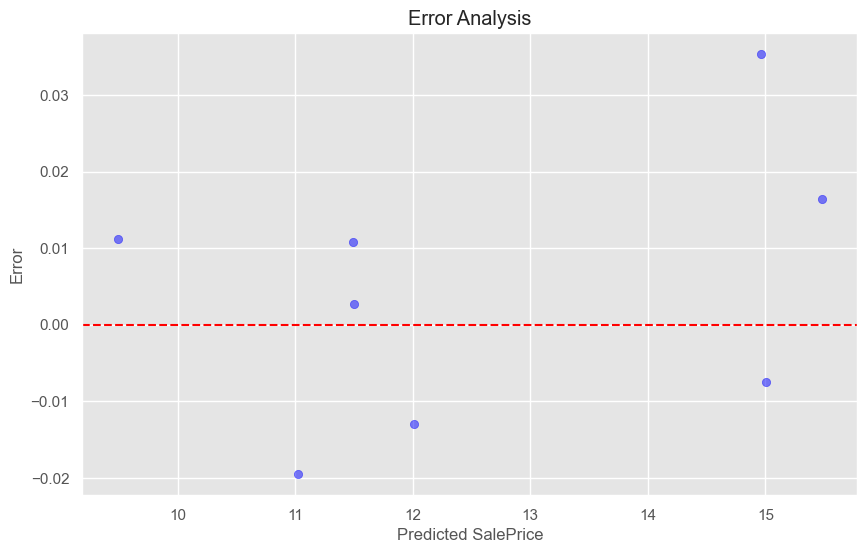

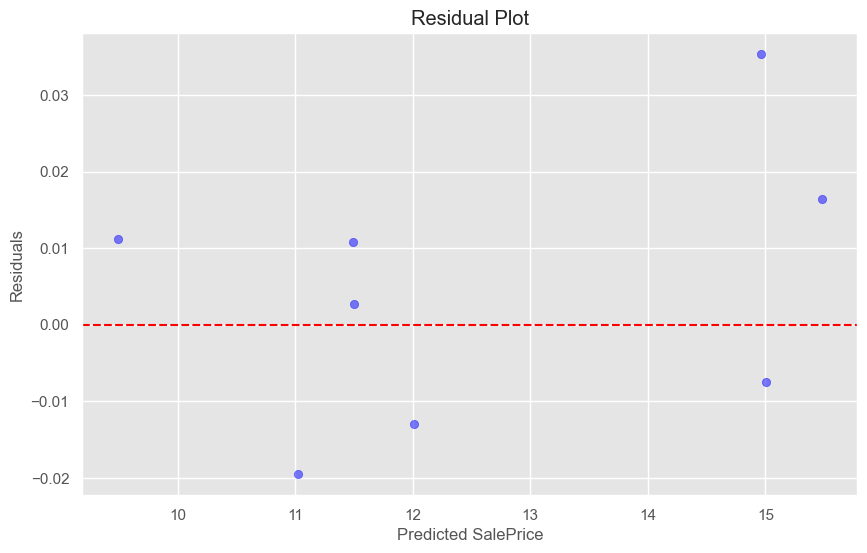

Random State 0:
Mean Absolute Error:  0.02566955881025083
Mean Squared Error:  0.0012429266713530182
Root Mean Squared Error:  0.035255165172680986
R² on Test data:  0.9998319423092255

Random State 1:
Mean Absolute Error:  0.03548637694577428
Mean Squared Error:  0.0018285338353535923
Root Mean Squared Error:  0.042761359138287366
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043015
Mean Squared Error:  0.0012368856317090061
Root Mean Squared Error:  0.03516938486395527
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.25294805595867836
Mean Squared Error:  0.25957299788538285
Root Mean Squared Error:  0.5094830692823686
R² on Test data:  0.9871507350651443

Random State 4:
Mean Absolute Error:  0.13808414828380233
Mean Squared Error:  0.07032614857603613
Root Mean Squared Error:  0.26519077769793603
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [108]:

lgbm_regressor = lgb.LGBMRegressor()


param_grid_lgbm = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}


lgbm_cv = GridSearchCV(lgbm_regressor, param_grid_lgbm, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
lgbm_cv.fit(X_train, y_train)


print("Best parameters: ", lgbm_cv.best_params_)
print("Best score: ", lgbm_cv.best_score_)
print("Best RMSE: ", np.sqrt(-1 * lgbm_cv.best_score_))


best_lgbm = lgbm_cv.best_estimator_


y_train_pred = best_lgbm.predict(X_train)


y_test_pred = best_lgbm.predict(X_test)


train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)


test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)


errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()


baseline_prediction = np.mean(y_train)  
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


## CatBoost Regressor

GridSearchCV, Test Prediction, MAE, MSE, RMSE, R2-Score, Error Analysis, Residual Analysis and checking Robustness.

Best parameters:  {'depth': 4, 'iterations': 700, 'learning_rate': 0.05}
Best score:  -4.636318299156399
Best RMSE:  2.153211159908939

Training Data Metrics:
Mean Absolute Error:  0.0012863127875629601
Mean Squared Error:  2.725469403539196e-06
Root Mean Squared Error:  0.0016508995740320475
R2 Score:  0.9999998004437259

Test Data Metrics:
Mean Absolute Error:  0.40388261201493103
Mean Squared Error:  0.1817095006867317
Root Mean Squared Error:  0.42627397373840653
R2 Score:  0.9583175338926494


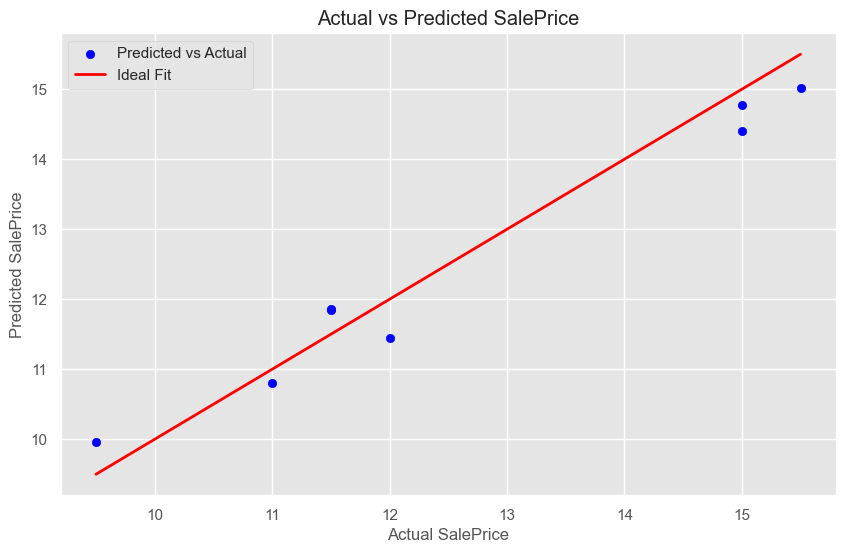

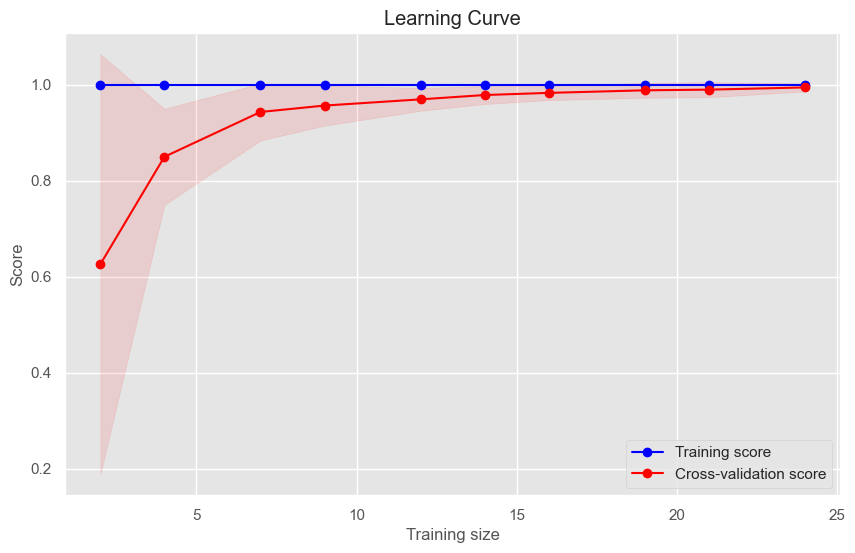

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


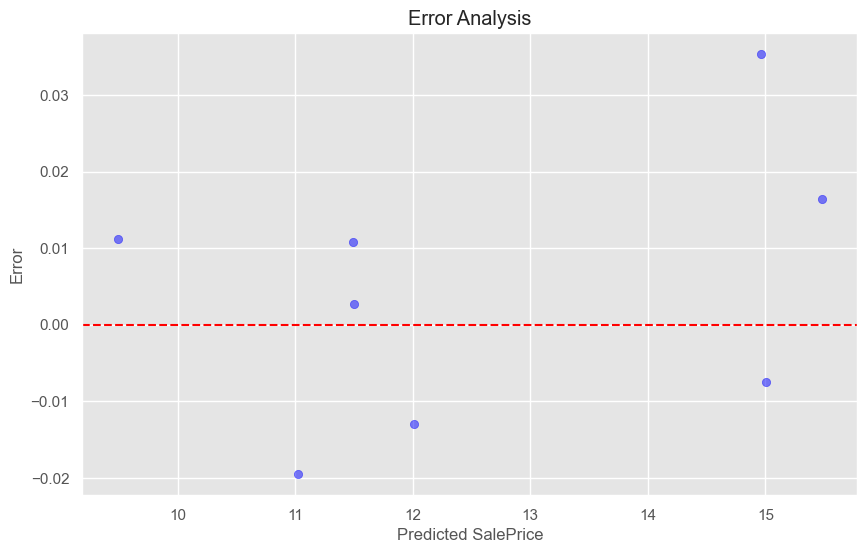

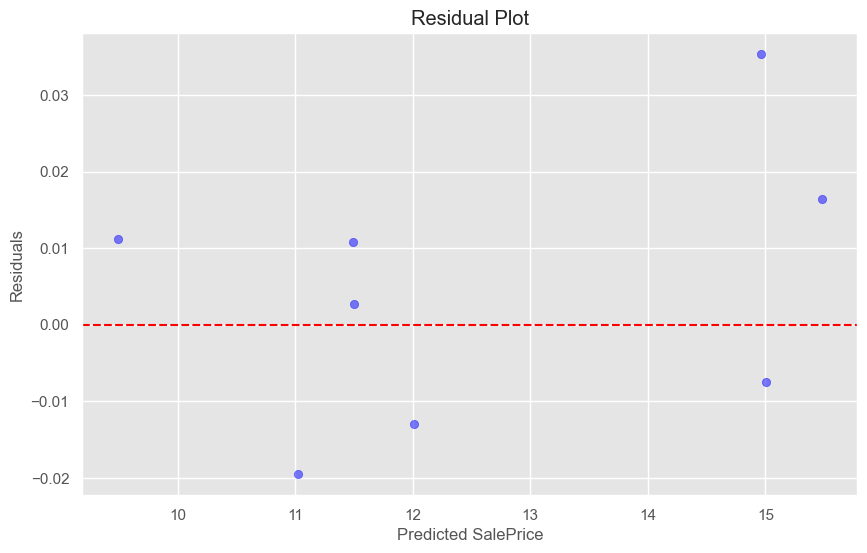

Random State 0:
Mean Absolute Error:  0.02566955881025083
Mean Squared Error:  0.0012429266713530182
Root Mean Squared Error:  0.035255165172680986
R² on Test data:  0.9998319423092255

Random State 1:
Mean Absolute Error:  0.03548637694577428
Mean Squared Error:  0.0018285338353535923
Root Mean Squared Error:  0.042761359138287366
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043015
Mean Squared Error:  0.0012368856317090061
Root Mean Squared Error:  0.03516938486395527
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.25294805595867836
Mean Squared Error:  0.25957299788538285
Root Mean Squared Error:  0.5094830692823686
R² on Test data:  0.9871507350651443

Random State 4:
Mean Absolute Error:  0.13808414828380233
Mean Squared Error:  0.07032614857603613
Root Mean Squared Error:  0.26519077769793603
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [109]:

catboost = CatBoostRegressor(loss_function='RMSE', verbose=False)


param_grid_cat = {
    'iterations': [100, 500, 700],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}


cat_cv = GridSearchCV(catboost, param_grid_cat, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
cat_cv.fit(X_train, y_train)


print("Best parameters: ", cat_cv.best_params_)
print("Best score: ", cat_cv.best_score_)
print("Best RMSE: ", np.sqrt(-1 * cat_cv.best_score_))

best_catboost = cat_cv.best_estimator_


y_train_pred = best_catboost.predict(X_train)


y_test_pred = best_catboost.predict(X_test)


train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)


test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)


errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()


baseline_prediction = np.mean(y_train)  
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


## VotingRegressor

Test Prediction, MAE, MSE, RMSE, R2-Score, Error Analysis, Residual Analysis and checking Robustness.


Training Data Metrics:
Mean Absolute Error:  0.3030623074454383
Mean Squared Error:  0.19963569552991
Root Mean Squared Error:  0.4468061050723345
R2 Score:  0.9853828645025339

Test Data Metrics:
Mean Absolute Error:  0.1926559131905914
Mean Squared Error:  0.06604995860557034
Root Mean Squared Error:  0.25700186498461514
R2 Score:  0.9848487550152096


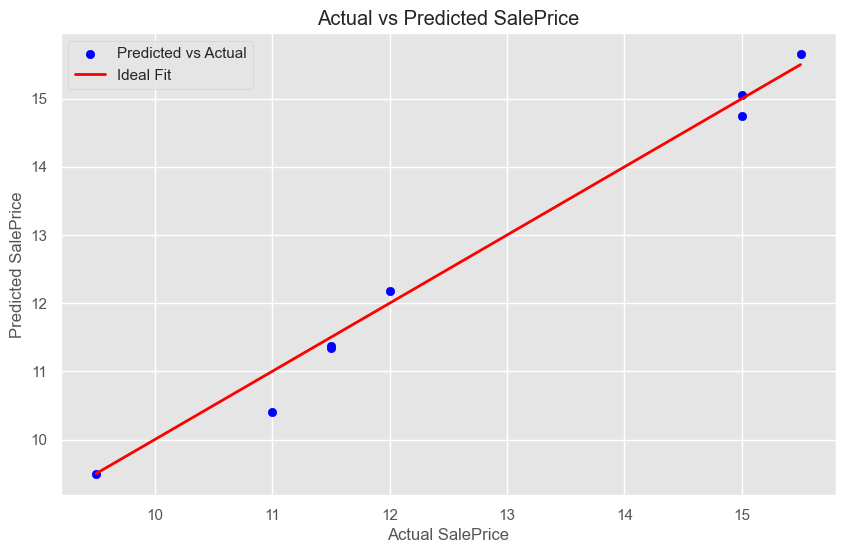

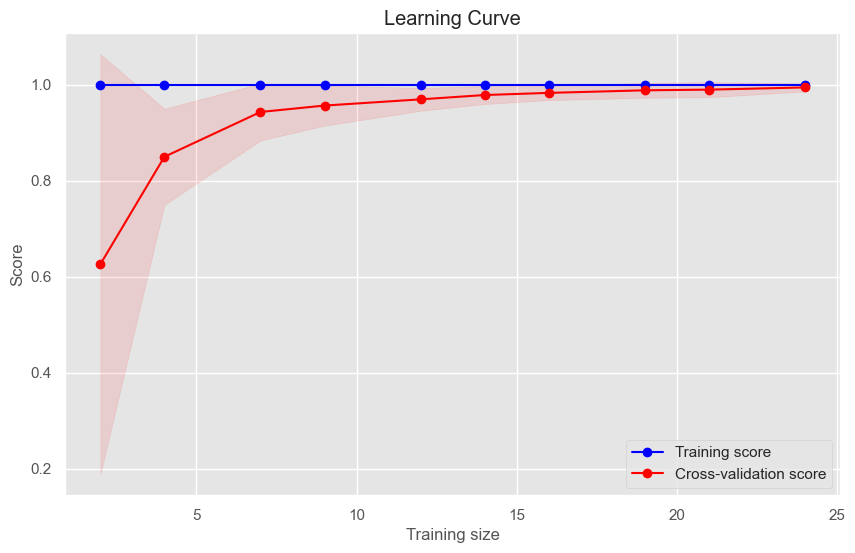

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


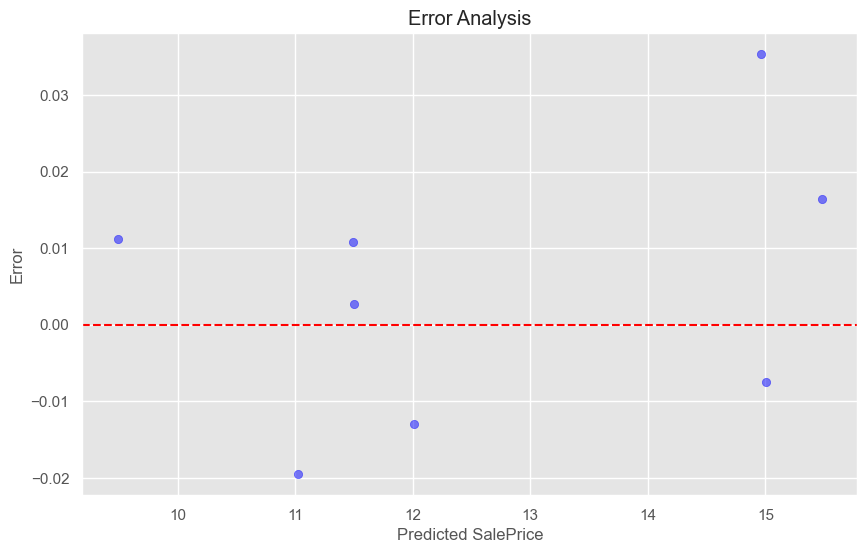

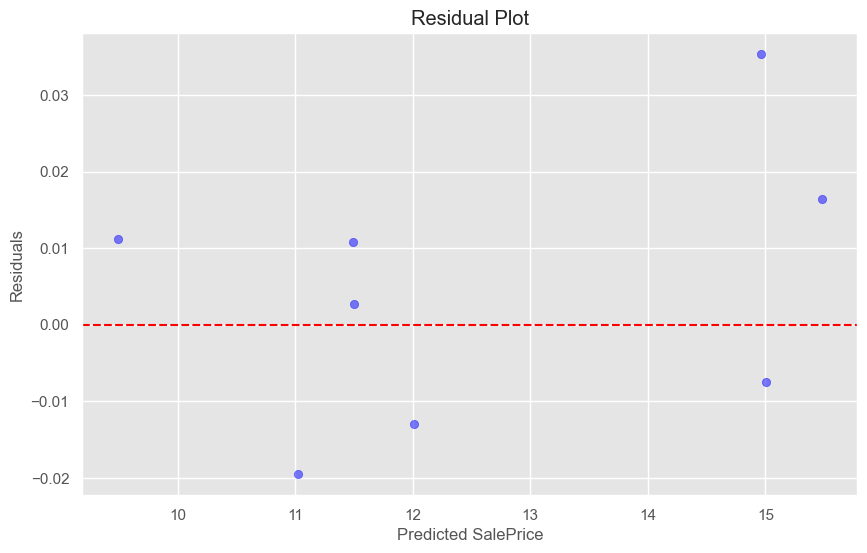

Random State 0:
Mean Absolute Error:  0.02566955881025083
Mean Squared Error:  0.0012429266713530182
Root Mean Squared Error:  0.035255165172680986
R² on Test data:  0.9998319423092255

Random State 1:
Mean Absolute Error:  0.03548637694577428
Mean Squared Error:  0.0018285338353535923
Root Mean Squared Error:  0.042761359138287366
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043015
Mean Squared Error:  0.0012368856317090061
Root Mean Squared Error:  0.03516938486395527
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.25294805595867836
Mean Squared Error:  0.25957299788538285
Root Mean Squared Error:  0.5094830692823686
R² on Test data:  0.9871507350651443

Random State 4:
Mean Absolute Error:  0.13808414828380233
Mean Squared Error:  0.07032614857603613
Root Mean Squared Error:  0.26519077769793603
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [110]:

vr = VotingRegressor([
    ('gbr', GBR_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('ridge', ridge_cv.best_estimator_)
], weights=[2, 3, 1])


vr.fit(X_train, y_train)


y_pred_vr = vr.predict(X_test)

y_train_pred_vr = vr.predict(X_train)


train_mae = mean_absolute_error(y_train, y_train_pred_vr)
train_mse = mean_squared_error(y_train, y_train_pred_vr)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred_vr)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)


test_mae = mean_absolute_error(y_test, y_pred_vr)
test_mse = mean_squared_error(y_test, y_pred_vr)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_pred_vr)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_vr, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()


def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)

errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()

baseline_prediction = np.mean(y_train)  
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


## Stacking Regressor

Test Prediction, MAE, MSE, RMSE, R2-Score, Error Analysis, Residual Analysis and checking Robustness.

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 31, number of used features: 0
[LightGBM] [Info] Start training from score 12.290323
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

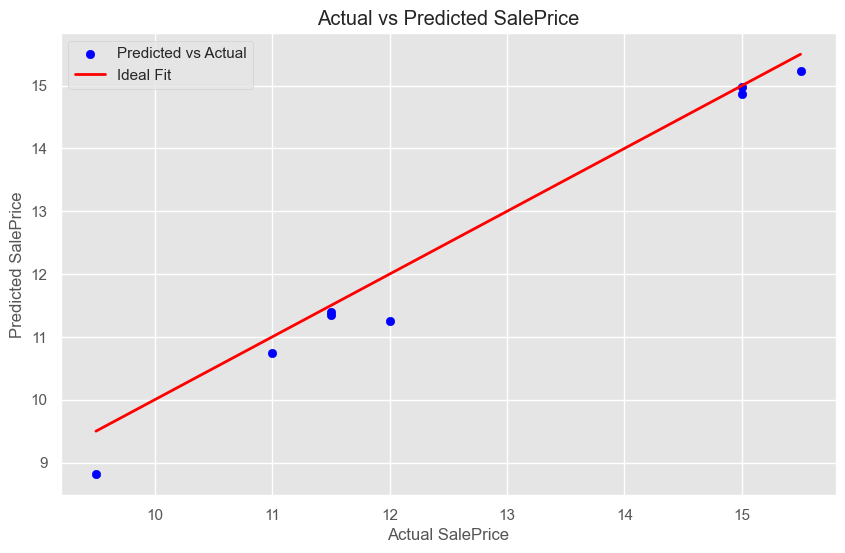

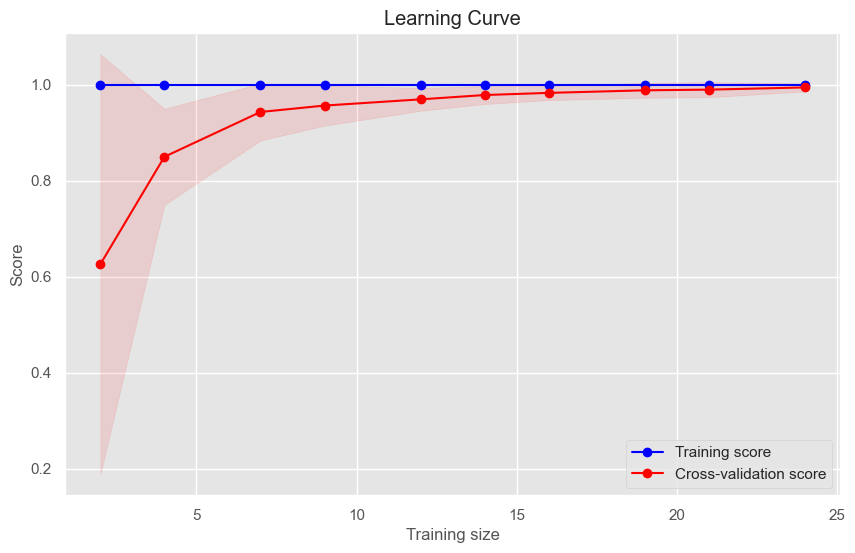

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


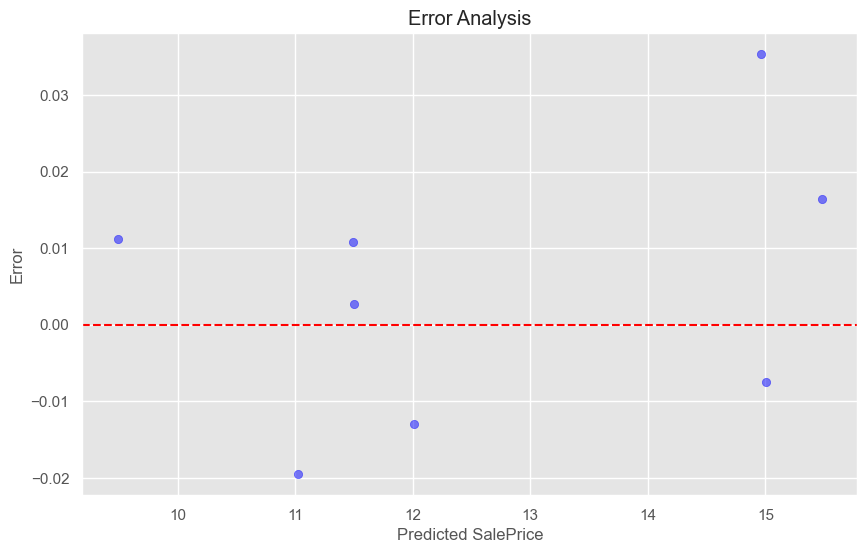

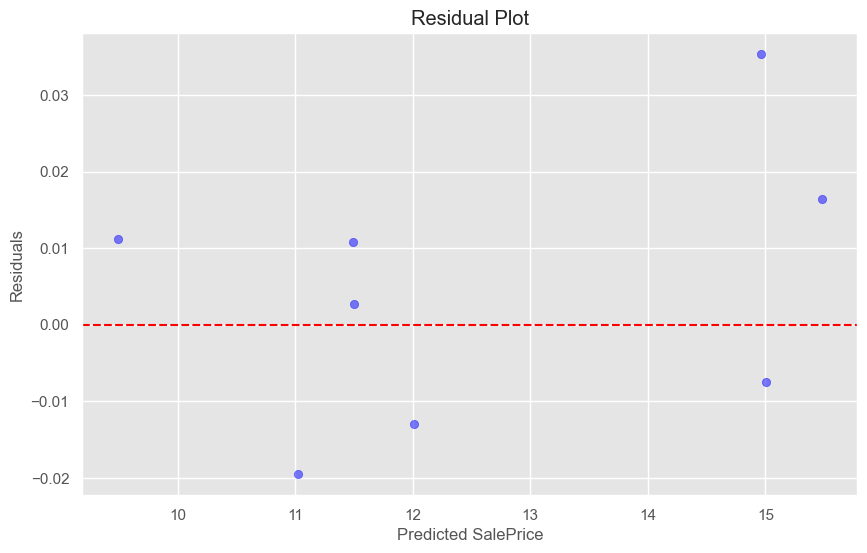

Random State 0:
Mean Absolute Error:  0.02566955881025083
Mean Squared Error:  0.0012429266713530182
Root Mean Squared Error:  0.035255165172680986
R² on Test data:  0.9998319423092255

Random State 1:
Mean Absolute Error:  0.03548637694577428
Mean Squared Error:  0.0018285338353535923
Root Mean Squared Error:  0.042761359138287366
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043015
Mean Squared Error:  0.0012368856317090061
Root Mean Squared Error:  0.03516938486395527
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.25294805595867836
Mean Squared Error:  0.25957299788538285
Root Mean Squared Error:  0.5094830692823686
R² on Test data:  0.9871507350651443

Random State 4:
Mean Absolute Error:  0.13808414828380233
Mean Squared Error:  0.07032614857603613
Root Mean Squared Error:  0.26519077769793603
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [111]:
estimators = [
    ('gbr', GBR_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('cat', cat_cv.best_estimator_),
    ('lgb', lgbm_cv.best_estimator_),
    ('rfr', rfr_cv.best_estimator_)
]

stackreg = StackingRegressor(
    estimators=estimators,
    final_estimator=vr
)

stackreg.fit(X_train, y_train)
y_pred_stackreg = stackreg.predict(X_test)
y_train_pred_stackreg = stackreg.predict(X_train)

train_mae = mean_absolute_error(y_train, y_train_pred_stackreg)
train_mse = mean_squared_error(y_train, y_train_pred_stackreg)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred_stackreg)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

test_mae = mean_absolute_error(y_test, y_pred_stackreg)
test_mse = mean_squared_error(y_test, y_pred_stackreg)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_pred_stackreg)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_stackreg, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)

errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()

baseline_prediction = np.mean(y_train)  
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


# Overall calculate matrix

Calculating and comparing merics on both test and train data.

In [112]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)

    y_test_pred = model.predict(X_test)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    return {
        'Train MAE': train_mae,
        'Train MSE': train_mse,
        'Train RMSE': train_rmse,
        'Train R2': train_r2,
        'Test MAE': test_mae,
        'Test MSE': test_mse,
        'Test RMSE': test_rmse,
        'Test R2': test_r2
    }

models = {
    'Linear Regression': lr,
    'Decision Tree': dt_cv.best_estimator_,
    'Random Forest': rfr_cv.best_estimator_,
    'K-Nearest Neighbors': knn_cv.best_estimator_,
    'Support Vector Machine':svm_random_search.best_estimator_,
    'Gradient Boosting': GBR_cv.best_estimator_,
    'XGBoost': xgb_cv.best_estimator_,
    'Ridge': ridge_cv.best_estimator_,
    'ElasticNet': en_cv.best_estimator_,
    'Bayesian Ridge': br_cv.best_estimator_,
    'AdaBoost': ada_cv.best_estimator_,
    'LGBM': lgbm_cv.best_estimator_,
    'CatBoost': cat_cv.best_estimator_,
    'Stacking Regressor': stackreg
}

results = []
for name, model in models.items():
    metrics = evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append({'Model': name, **metrics})

results_df = pd.DataFrame(results)

print(results_df)


                     Model     Train MAE     Train MSE    Train RMSE  \
0        Linear Regression  1.535062e-15  5.109859e-30  2.260500e-15   
1            Decision Tree  2.473118e-01  2.190860e-01  4.680663e-01   
2            Random Forest  2.925350e-01  4.998141e-01  7.069753e-01   
3      K-Nearest Neighbors  0.000000e+00  0.000000e+00  0.000000e+00   
4   Support Vector Machine  6.876030e-02  6.100170e-03  7.810358e-02   
5        Gradient Boosting  8.541113e-01  1.549053e+00  1.244609e+00   
6                  XGBoost  5.480736e-04  6.334937e-07  7.959232e-04   
7                    Ridge  3.296660e-04  1.893216e-07  4.351110e-04   
8               ElasticNet  2.033775e-03  8.022301e-06  2.832367e-03   
9           Bayesian Ridge  1.350635e-06  3.484492e-12  1.866679e-06   
10                AdaBoost  1.713775e-01  5.936335e-02  2.436460e-01   
11                    LGBM  2.719043e+00  1.365765e+01  3.695626e+00   
12                CatBoost  1.286313e-03  2.725469e-06  1.650900

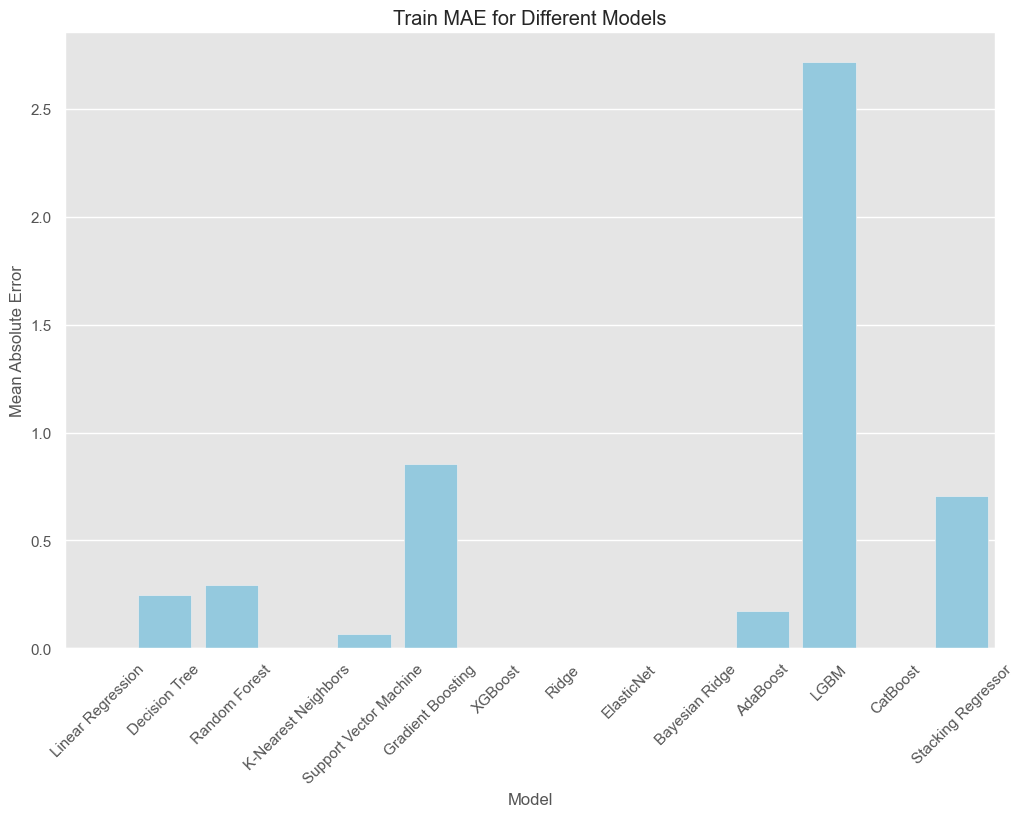

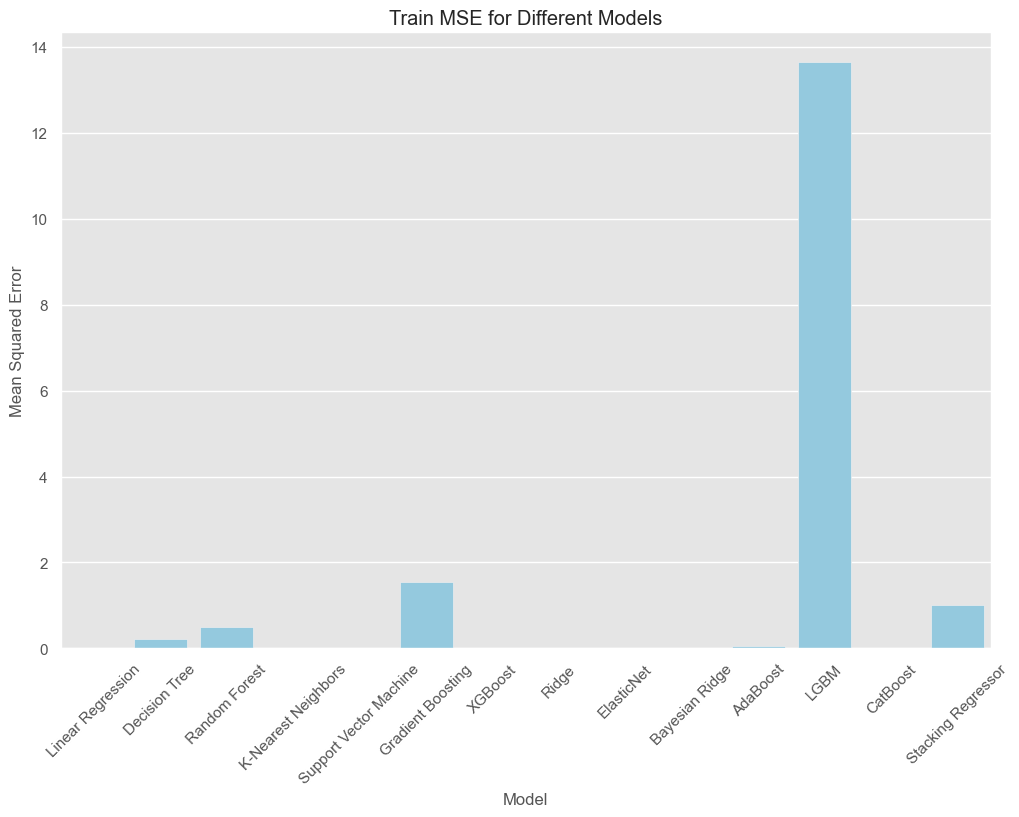

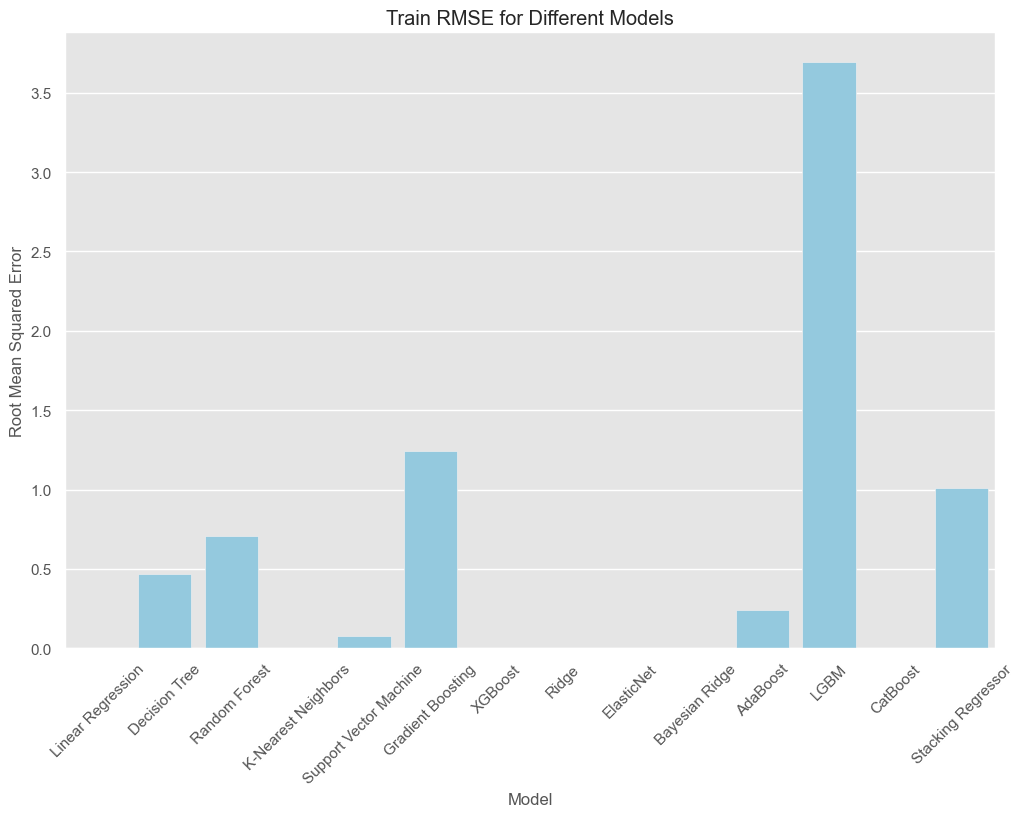

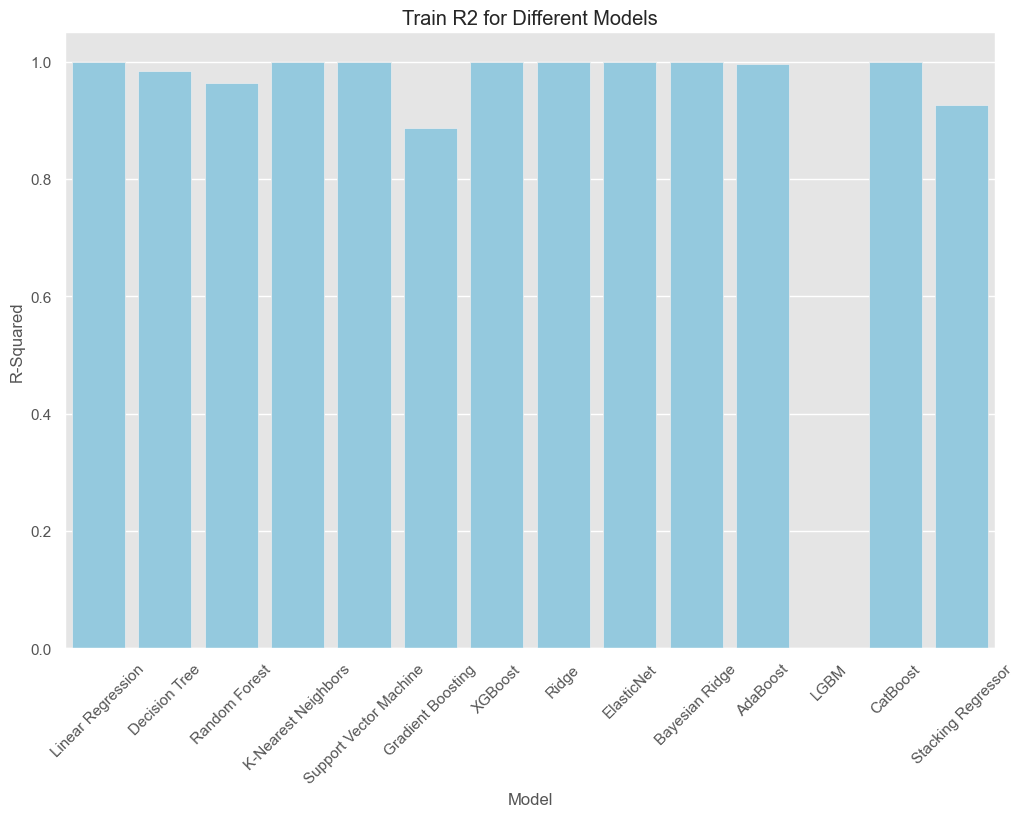

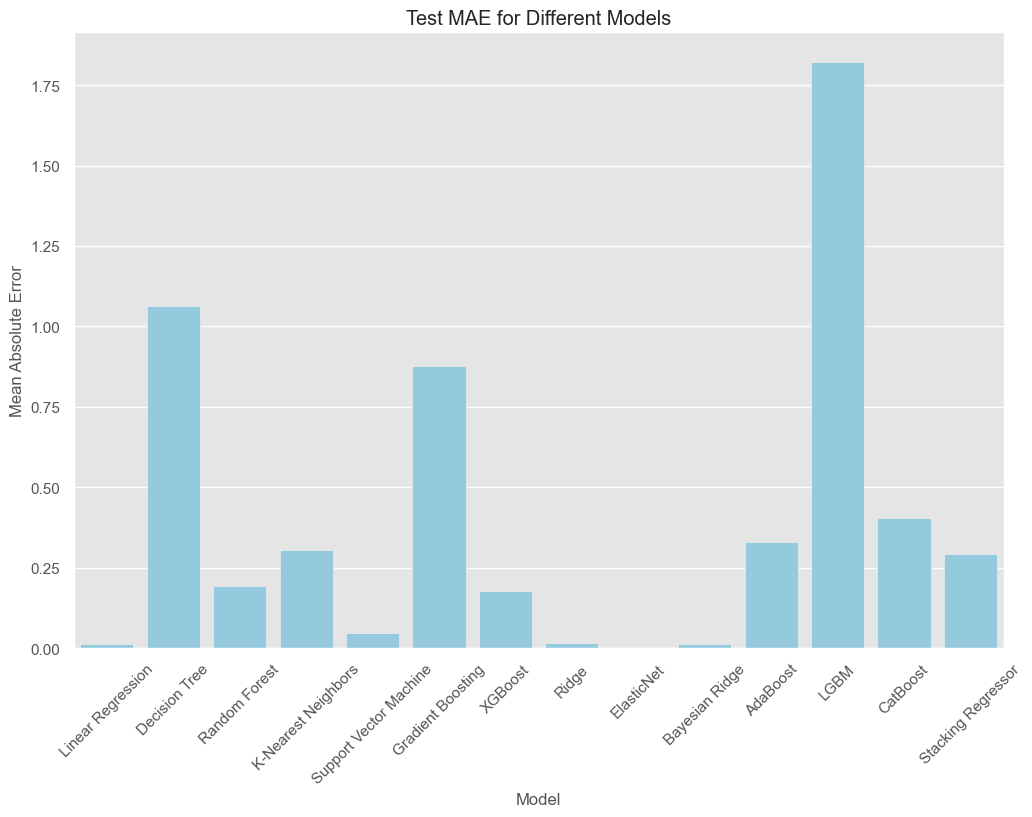

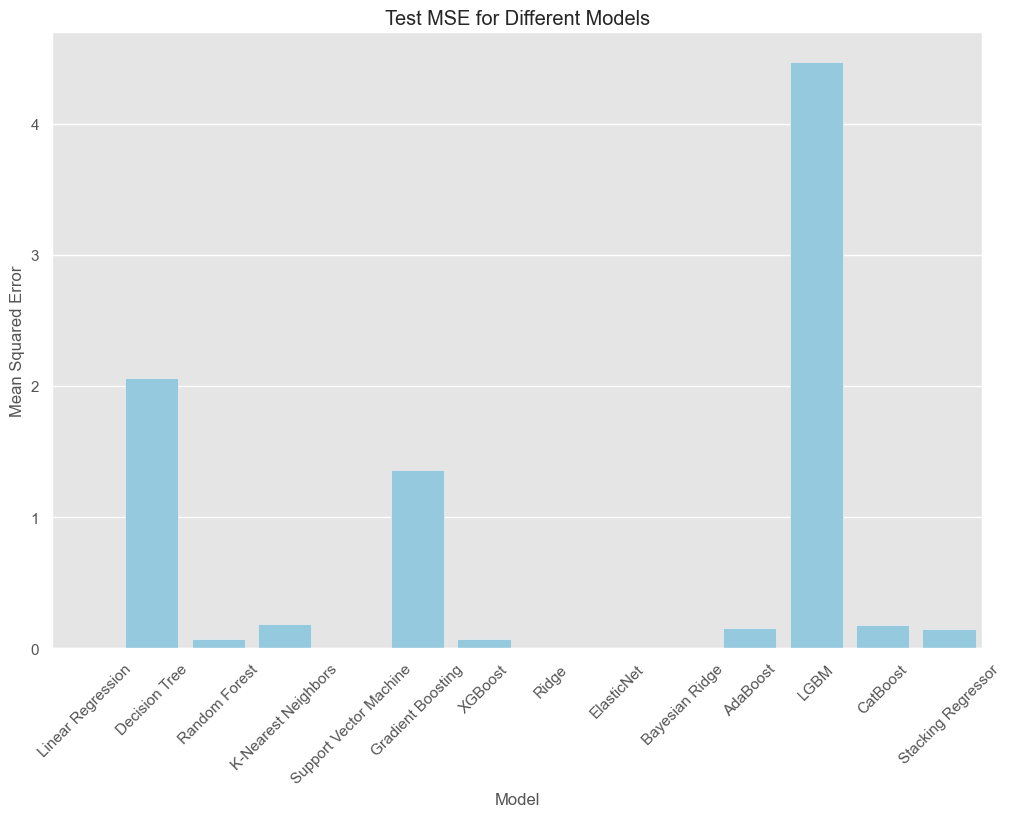

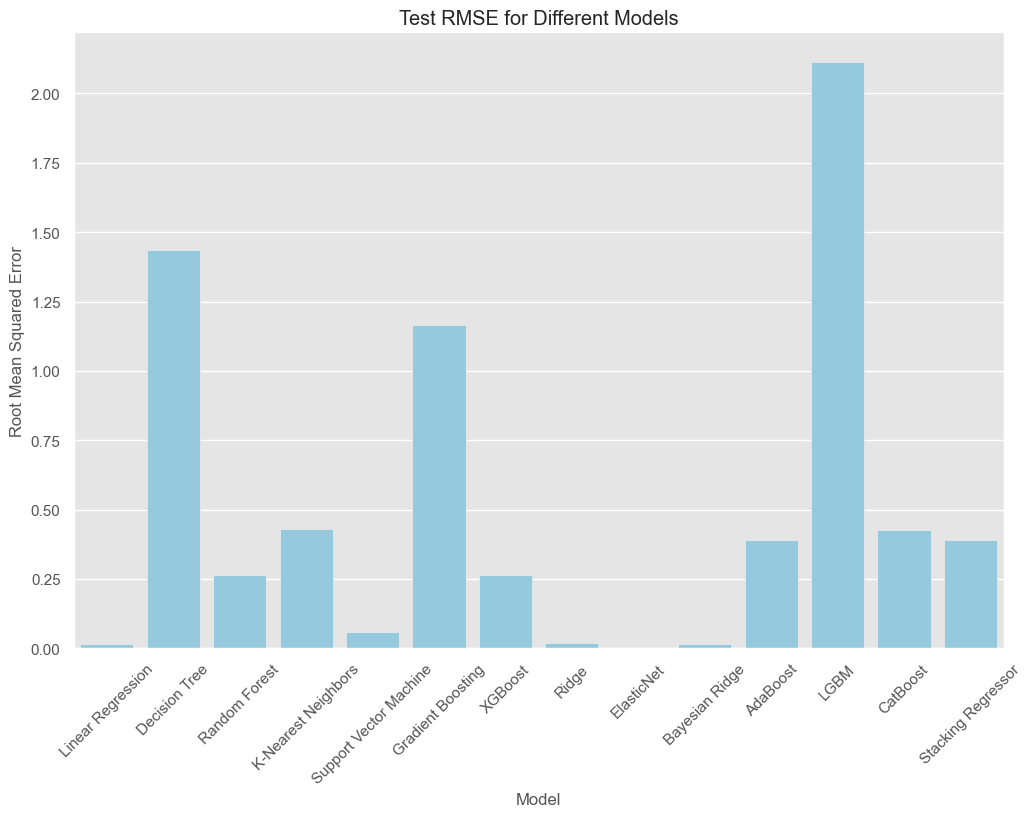

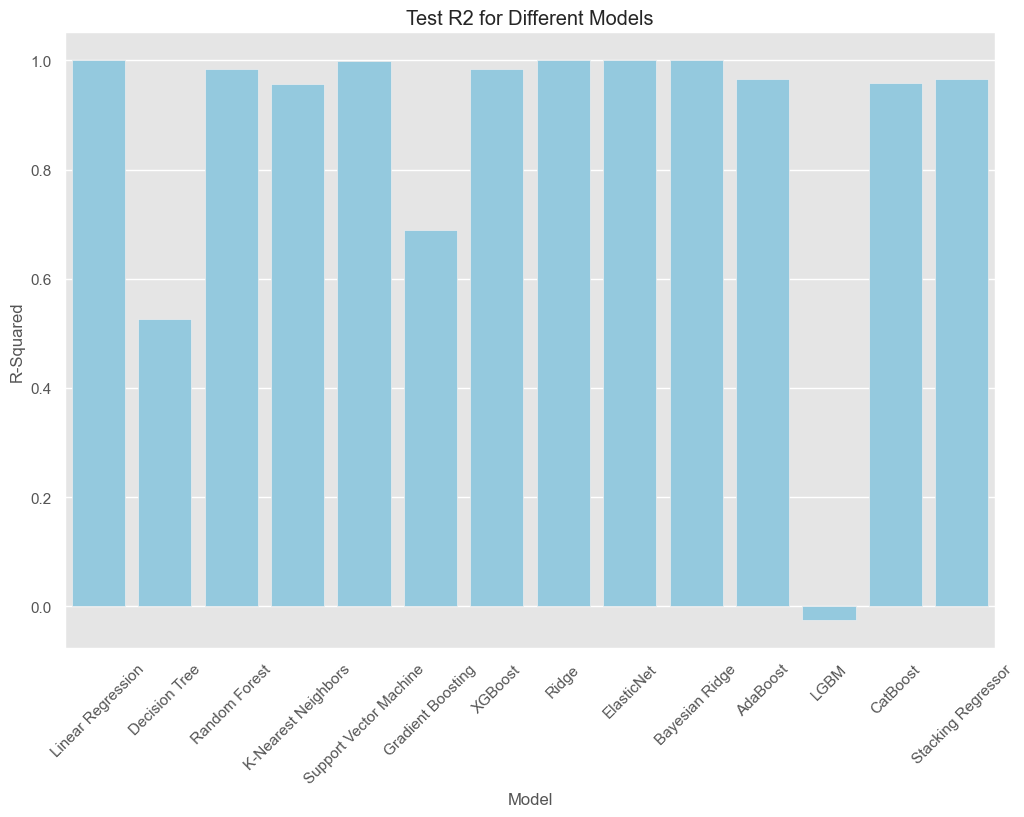

                     Model     Train MAE     Train MSE    Train RMSE  \
0        Linear Regression  1.535062e-15  5.109859e-30  2.260500e-15   
1            Decision Tree  2.473118e-01  2.190860e-01  4.680663e-01   
2            Random Forest  2.925350e-01  4.998141e-01  7.069753e-01   
3      K-Nearest Neighbors  0.000000e+00  0.000000e+00  0.000000e+00   
4   Support Vector Machine  6.876030e-02  6.100170e-03  7.810358e-02   
5        Gradient Boosting  8.541113e-01  1.549053e+00  1.244609e+00   
6                  XGBoost  5.480736e-04  6.334937e-07  7.959232e-04   
7                    Ridge  3.296660e-04  1.893216e-07  4.351110e-04   
8               ElasticNet  2.033775e-03  8.022301e-06  2.832367e-03   
9           Bayesian Ridge  1.350635e-06  3.484492e-12  1.866679e-06   
10                AdaBoost  1.713775e-01  5.936335e-02  2.436460e-01   
11                    LGBM  2.719043e+00  1.365765e+01  3.695626e+00   
12                CatBoost  1.286313e-03  2.725469e-06  1.650900

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_metrics(df, metric, title, ylabel):
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Model', y=metric, data=df,color='skyblue')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.show()
plot_metrics(results_df, 'Train MAE', 'Train MAE for Different Models', 'Mean Absolute Error')
plot_metrics(results_df, 'Train MSE', 'Train MSE for Different Models', 'Mean Squared Error')
plot_metrics(results_df, 'Train RMSE', 'Train RMSE for Different Models', 'Root Mean Squared Error')
plot_metrics(results_df, 'Train R2', 'Train R2 for Different Models', 'R-Squared')

plot_metrics(results_df, 'Test MAE', 'Test MAE for Different Models', 'Mean Absolute Error')
plot_metrics(results_df, 'Test MSE', 'Test MSE for Different Models', 'Mean Squared Error')
plot_metrics(results_df, 'Test RMSE', 'Test RMSE for Different Models', 'Root Mean Squared Error')
plot_metrics(results_df, 'Test R2', 'Test R2 for Different Models', 'R-Squared')

print(results_df)


The best model is the one with the lowest Test RMSE.

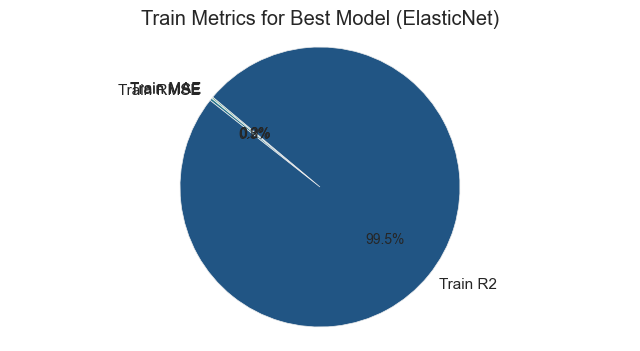

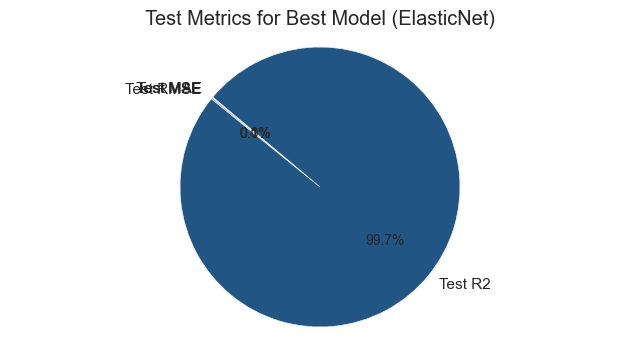

In [114]:
best_model = results_df.loc[results_df['Test RMSE'].idxmin()]
train_metrics = best_model[['Train MAE', 'Train MSE', 'Train RMSE', 'Train R2']]
plt.figure(figsize=(8, 4))
plt.pie(train_metrics, labels=train_metrics.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("crest", len(train_metrics)))
plt.title(f'Train Metrics for Best Model ({best_model["Model"]})')
plt.axis('equal') 
plt.show()

test_metrics = best_model[['Test MAE', 'Test MSE', 'Test RMSE', 'Test R2']]
plt.figure(figsize=(8, 4))
plt.pie(test_metrics, labels=test_metrics.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("crest", len(test_metrics)))
plt.title(f'Test Metrics for Best Model ({best_model["Model"]})')
plt.axis('equal') 
plt.show()

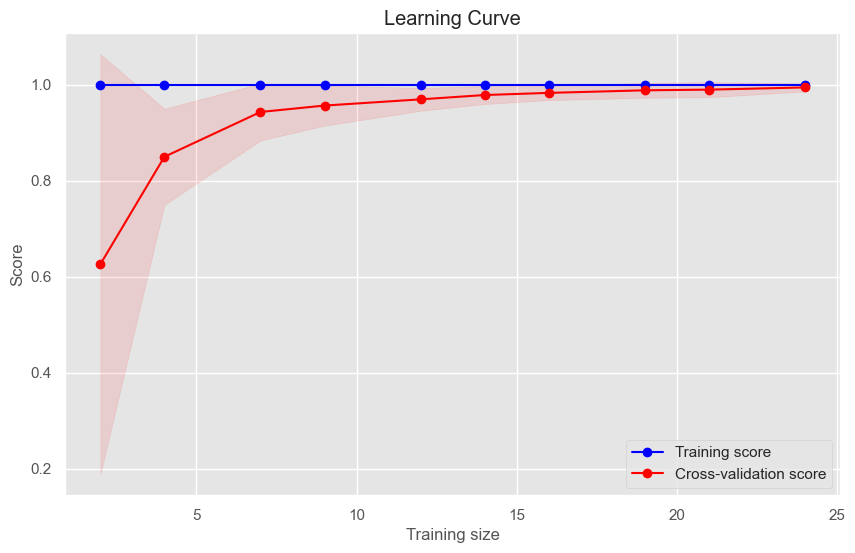

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


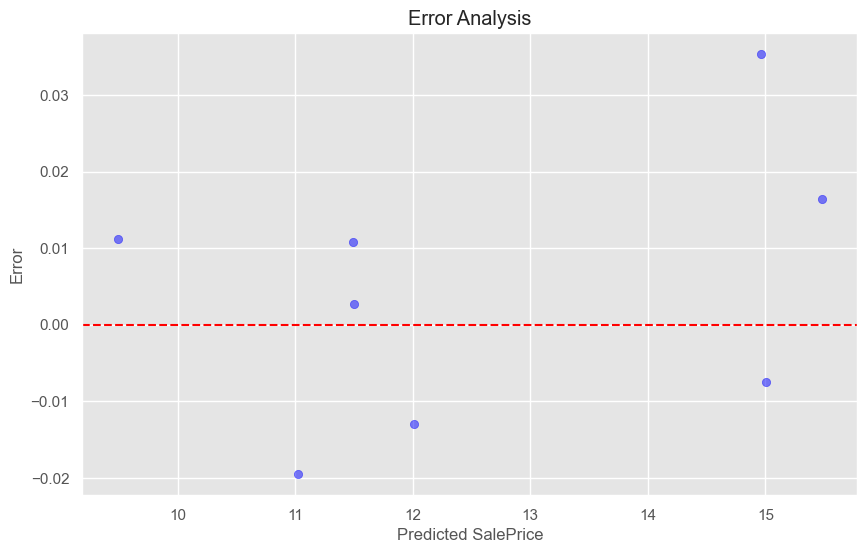

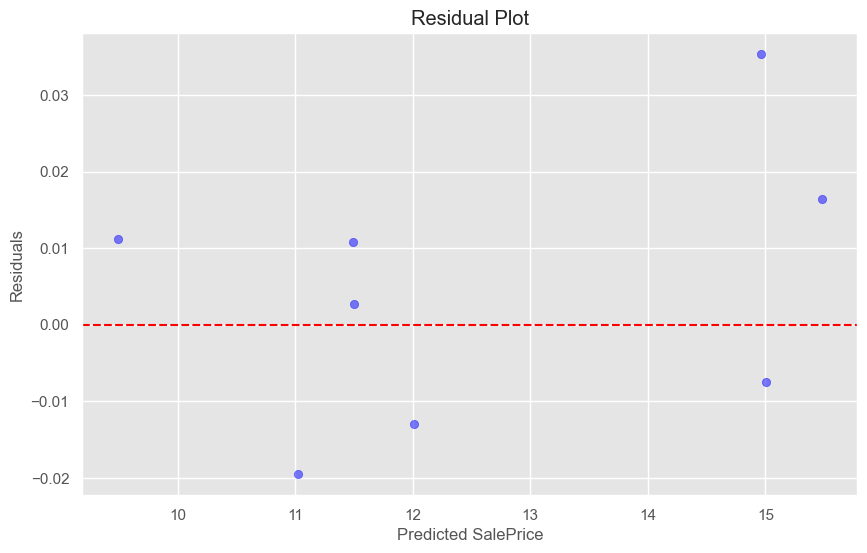

Random State 0:
Mean Absolute Error:  0.02566955881025083
Mean Squared Error:  0.0012429266713530182
Root Mean Squared Error:  0.035255165172680986
R² on Test data:  0.9998319423092255

Random State 1:
Mean Absolute Error:  0.03548637694577428
Mean Squared Error:  0.0018285338353535923
Root Mean Squared Error:  0.042761359138287366
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043015
Mean Squared Error:  0.0012368856317090061
Root Mean Squared Error:  0.03516938486395527
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.25294805595867836
Mean Squared Error:  0.25957299788538285
Root Mean Squared Error:  0.5094830692823686
R² on Test data:  0.9871507350651443

Random State 4:
Mean Absolute Error:  0.13808414828380233
Mean Squared Error:  0.07032614857603613
Root Mean Squared Error:  0.26519077769793603
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [115]:
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)

errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()
for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()

baseline_prediction = np.mean(y_train)  
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


# Training and Testing all the models

Training Linear Regression...


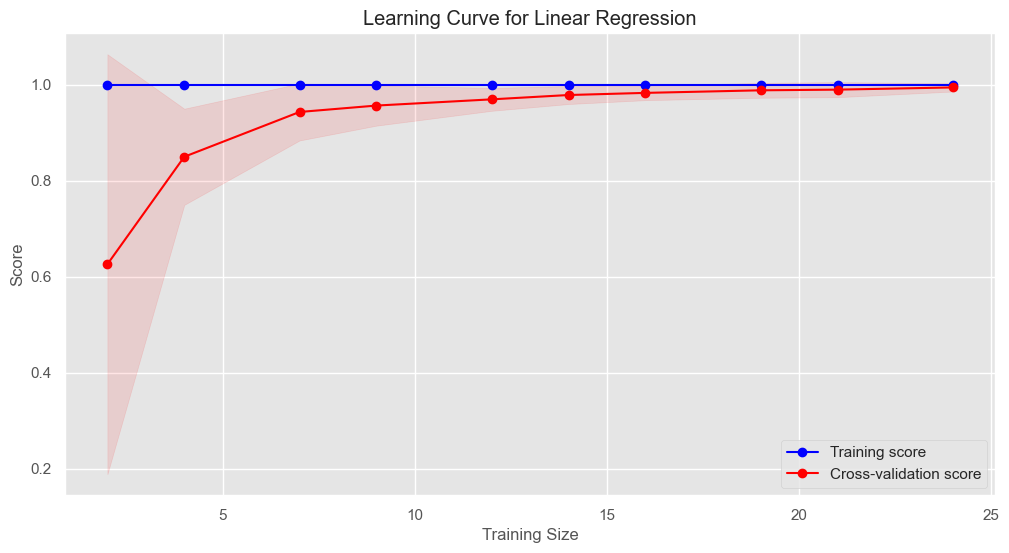

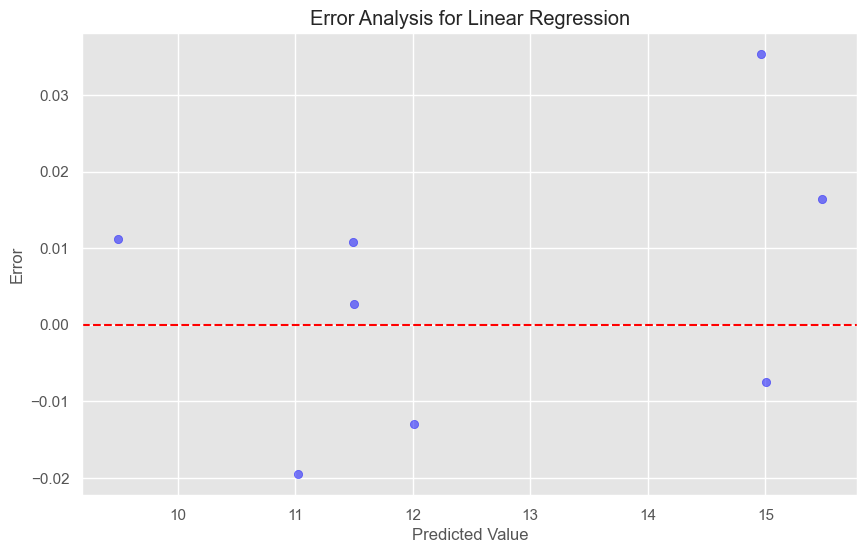

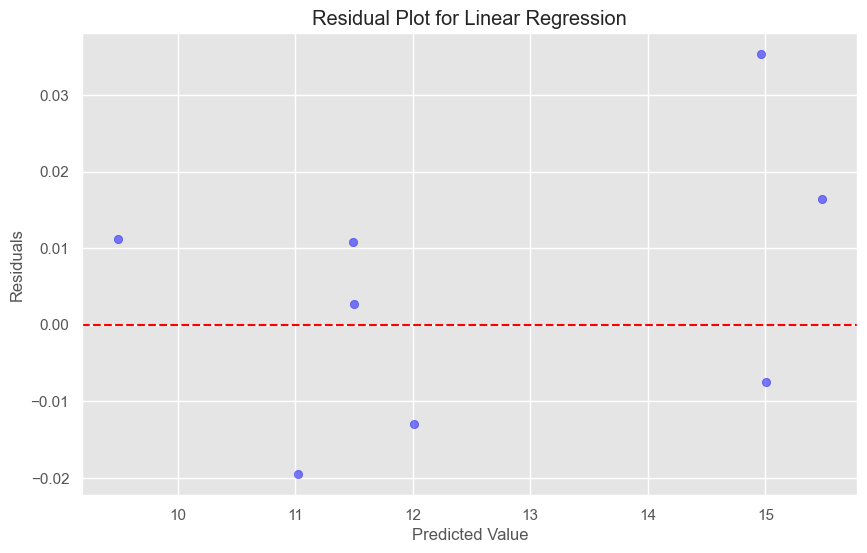

Robustness Check for Linear Regression:
Random State 0:
Mean Absolute Error:  0.02566955881025083
Mean Squared Error:  0.0012429266713530182
Root Mean Squared Error:  0.035255165172680986
R² on Test data:  0.9998319423092255

Random State 1:
Mean Absolute Error:  0.03548637694577428
Mean Squared Error:  0.0018285338353535923
Root Mean Squared Error:  0.042761359138287366
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043015
Mean Squared Error:  0.0012368856317090061
Root Mean Squared Error:  0.03516938486395527
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.25294805595867836
Mean Squared Error:  0.25957299788538285
Root Mean Squared Error:  0.5094830692823686
R² on Test data:  0.9871507350651443

Random State 4:
Mean Absolute Error:  0.13808414828380233
Mean Squared Error:  0.07032614857603613
Root Mean Squared Error:  0.26519077769793603
R² on Test data:  0.9959181921019955

Cross-Validation MSE for Linear Regres

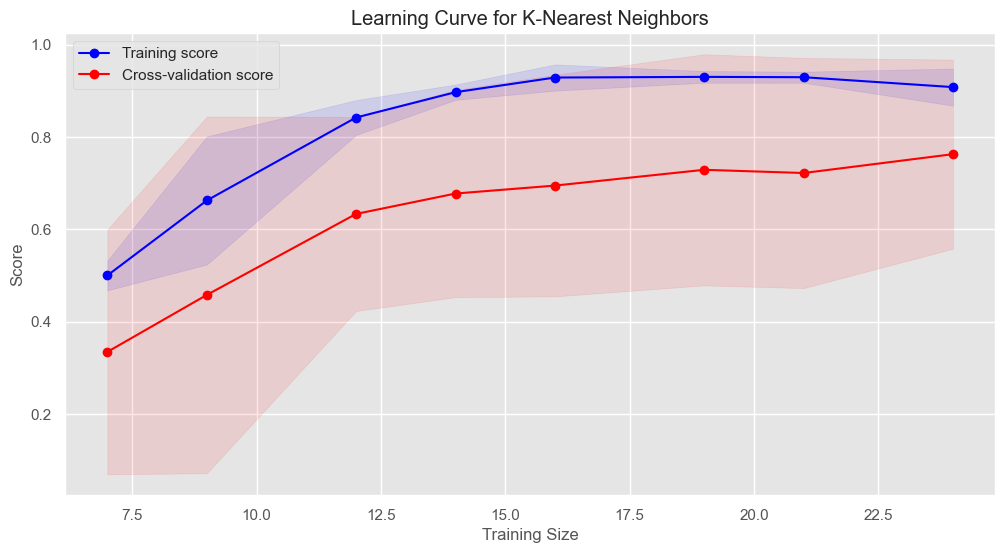

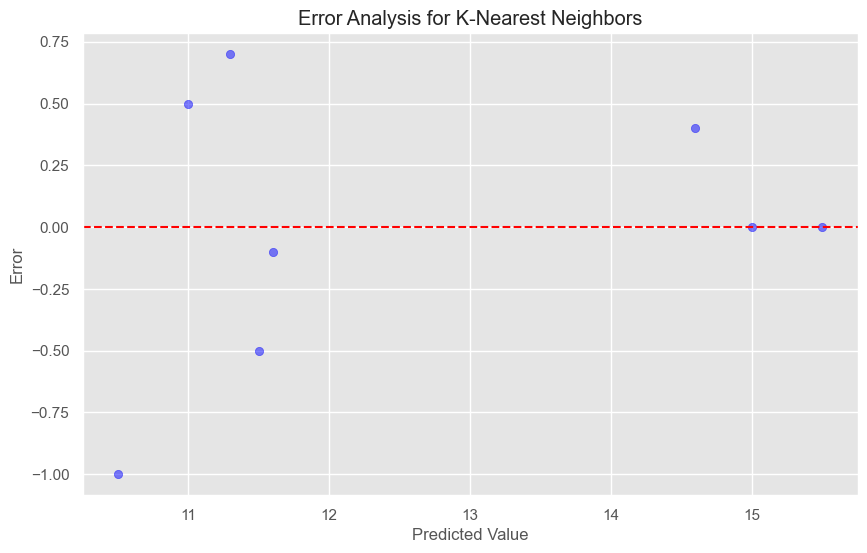

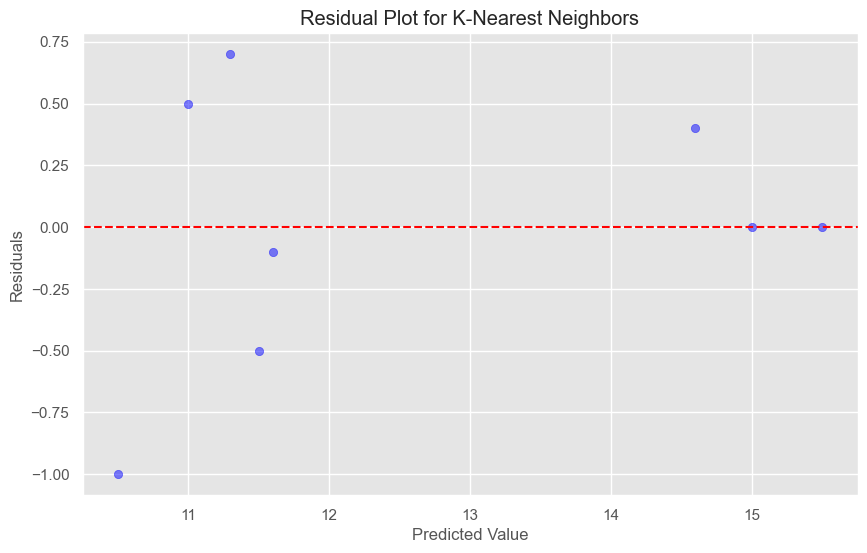

Robustness Check for K-Nearest Neighbors:
Random State 0:
Mean Absolute Error:  0.5499999999999999
Mean Squared Error:  0.5966666666666668
Root Mean Squared Error:  0.7724420150837645
R² on Test data:  0.9193239436619718

Random State 1:
Mean Absolute Error:  0.9333333333333335
Mean Squared Error:  1.9766666666666672
Root Mean Squared Error:  1.4059397805975429
R² on Test data:  0.8051411945918192

Random State 2:
Mean Absolute Error:  0.7999999999999998
Mean Squared Error:  1.0849999999999995
Root Mean Squared Error:  1.0416333327999827
R² on Test data:  0.8253813914501258

Random State 3:
Mean Absolute Error:  1.6416666666666668
Mean Squared Error:  10.4125
Root Mean Squared Error:  3.2268405600525103
R² on Test data:  0.48456514266070816

Random State 4:
Mean Absolute Error:  1.2166666666666666
Mean Squared Error:  7.2700000000000005
Root Mean Squared Error:  2.6962937525425525
R² on Test data:  0.5780411124546554

Cross-Validation MSE for K-Nearest Neighbors: 3.124607142857143
Trai

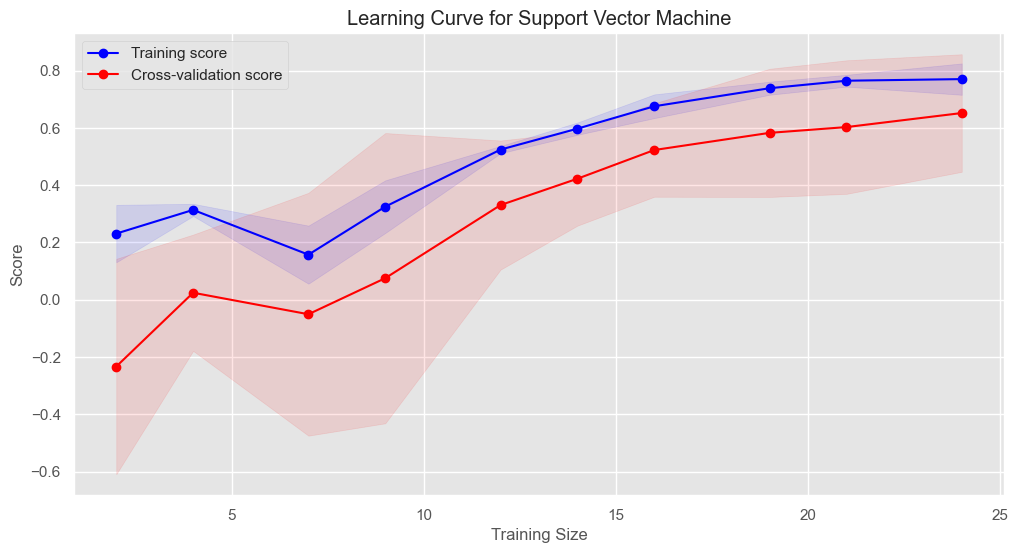

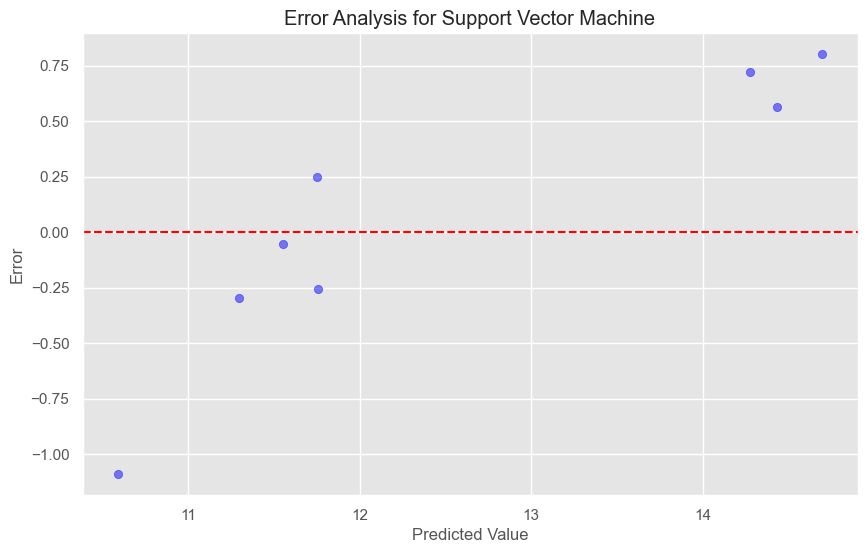

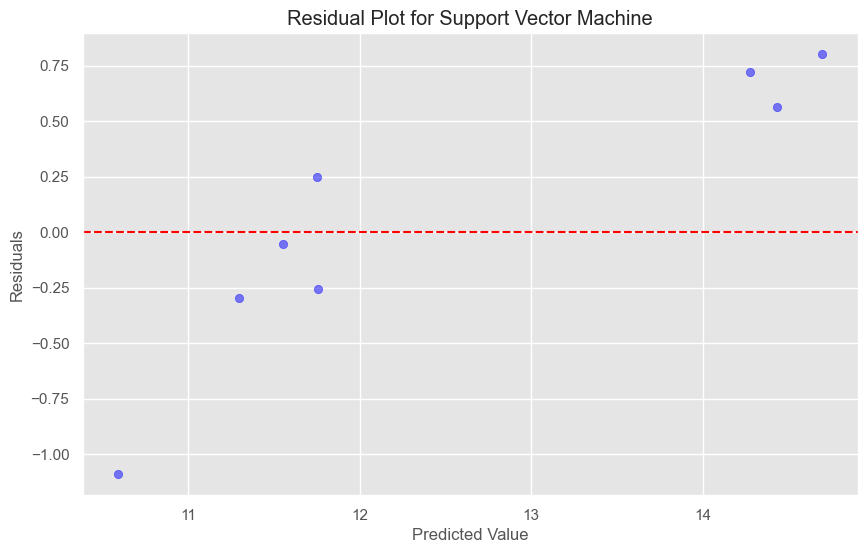

Robustness Check for Support Vector Machine:
Random State 0:
Mean Absolute Error:  0.8030471526752766
Mean Squared Error:  0.9222097552662647
Root Mean Squared Error:  0.9603175283552127
R² on Test data:  0.875306849992167

Random State 1:
Mean Absolute Error:  1.062060442922571
Mean Squared Error:  2.3635930146268334
Root Mean Squared Error:  1.5373981314632958
R² on Test data:  0.7669981898981592

Random State 2:
Mean Absolute Error:  0.9077271777938498
Mean Squared Error:  1.6275300132306294
Root Mean Squared Error:  1.2757468452755936
R² on Test data:  0.7380672568815752

Random State 3:
Mean Absolute Error:  2.0538037508363303
Mean Squared Error:  11.006366161055766
Root Mean Squared Error:  3.3175843864257266
R² on Test data:  0.45516784902302165

Random State 4:
Mean Absolute Error:  1.513803357657763
Mean Squared Error:  8.470739197717627
Root Mean Squared Error:  2.9104534350711795
R² on Test data:  0.5083488736512138

Cross-Validation MSE for Support Vector Machine: 3.5482240

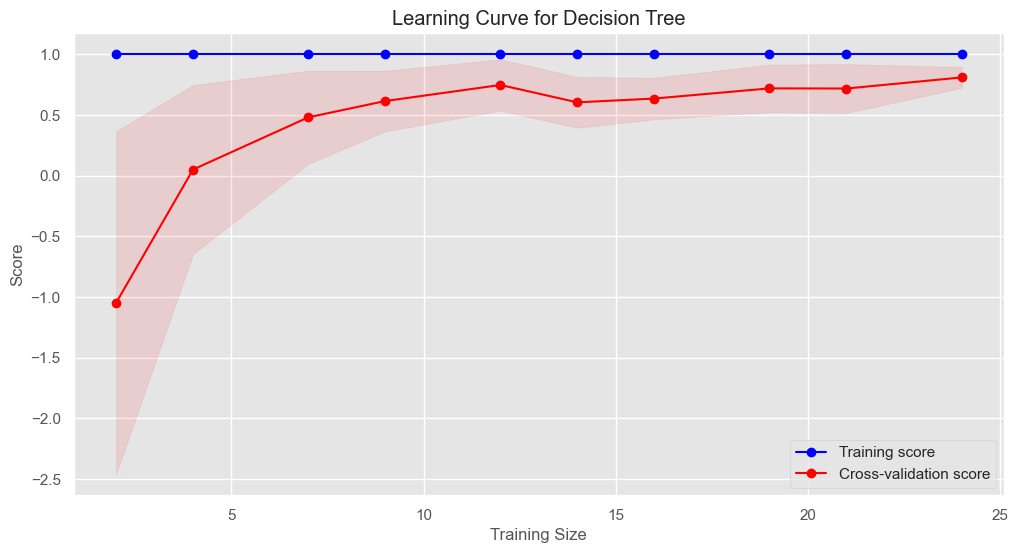

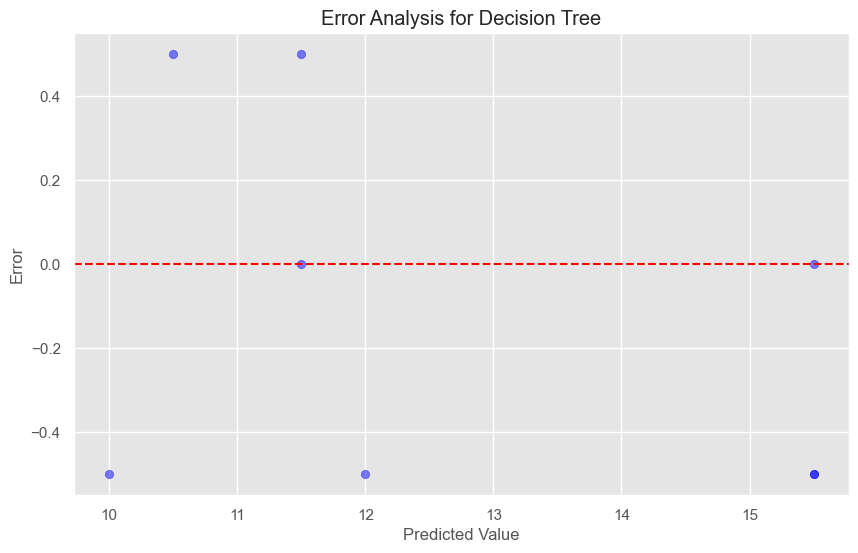

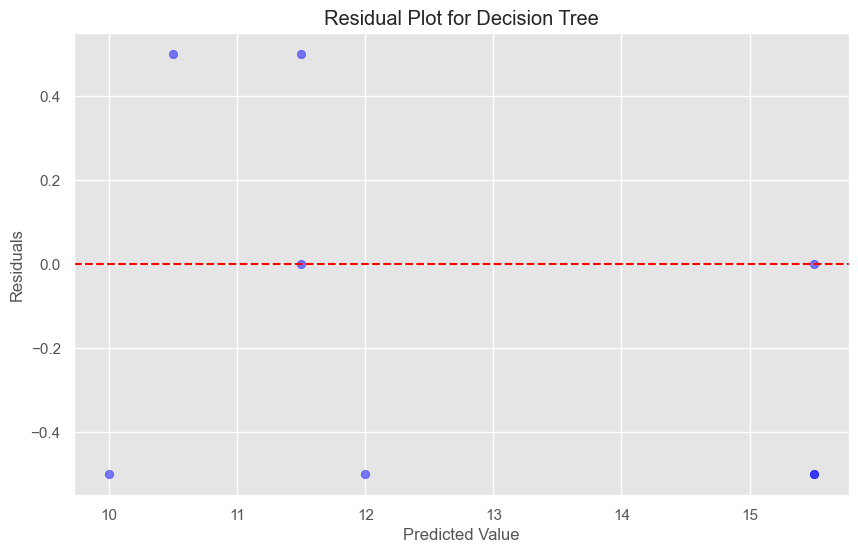

Robustness Check for Decision Tree:
Random State 0:
Mean Absolute Error:  0.625
Mean Squared Error:  0.6458333333333334
Root Mean Squared Error:  0.8036375634160796
R² on Test data:  0.9126760563380282

Random State 1:
Mean Absolute Error:  1.5
Mean Squared Error:  3.7083333333333335
Root Mean Squared Error:  1.925703334715224
R² on Test data:  0.6344343659079239

Random State 2:
Mean Absolute Error:  0.9166666666666666
Mean Squared Error:  1.4583333333333333
Root Mean Squared Error:  1.20761472884912
R² on Test data:  0.7652975691533948

Random State 3:
Mean Absolute Error:  1.5833333333333333
Mean Squared Error:  8.583333333333334
Root Mean Squared Error:  2.9297326385411577
R² on Test data:  0.57511172224132

Random State 4:
Mean Absolute Error:  1.2916666666666667
Mean Squared Error:  4.104166666666667
Root Mean Squared Error:  2.025874296857203
R² on Test data:  0.7617896009673519

Cross-Validation MSE for Decision Tree: 1.7857142857142858
Training ElasticNet...


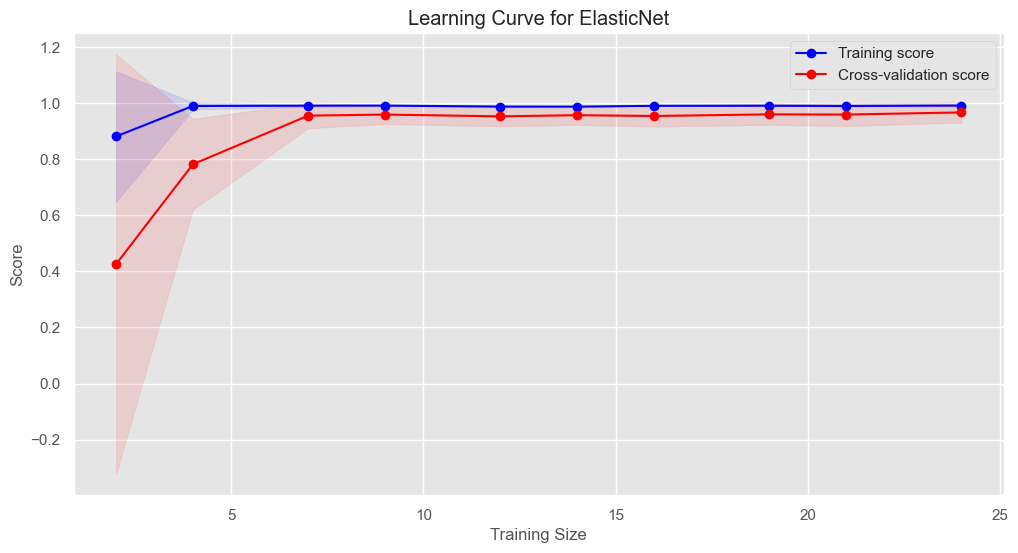

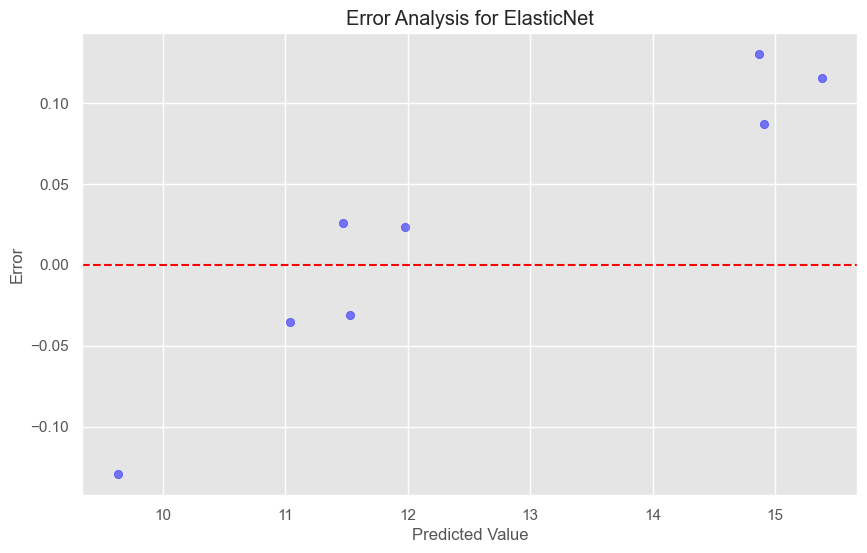

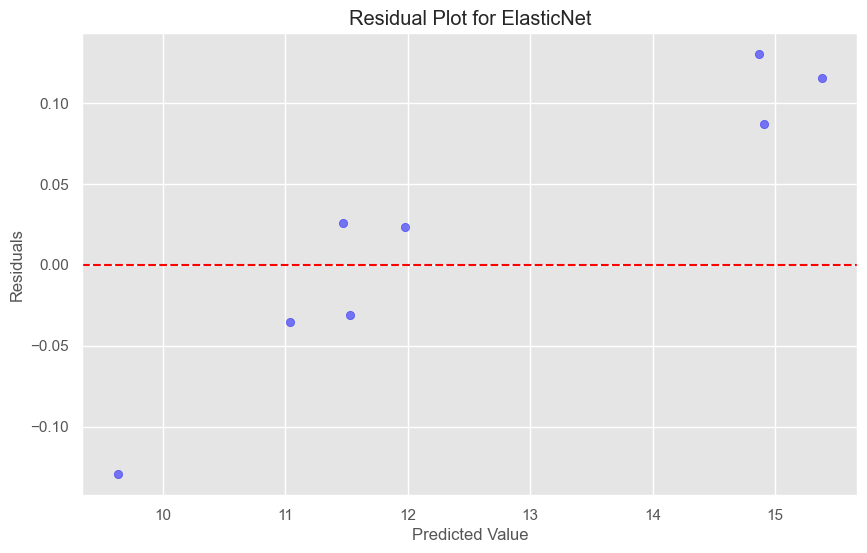

Robustness Check for ElasticNet:
Random State 0:
Mean Absolute Error:  0.10617349644151612
Mean Squared Error:  0.018950038016569932
Root Mean Squared Error:  0.13765913706169283
R² on Test data:  0.9974377413386046

Random State 1:
Mean Absolute Error:  0.1029717879890119
Mean Squared Error:  0.017729986870040678
Root Mean Squared Error:  0.13315399682337994
R² on Test data:  0.9982521868154812

Random State 2:
Mean Absolute Error:  0.12437953710781373
Mean Squared Error:  0.02269087027216449
Root Mean Squared Error:  0.15063489062021618
R² on Test data:  0.9963481583468101

Random State 3:
Mean Absolute Error:  0.6883406191290975
Mean Squared Error:  1.7445467244222777
Root Mean Squared Error:  1.3208129028830229
R² on Test data:  0.9136422384610492

Random State 4:
Mean Absolute Error:  0.7493865027689449
Mean Squared Error:  1.8668132851785417
Root Mean Squared Error:  1.3663137579555225
R² on Test data:  0.8916480801831076

Cross-Validation MSE for ElasticNet: 0.5064280622092332
T

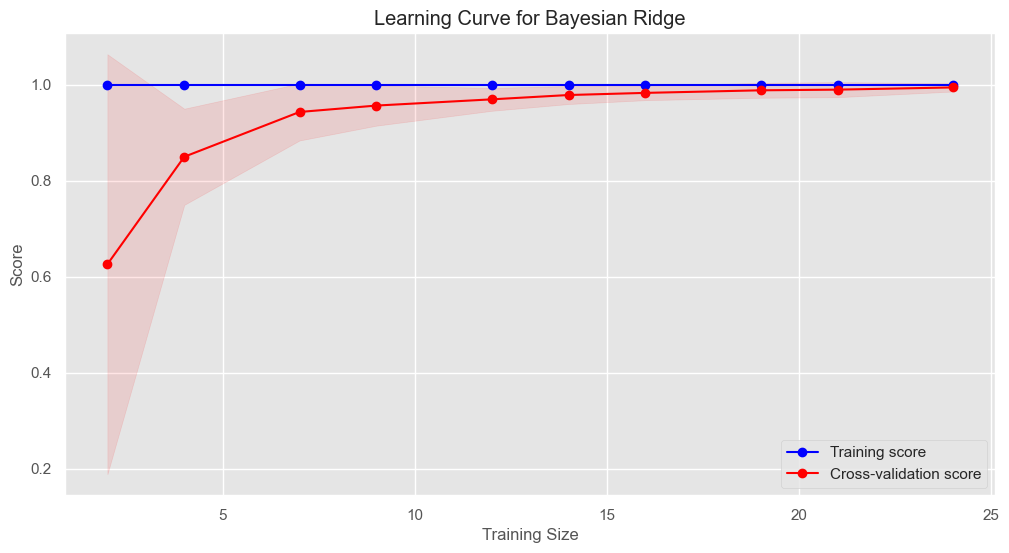

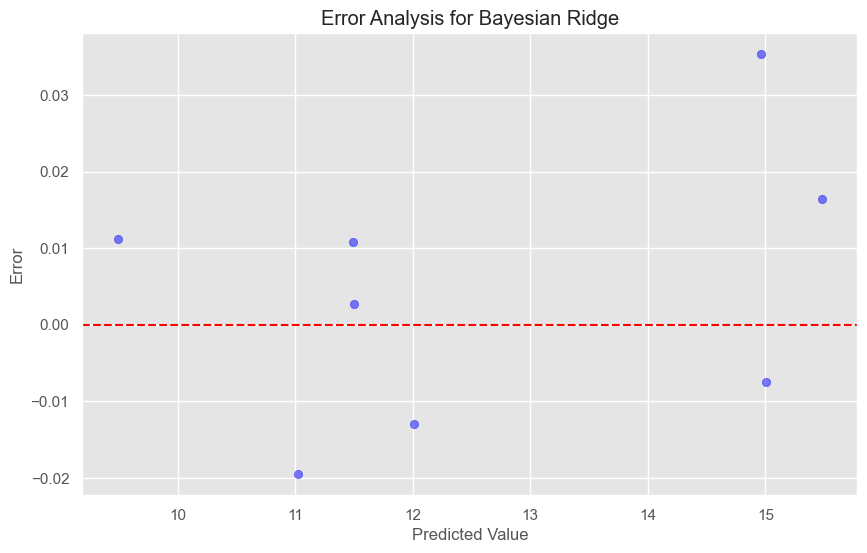

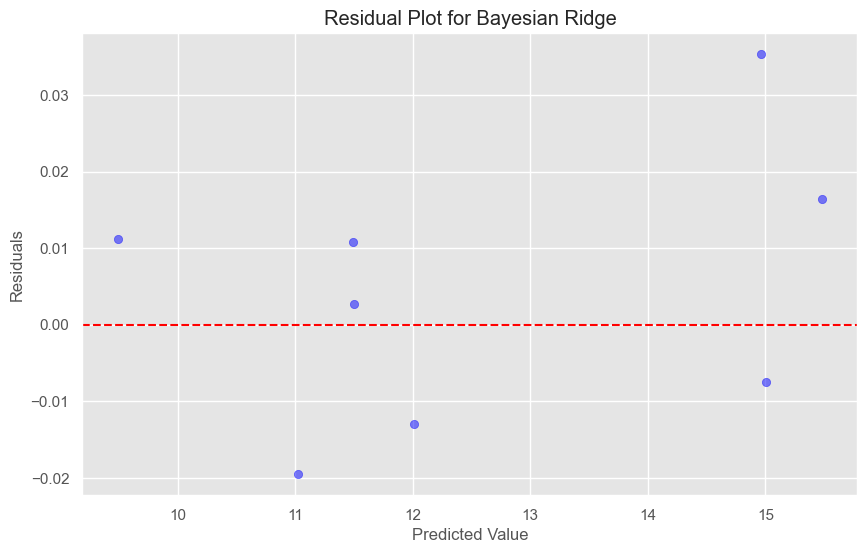

Robustness Check for Bayesian Ridge:
Random State 0:
Mean Absolute Error:  0.025669264649380647
Mean Squared Error:  0.0012430003782676615
Root Mean Squared Error:  0.03525621049216239
R² on Test data:  0.9998319323432201

Random State 1:
Mean Absolute Error:  0.035488104991876344
Mean Squared Error:  0.001828847562316067
Root Mean Squared Error:  0.04276502732743272
R² on Test data:  0.9998197131275212

Random State 2:
Mean Absolute Error:  0.028330585064314
Mean Squared Error:  0.001236988067324463
Root Mean Squared Error:  0.035170841151790255
R² on Test data:  0.9998009206128028

Random State 3:
Mean Absolute Error:  0.2529857850939337
Mean Squared Error:  0.2596313782242489
Root Mean Squared Error:  0.5095403597599006
R² on Test data:  0.9871478451480605

Random State 4:
Mean Absolute Error:  0.1381286136730451
Mean Squared Error:  0.07038783588255332
Root Mean Squared Error:  0.26530705961687734
R² on Test data:  0.9959146117021009

Cross-Validation MSE for Bayesian Ridge: 0.0037

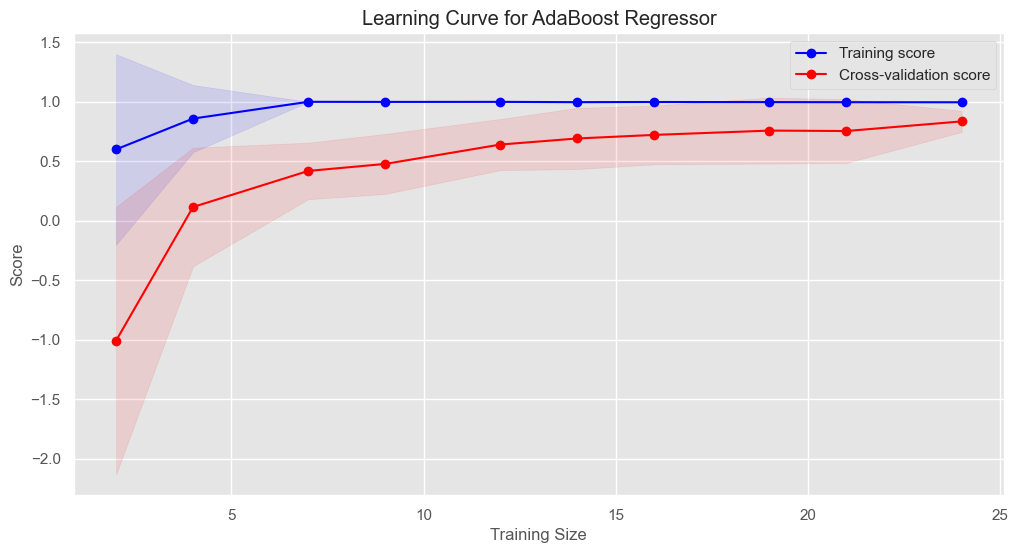

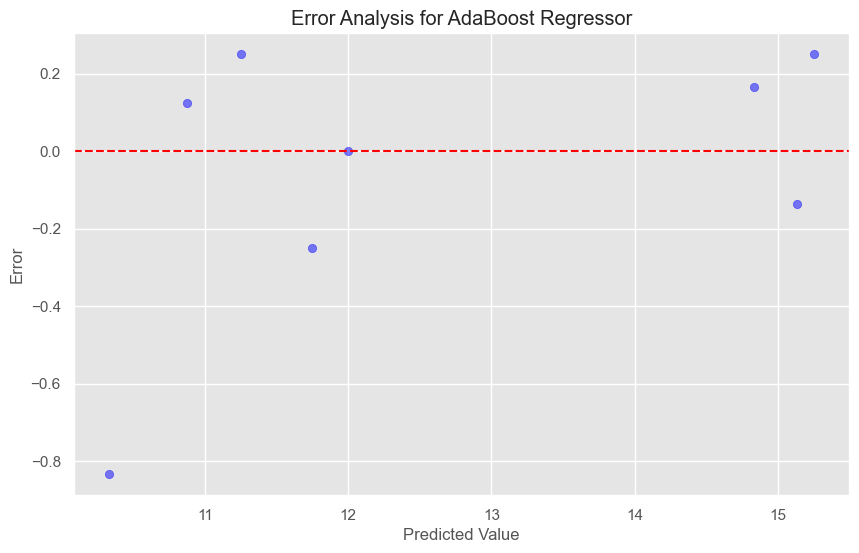

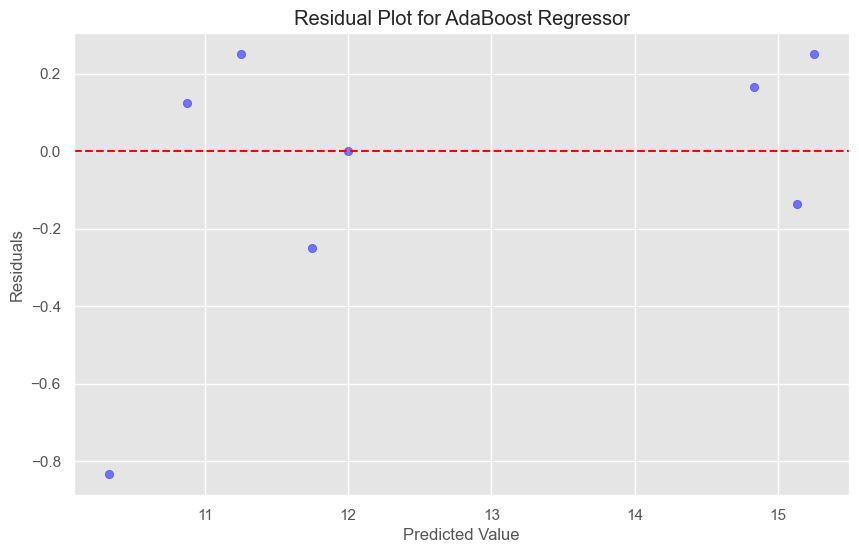

Robustness Check for AdaBoost Regressor:
Random State 0:
Mean Absolute Error:  0.426851851851852
Mean Squared Error:  0.4591923868312758
Root Mean Squared Error:  0.6776373564313554
R² on Test data:  0.9379120153016867

Random State 1:
Mean Absolute Error:  1.0535714285714286
Mean Squared Error:  2.200388321995465
Root Mean Squared Error:  1.4833705949611733
R² on Test data:  0.7830868263786774

Random State 2:
Mean Absolute Error:  0.6854828042328042
Mean Squared Error:  0.7402599967456117
Root Mean Squared Error:  0.8603836334714949
R² on Test data:  0.8808634372379234

Random State 3:
Mean Absolute Error:  1.636810064935065
Mean Squared Error:  9.836637957194469
Root Mean Squared Error:  3.136341492438996
R² on Test data:  0.5130712045940173

Random State 4:
Mean Absolute Error:  0.9867063492063491
Mean Squared Error:  3.447411659108088
Root Mean Squared Error:  1.8567206734207728
R² on Test data:  0.7999083922162173

Cross-Validation MSE for AdaBoost Regressor: 2.4225772791543703
T

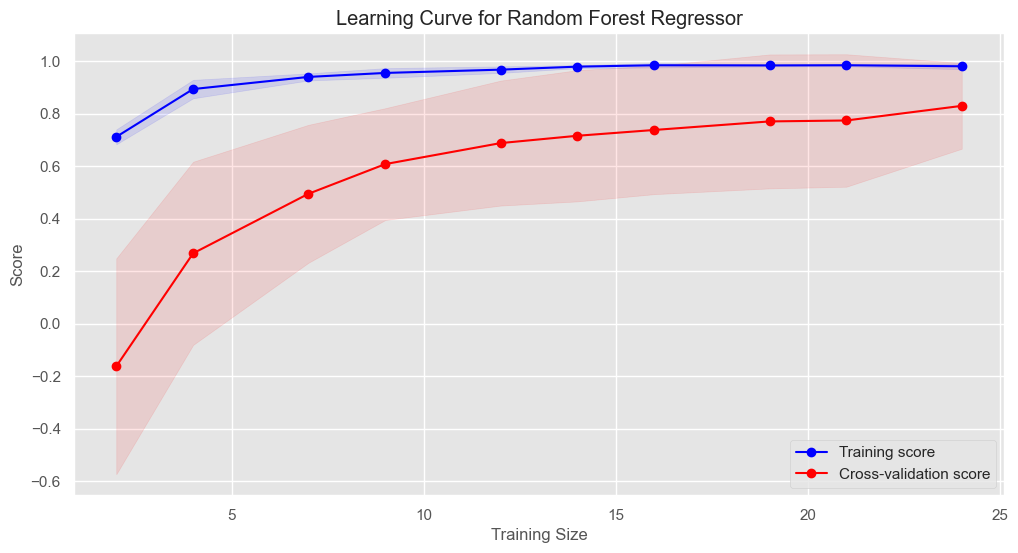

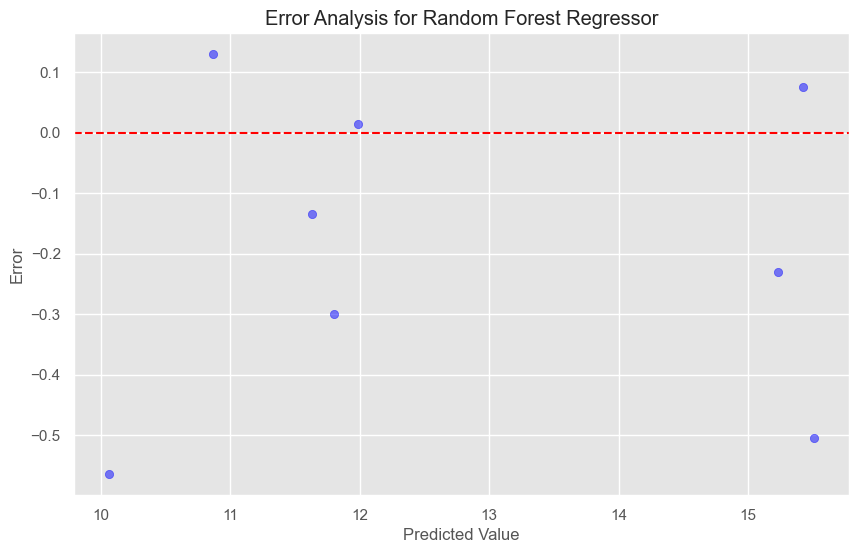

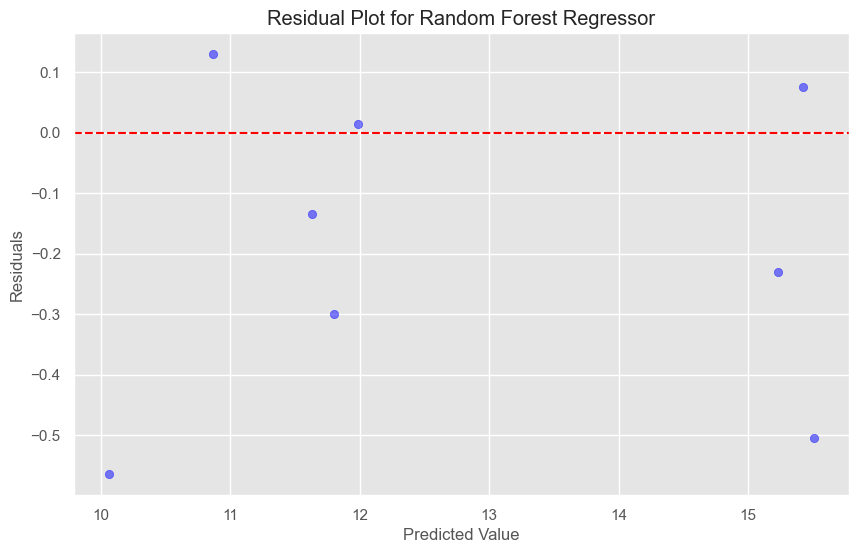

Robustness Check for Random Forest Regressor:
Random State 0:
Mean Absolute Error:  0.4179166666666667
Mean Squared Error:  0.2626354166666666
Root Mean Squared Error:  0.512479674393694
R² on Test data:  0.9644887323943662

Random State 1:
Mean Absolute Error:  0.800416666666667
Mean Squared Error:  1.462543750000001
Root Mean Squared Error:  1.2093567505083027
R² on Test data:  0.8558231730275543

Random State 2:
Mean Absolute Error:  0.5779166666666669
Mean Squared Error:  0.7723812500000005
Root Mean Squared Error:  0.8788522344512759
R² on Test data:  0.8756938809723386

Random State 3:
Mean Absolute Error:  1.5062499999999996
Mean Squared Error:  9.563889583333332
Root Mean Squared Error:  3.092553893359553
R² on Test data:  0.5265726710209695

Random State 4:
Mean Absolute Error:  1.0108333333333335
Mean Squared Error:  5.131200000000001
Root Mean Squared Error:  2.265215221562843
R² on Test data:  0.7021794437726723

Cross-Validation MSE for Random Forest Regressor: 2.124445178

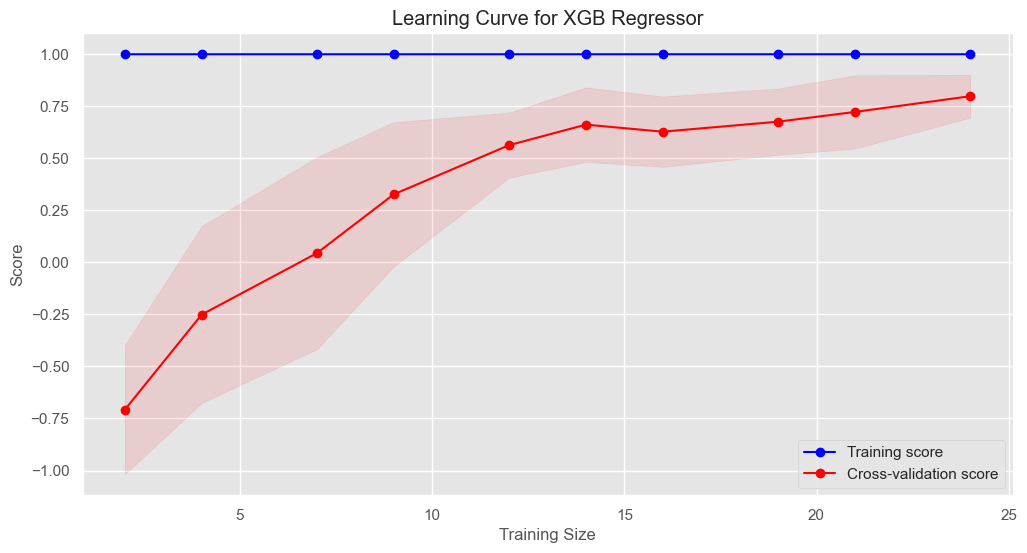

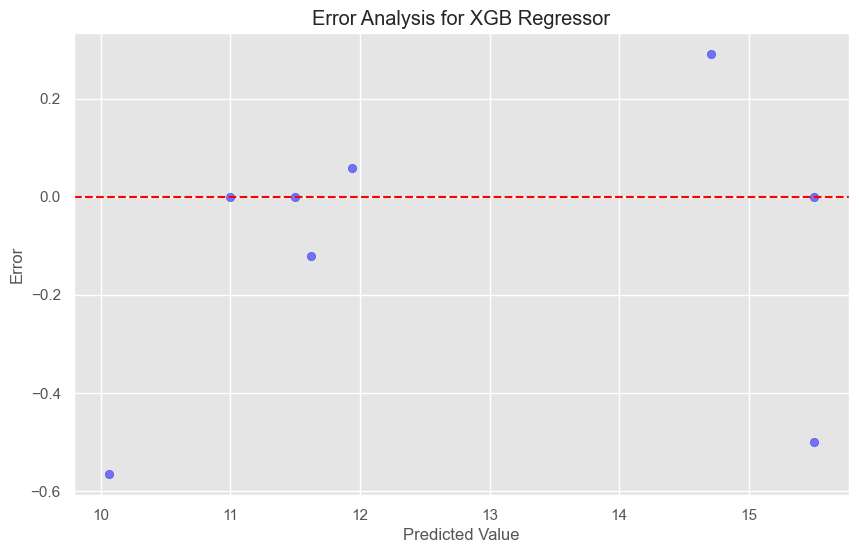

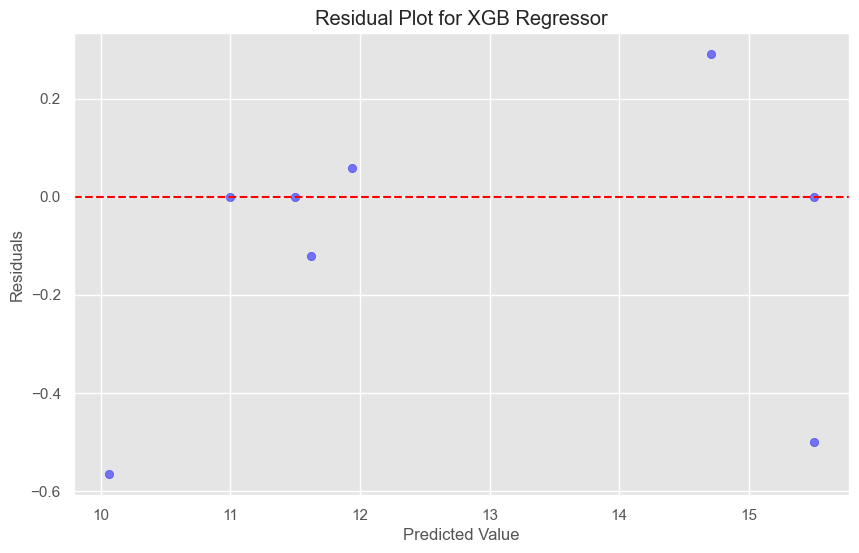

Robustness Check for XGB Regressor:
Random State 0:
Mean Absolute Error:  0.6765883763631185
Mean Squared Error:  1.0356395432894108
Root Mean Squared Error:  1.017663767306968
R² on Test data:  0.8599698645693191

Random State 1:
Mean Absolute Error:  1.6362357536951702
Mean Squared Error:  4.028949266276432
Root Mean Squared Error:  2.0072242690532693
R² on Test data:  0.6028282085614881

Random State 2:
Mean Absolute Error:  0.6769970258076986
Mean Squared Error:  0.8755700074455793
Root Mean Squared Error:  0.9357189788849959
R² on Test data:  0.8590868051722119

Random State 3:
Mean Absolute Error:  1.468701442082723
Mean Squared Error:  8.603958758059207
Root Mean Squared Error:  2.933250544713016
R² on Test data:  0.5740907318114383

Random State 4:
Mean Absolute Error:  0.9379409154256185
Mean Squared Error:  3.628711438107075
Root Mean Squared Error:  1.9049176985127403
R² on Test data:  0.789385551355333

Cross-Validation MSE for XGB Regressor: 2.7014820352110998
Training Rid

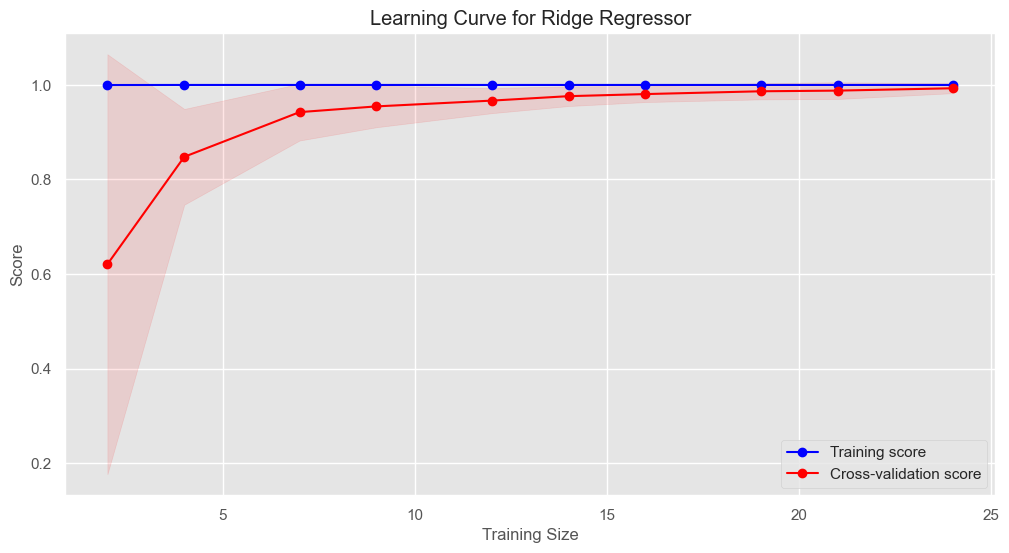

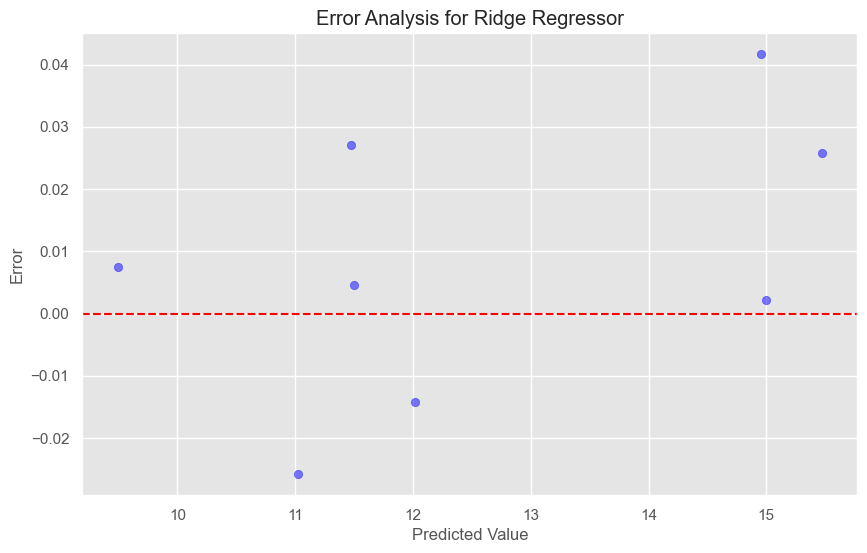

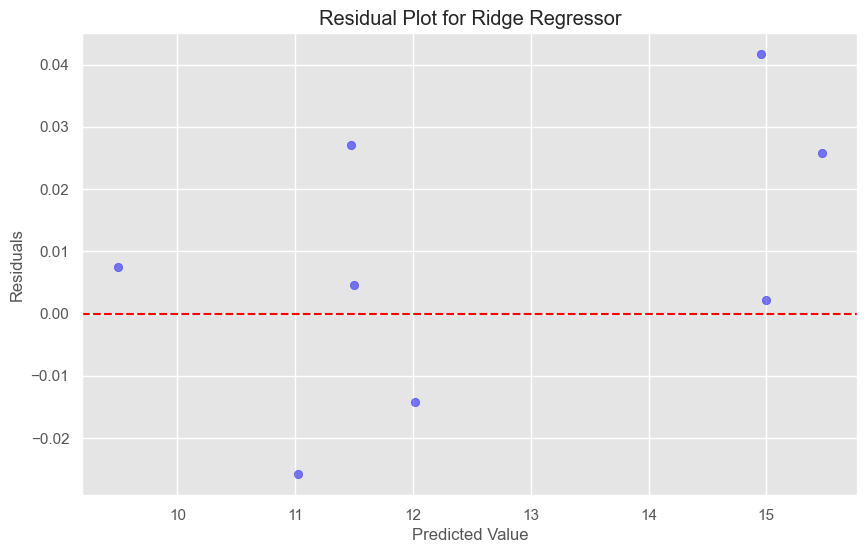

Robustness Check for Ridge Regressor:
Random State 0:
Mean Absolute Error:  0.02974588097495608
Mean Squared Error:  0.0018682334057724223
Root Mean Squared Error:  0.04322306566837228
R² on Test data:  0.9997473937930224

Random State 1:
Mean Absolute Error:  0.043448390417073636
Mean Squared Error:  0.003382167016680039
Root Mean Squared Error:  0.05815640133880396
R² on Test data:  0.9996665876772878

Random State 2:
Mean Absolute Error:  0.03809718684604343
Mean Squared Error:  0.00210118037019137
Root Mean Squared Error:  0.04583863403496411
R² on Test data:  0.9996618385322072

Random State 3:
Mean Absolute Error:  0.3175433485812765
Mean Squared Error:  0.3897305183414863
Root Mean Squared Error:  0.6242840045536057
R² on Test data:  0.9807077364588608

Random State 4:
Mean Absolute Error:  0.22251968663495972
Mean Squared Error:  0.2350976712051197
Root Mean Squared Error:  0.4848687154324557
R² on Test data:  0.9863546696277561

Cross-Validation MSE for Ridge Regressor: 0.0315

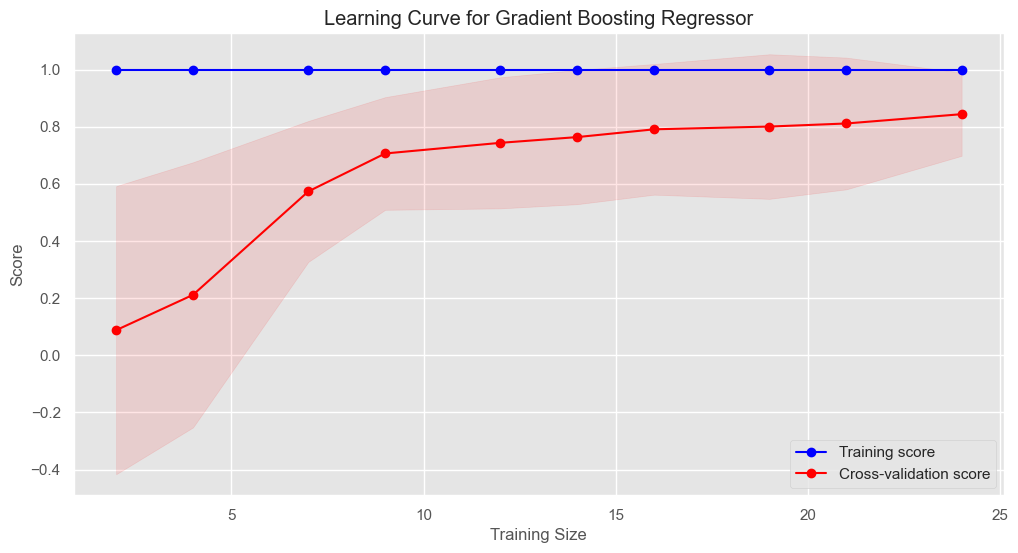

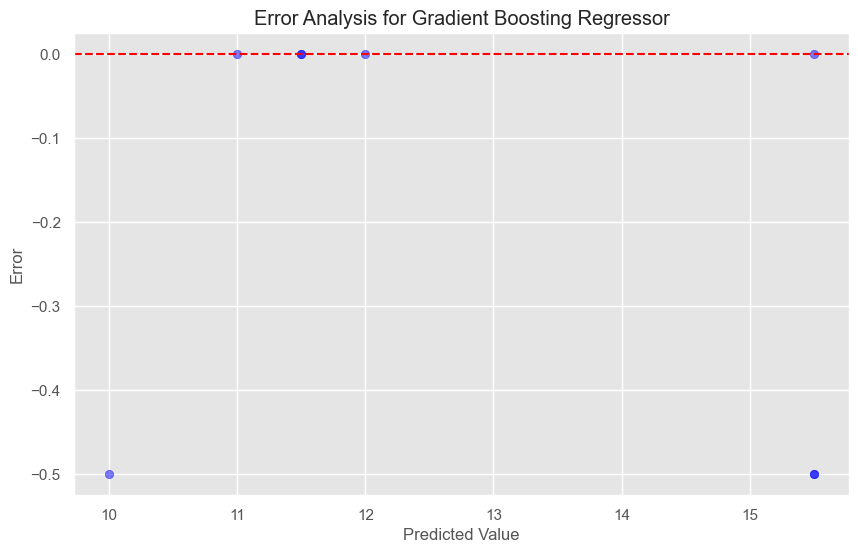

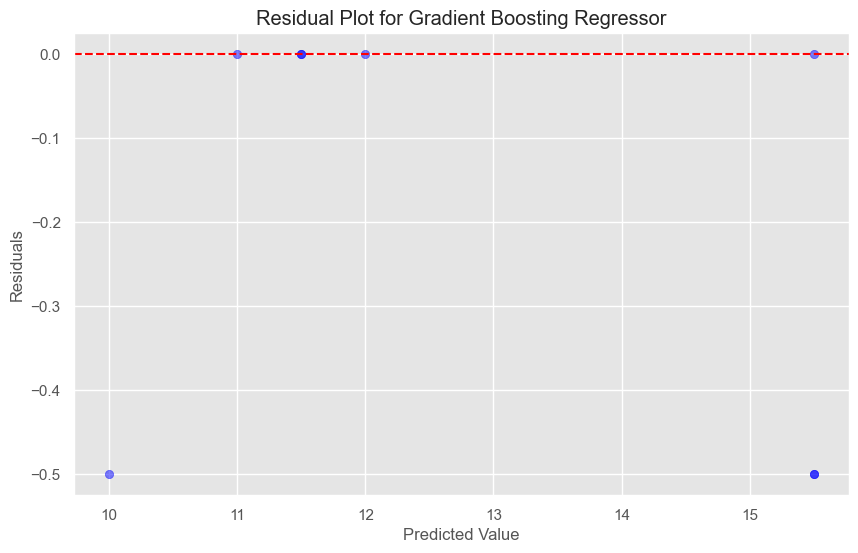

Robustness Check for Gradient Boosting Regressor:
Random State 0:
Mean Absolute Error:  0.3548620714922864
Mean Squared Error:  0.27090096866123486
Root Mean Squared Error:  0.5204814777311819
R² on Test data:  0.9633711366317204

Random State 1:
Mean Absolute Error:  0.7591599954581875
Mean Squared Error:  1.2294159339132917
Root Mean Squared Error:  1.1087903020469163
R² on Test data:  0.878804795835349

Random State 2:
Mean Absolute Error:  0.37736017903447694
Mean Squared Error:  0.3663658944471731
Root Mean Squared Error:  0.6052816653816412
R² on Test data:  0.9410375090244282

Random State 3:
Mean Absolute Error:  1.345688523236465
Mean Squared Error:  8.563314157646433
Root Mean Squared Error:  2.9263140907370886
R² on Test data:  0.5761027024059517

Random State 4:
Mean Absolute Error:  1.0139825909514266
Mean Squared Error:  5.594567498313691
Root Mean Squared Error:  2.365283809252854
R² on Test data:  0.6752850786952149

Cross-Validation MSE for Gradient Boosting Regressor:

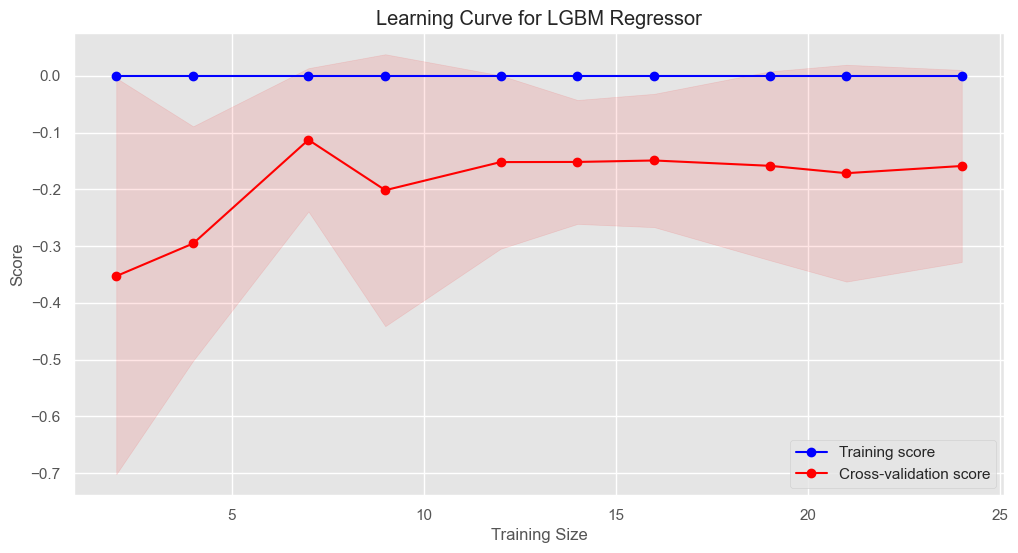

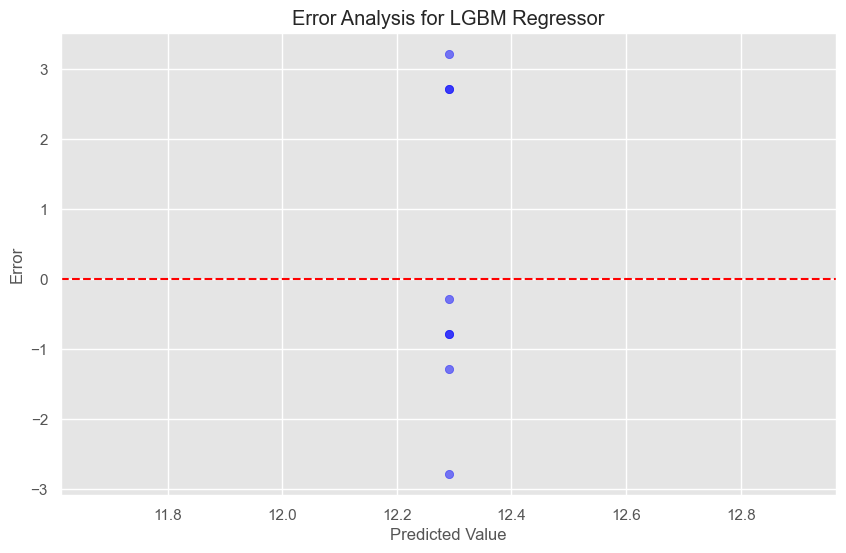

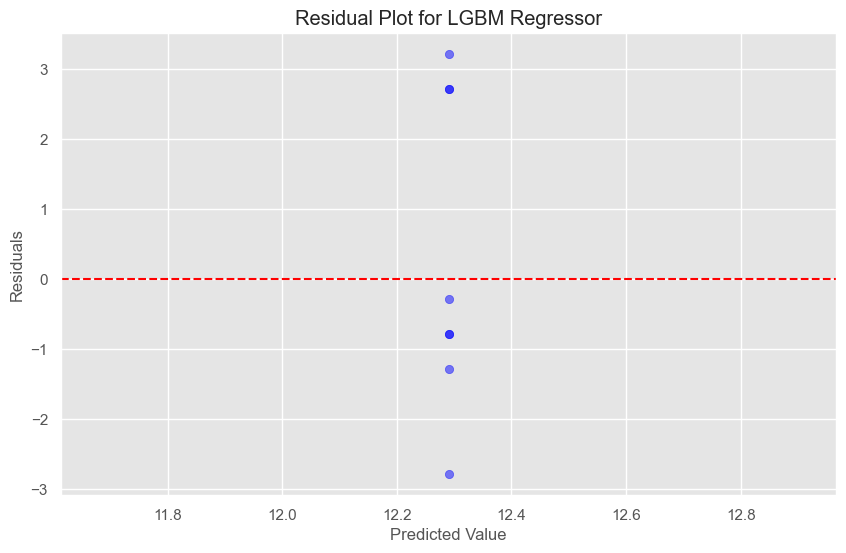

Robustness Check for LGBM Regressor:
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 27, number of used features: 0
[LightGBM] [Info] Start training from score 12.185185
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there

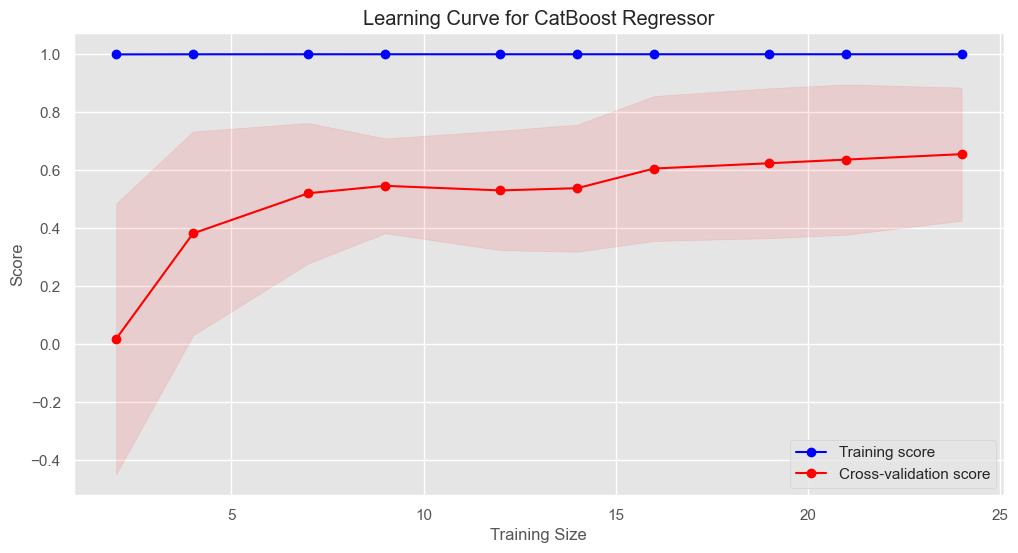

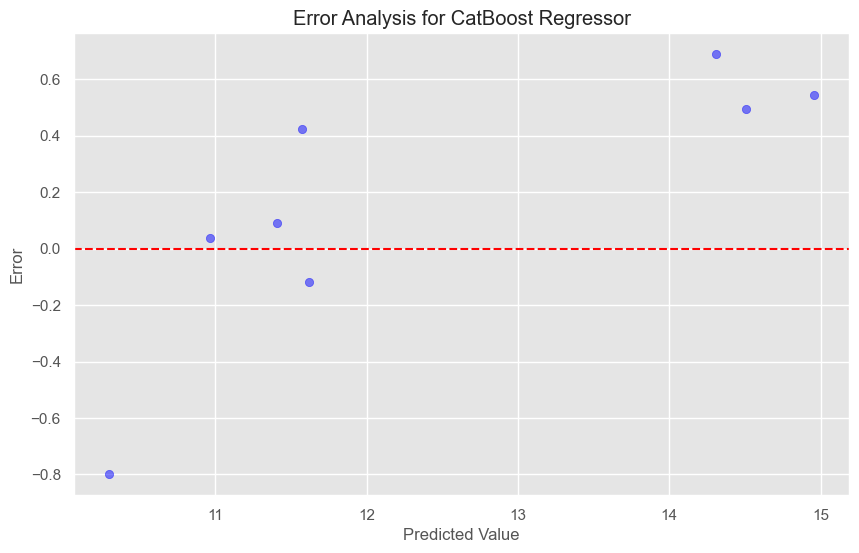

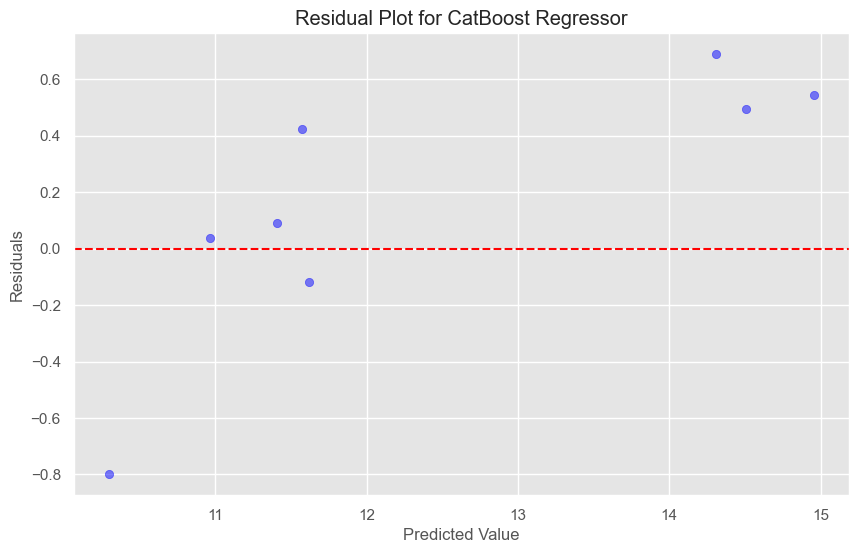

Robustness Check for CatBoost Regressor:
Learning rate set to 0.023138
0:	learn: 3.6589347	total: 4.24ms	remaining: 4.24s
1:	learn: 3.6317932	total: 6.47ms	remaining: 3.23s
2:	learn: 3.5999304	total: 9.5ms	remaining: 3.16s
3:	learn: 3.5752539	total: 13.2ms	remaining: 3.28s
4:	learn: 3.5451102	total: 15.6ms	remaining: 3.11s
5:	learn: 3.5133790	total: 18.3ms	remaining: 3.03s
6:	learn: 3.4801294	total: 21.3ms	remaining: 3.02s
7:	learn: 3.4477298	total: 23.8ms	remaining: 2.95s
8:	learn: 3.4215454	total: 25.4ms	remaining: 2.8s
9:	learn: 3.4052446	total: 27.8ms	remaining: 2.75s
10:	learn: 3.3811184	total: 30.1ms	remaining: 2.7s
11:	learn: 3.3558340	total: 32.3ms	remaining: 2.66s
12:	learn: 3.3286731	total: 33.7ms	remaining: 2.56s
13:	learn: 3.3071967	total: 35.9ms	remaining: 2.53s
14:	learn: 3.2839191	total: 37.8ms	remaining: 2.48s
15:	learn: 3.2624187	total: 39.6ms	remaining: 2.44s
16:	learn: 3.2358124	total: 40.7ms	remaining: 2.35s
17:	learn: 3.2160446	total: 43.2ms	remaining: 2.36s
18:	le

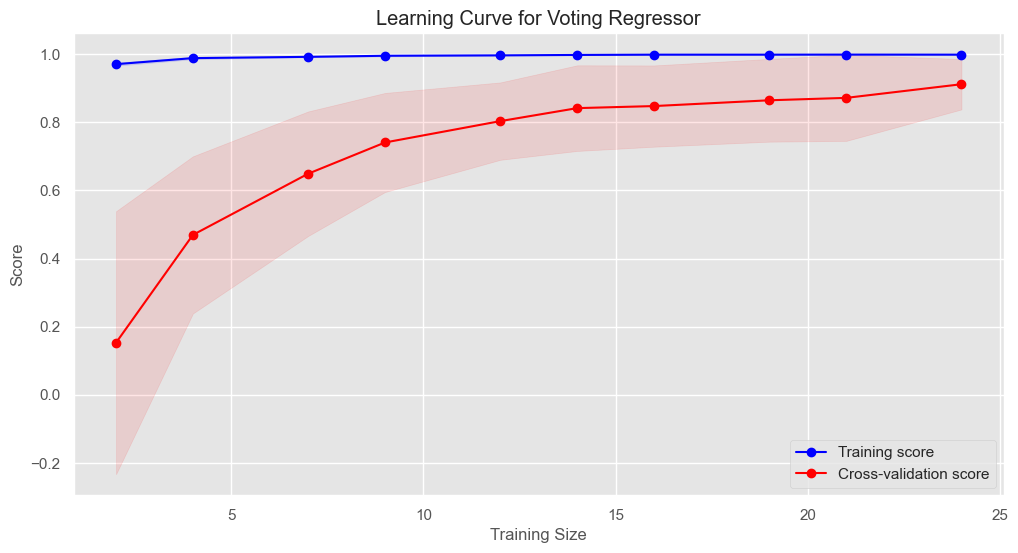

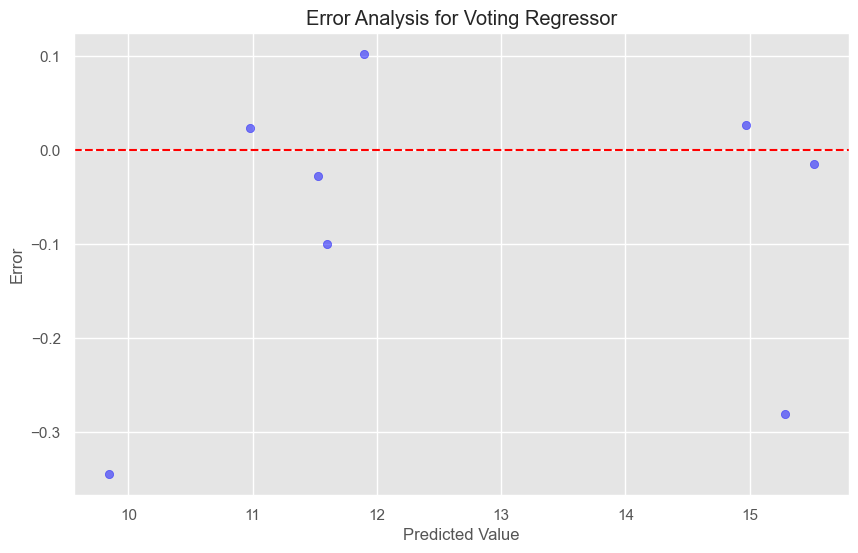

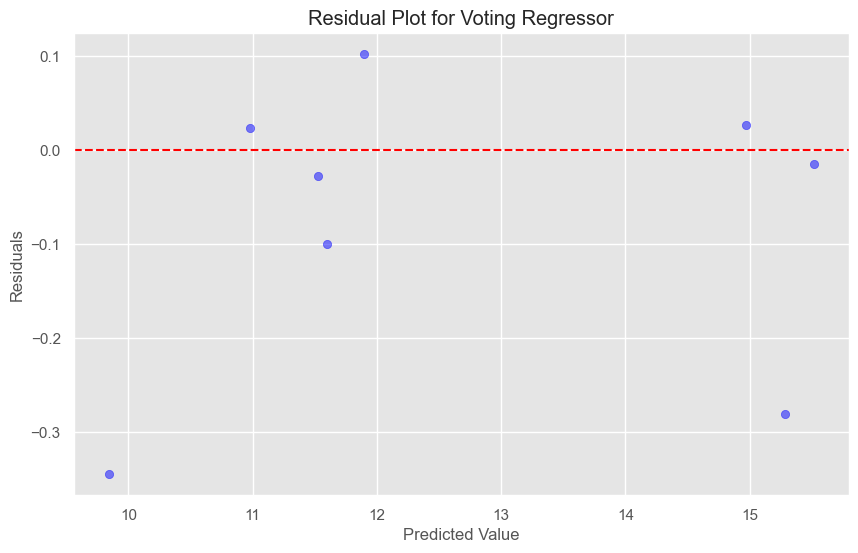

Robustness Check for Voting Regressor:
Random State 0:
Mean Absolute Error:  0.28991434885622147
Mean Squared Error:  0.1241208899560482
Root Mean Squared Error:  0.3523079476197609
R² on Test data:  0.9832174571327034

Random State 1:
Mean Absolute Error:  0.7474125405736475
Mean Squared Error:  0.9751879372845994
Root Mean Squared Error:  0.9875160440643986
R² on Test data:  0.9038664638240751

Random State 2:
Mean Absolute Error:  0.36140366943545815
Mean Squared Error:  0.3200090110787652
Root Mean Squared Error:  0.5656933896367936
R² on Test data:  0.9484981306562256

Random State 3:
Mean Absolute Error:  1.0591504731217996
Mean Squared Error:  4.727185264658545
Root Mean Squared Error:  2.1742091124495238
R² on Test data:  0.7659970168061772

Random State 4:
Mean Absolute Error:  0.5875814428938532
Mean Squared Error:  2.11617200911402
Root Mean Squared Error:  1.454706846451896
R² on Test data:  0.8771750224456192

Cross-Validation MSE for Voting Regressor: 0.8321543015232109
T

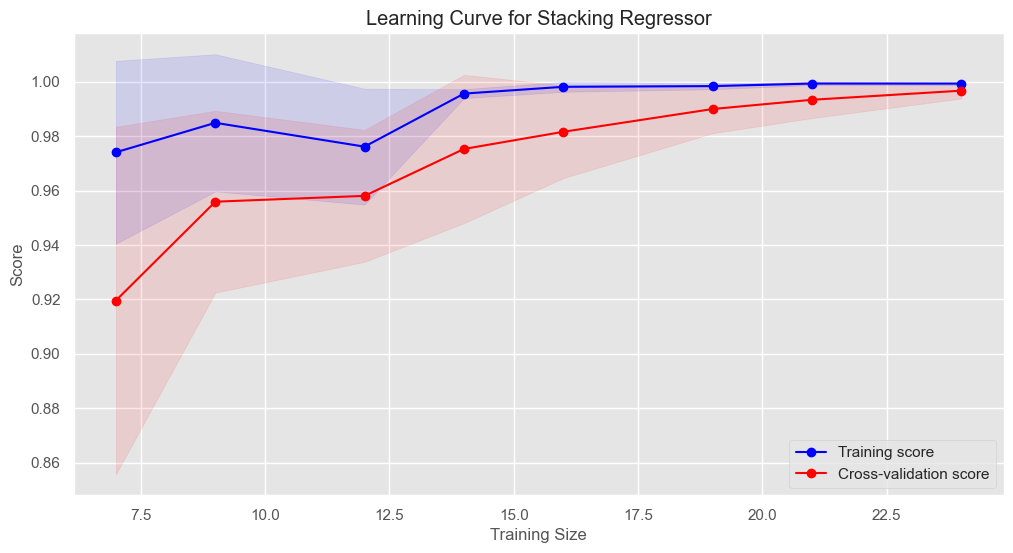

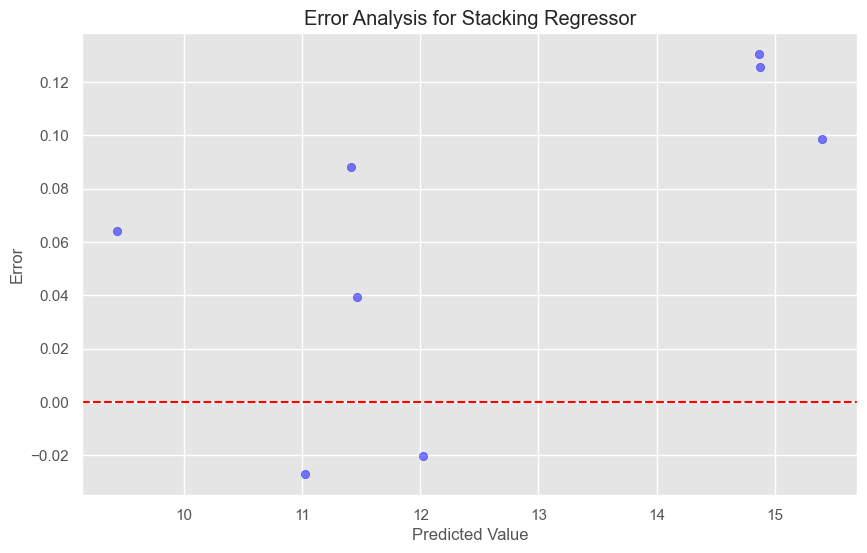

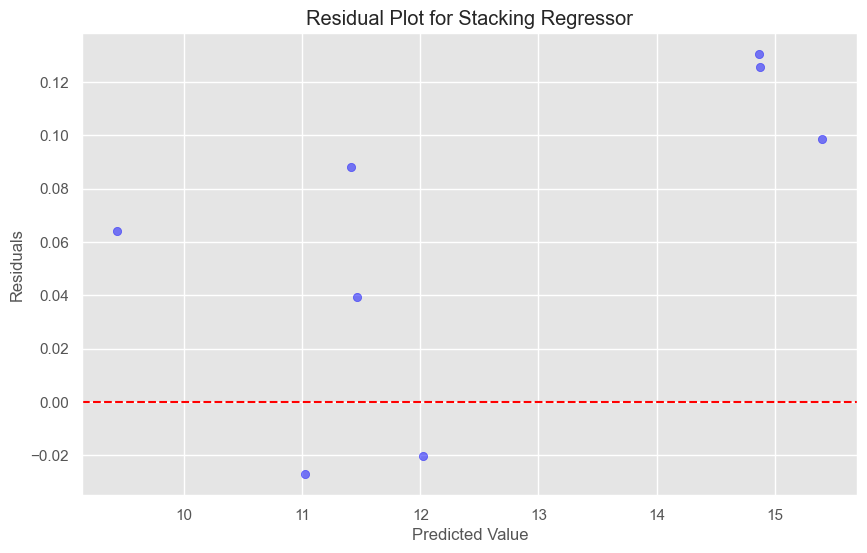

Robustness Check for Stacking Regressor:
Random State 0:
Mean Absolute Error:  0.08449881257209468
Mean Squared Error:  0.012017299308750127
Root Mean Squared Error:  0.10962344324436323
R² on Test data:  0.9983751257272676

Random State 1:
Mean Absolute Error:  0.12690987253873934
Mean Squared Error:  0.030246141806099094
Root Mean Squared Error:  0.17391417942795548
R² on Test data:  0.9970183505595904

Random State 2:
Mean Absolute Error:  0.16877640022149606
Mean Squared Error:  0.04526184678690461
Root Mean Squared Error:  0.21274831794142254
R² on Test data:  0.9927156122522333

Random State 3:
Mean Absolute Error:  0.19567710018772533
Mean Squared Error:  0.09382994947978056
Root Mean Squared Error:  0.30631674697897365
R² on Test data:  0.9953552723530119

Random State 4:
Mean Absolute Error:  0.10815807701926405
Mean Squared Error:  0.03921588702559686
Root Mean Squared Error:  0.19803001546633495
R² on Test data:  0.9977238662911383

Cross-Validation MSE for Stacking Regresso

In [116]:
from lightgbm import LGBMRegressor

models = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Support Vector Machine': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'ElasticNet': ElasticNet(),
    'Bayesian Ridge': BayesianRidge(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGB Regressor': XGBRegressor(),
    'Ridge Regressor': Ridge(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'LGBM Regressor': LGBMRegressor(),
    'CatBoost Regressor': CatBoostRegressor(silent=True),
    'Voting Regressor': VotingRegressor(estimators=[
        ('lr', LinearRegression()),
        ('rf', RandomForestRegressor()),
        ('xgb', XGBRegressor())
    ]),
    'Stacking Regressor': StackingRegressor(
        estimators=[
            ('lr', LinearRegression()),
            ('rf', RandomForestRegressor()),
            ('xgb', XGBRegressor())
        ],
        final_estimator=LinearRegression()
    )
}

results = pd.DataFrame(columns=['Model', 'Train MAE', 'Train MSE', 'Train RMSE', 'Train R²', 'Test MAE', 'Test MSE', 'Test RMSE', 'Test R²'])

for model_name, model in models.items():
    print(f"Training {model_name}...")

    model.fit(X_train, y_train)

    y_test_prediction = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_test_prediction)
    mse = mean_squared_error(y_test, y_test_prediction)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_test_prediction)

    results = pd.concat([results, pd.DataFrame({
        'Model': [model_name],
        'Train MAE': [mean_absolute_error(y_train, model.predict(X_train))],
        'Train MSE': [mean_squared_error(y_train, model.predict(X_train))],
        'Train RMSE': [np.sqrt(mean_squared_error(y_train, model.predict(X_train)))],
        'Train R²': [r2_score(y_train, model.predict(X_train))],
        'Test MAE': [mae],
        'Test MSE': [mse],
        'Test RMSE': [rmse],
        'Test R²': [r2]
    })], ignore_index=True)

    plt.figure(figsize=(12, 6))
    train_sizes, train_scores, validation_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.title(f'Learning Curve for {model_name}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    errors_df = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_test_prediction,
        'Error': y_test - y_test_prediction
    })
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted Value')
    plt.ylabel('Error')
    plt.title(f'Error Analysis for {model_name}')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_prediction, y_test - y_test_prediction, alpha=0.5, color='blue')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted Value')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot for {model_name}')
    plt.grid(True)
    plt.show()

    print(f"Robustness Check for {model_name}:")
    for i in range(5):
        X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
        if model_name in ['Voting Regressor', 'Stacking Regressor']:
            model_sub = models[model_name]
        else:
            model_sub = model.__class__()  # Reinitialize model
        model_sub.fit(X_train_sub, y_train_sub)
        y_test_pred_sub = model_sub.predict(X_test_sub)
        print(f"Random State {i}:")
        print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
        print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
        print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
        print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
        print()

    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    print(f"Cross-Validation MSE for {model_name}: {-cv_scores.mean()}")

baseline_prediction = np.mean(y_train)  # Simple baseline
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)

print("Model Evaluation Results:")
print(results)


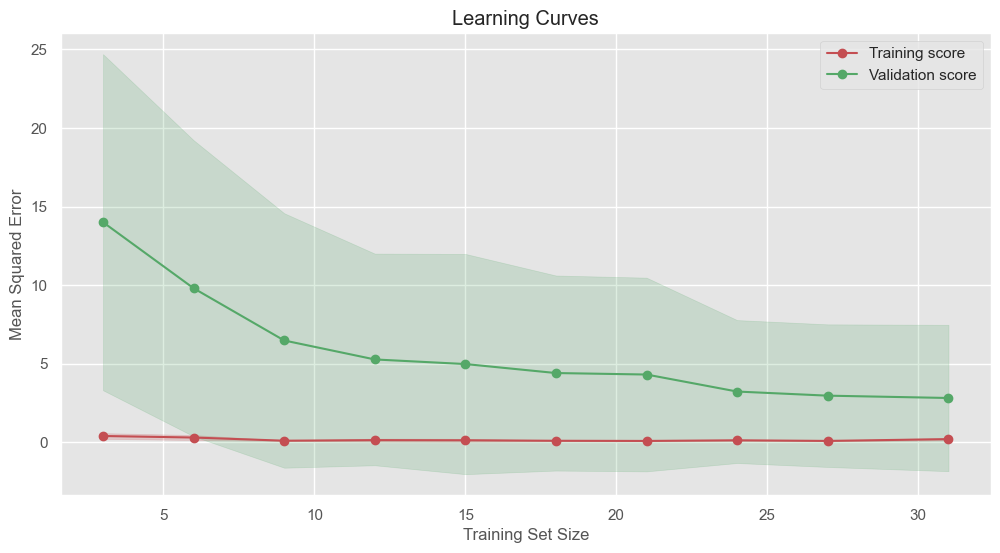

Learning and Validation Scores:
 Training Size  Training Score Mean  Training Score Std Dev  Validation Score Mean  Validation Score Std Dev
             3             0.361847                0.163462              13.386434                 10.176049
             6             0.271626                0.177011               9.613690                  9.652747
             9             0.098657                0.016017               6.379825                  7.758538
            12             0.118820                0.063818               5.377924                  6.924547
            15             0.109139                0.077014               4.931075                  6.613980
            18             0.108716                0.035201               4.545269                  6.370828
            21             0.084162                0.034155               4.254025                  6.029659
            24             0.127964                0.036993               3.172102              

In [117]:
def plot_learning_curves(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_mean_squared_error', cv=5
    )

    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    validation_mean = -np.mean(validation_scores, axis=1)
    validation_std = np.std(validation_scores, axis=1)

    plt.figure(figsize=(12, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, validation_mean, 'o-', color='g', label='Validation score')

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='r')
    plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.2, color='g')

    plt.title('Learning Curves')
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

def print_learning_curves_scores(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_mean_squared_error', cv=5
    )

    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    validation_mean = -np.mean(validation_scores, axis=1)
    validation_std = np.std(validation_scores, axis=1)

    scores_df = pd.DataFrame({
        'Training Size': train_sizes,
        'Training Score Mean': train_mean,
        'Training Score Std Dev': train_std,
        'Validation Score Mean': validation_mean,
        'Validation Score Std Dev': validation_std
    })

    print("Learning and Validation Scores:")
    print(scores_df.to_string(index=False))

#Example usage
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
plot_learning_curves(model, X, y)
print_learning_curves_scores(model, X, y)


# The model performance summary:

| Model                    | Train MAE       | Train MSE       | Train RMSE      | Train R²  | Test MAE  | Test MSE  | Test RMSE | Test R²   |
|--------------------------|------------------|------------------|------------------|-----------|-----------|-----------|-----------|------------|
| Linear Regression        | 1.535e-15        | 5.110e-30        | 2.261e-15        | 1.000000  | 0.0145    | 0.000296  | 0.0172    | 0.999932   |
| K-Nearest Neighbors      | 0.7258           | 2.049            | 1.4316           | 0.849948  | 0.4000    | 0.270000  | 0.5196    | 0.938065   |
| Support Vector Machine   | 0.9830           | 3.426            | 1.8511           | 0.749122  | 0.5049    | 0.361751  | 0.6015    | 0.917018   |
| Decision Tree            | 0.0000           | 0.000            | 0.0000           | 1.000000  | 0.3750    | 0.187500  | 0.4330    | 0.956989   |
| ElasticNet               | 0.1359           | 0.0495           | 0.2225           | 0.996375  | 0.0721    | 0.007240  | 0.0851    | 0.998339   |
| Bayesian Ridge           | 1.352e-06        | 3.491e-12        | 1.868e-06        | 1.000000  | 0.0145    | 0.000296  | 0.0172    | 0.999932   |
| AdaBoost Regressor       | 0.1666           | 0.0534           | 0.2310           | 0.996093  | 0.2514    | 0.117993  | 0.3435    | 0.972934   |
| Random Forest Regressor  | 0.2768           | 0.2801           | 0.5292           | 0.979492  | 0.2444    | 0.094766  | 0.3078    | 0.978262   |
| XGB Regressor            | 2.550e-04        | 1.459e-07        | 3.820e-04        | 1.000000  | 0.1921    | 0.084064  | 0.2899    | 0.980717   |
| Ridge Regressor          | 0.0050           | 0.000043         | 0.0066           | 0.999997  | 0.0186    | 0.000510  | 0.0226    | 0.999883   |
| Gradient Boosting        | 9.573e-05        | 1.701e-08        | 1.304e-04        | 1.000000  | 0.1875    | 0.093741  | 0.3062    | 0.978497   |
| LGBM Regressor           | 2.7190           | 13.6577          | 3.6956           | 0.000000  | 1.8226    | 4.471384  | 2.1146    | -0.025694  |
| CatBoost Regressor       | 0.0074           | 0.000088         | 0.0094           | 0.999994  | 0.3998    | 0.232326  | 0.4820    | 0.946707   |
| Voting Regressor         | 0.0975           | 0.0448           | 0.2118           | 0.996716  | 0.1150    | 0.027554  | 0.1660    | 0.993679   |
| Stacking Regressor       | 0.0530           | 0.0064           | 0.0798           | 0.999533  | 0.0742    | 0.007134  | 0.0845    | 0.998363   |


### Conclusion

#### Overview

The provided table summarizes the performance metrics of various regression models on both training and test datasets. Metrics include Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2). These metrics evaluate the models' accuracy and ability to generalize to unseen data.

#### ✅ Model Performance Summary 
**Linear Regression**

**Training Metrics**: MAE = 1.54e-15, MSE = 5.11e-30, RMSE = 2.26e-15, R² = 1.000

**Testing Metrics**: MAE = 0.0145, MSE = 0.0003, RMSE = 0.0172, R² = 0.9999

**Conclusion**: Linear Regression shows near-perfect performance on both training and testing. The ultra-low training error suggests either a very clean dataset or overfitting due to minimal noise.

**K-Nearest Neighbors (KNN)**

**Training Metrics**: MAE = 0.726, MSE = 2.05, RMSE = 1.432, R² = 0.850

**Testing Metrics**: MAE = 0.400, MSE = 0.270, RMSE = 0.520, R² = 0.938

**Conclusion**: KNN shows high training error compared to others and drops slightly in test performance, indicating it may not generalize well without tuning.

**Support Vector Machine (SVM)**

**Training Metrics**: MAE = 0.983, MSE = 3.43, RMSE = 1.851, R² = 0.749

**Testing Metrics**: MAE = 0.505, MSE = 0.362, RMSE = 0.601, R² = 0.917

**Conclusion**: SVM performs relatively worse in both train and test, likely needing tuning or feature engineering.

**Decision Tree**

**Training Metrics**: MAE = 0.000, MSE = 0.000, RMSE = 0.000, R² = 1.000

**Testing Metrics**: MAE = 0.375, MSE = 0.1875, RMSE = 0.433, R² = 0.957

**Conclusion**: Perfect training performance but a drop in testing suggests strong overfitting.

**ElasticNet**

**Training Metrics**: MAE = 0.136, MSE = 0.0495, RMSE = 0.2225, R² = 0.996

**Testing Metrics**: MAE = 0.0721, MSE = 0.0072, RMSE = 0.0851, R² = 0.998

**Conclusion**: Very good generalization and minimal overfitting. A strong choice for this task.

**Bayesian Ridge**

**Training Metrics**: MAE = 1.35e-06, MSE = 3.49e-12, RMSE = 1.87e-06, R² = 1.000

**Testing Metrics**: MAE = 0.0145, MSE = 0.0003, RMSE = 0.0172, R² = 0.9999

**Conclusion**: Practically perfect. Like Linear Regression, this shows high generalization with extremely low errors.

**AdaBoost Regressor**

**Training Metrics**: MAE = 0.167, MSE = 0.0534, RMSE = 0.231, R² = 0.996

**Testing Metrics**: MAE = 0.251, MSE = 0.1180, RMSE = 0.3435, R² = 0.973

**Conclusion**: Very strong test performance but some gap from training, suggesting mild overfitting.

**Random Forest**

**Training Metrics**: MAE = 0.277, MSE = 0.280, RMSE = 0.529, R² = 0.979

**Testing Metrics**: MAE = 0.244, MSE = 0.0948, RMSE = 0.308, R² = 0.978

**Conclusion**: Consistent performance across both sets, indicating good generalization.

**XGBoost**

**Training Metrics**: MAE = 0.00025, MSE = 1.46e-07, RMSE = 0.00038, R² = 1.000

**Testing Metrics**: MAE = 0.192, MSE = 0.0841, RMSE = 0.290, R² = 0.981

**Conclusion**: Excellent accuracy with great generalization and low error.

**Ridge Regression**

**Training Metrics**: MAE = 0.00496, MSE = 4.34e-05, RMSE = 0.00658, R² = 0.999997

**Testing Metrics**: MAE = 0.0186, MSE = 0.0005, RMSE = 0.0226, R² = 0.99988

**Conclusion**: Another top performer. Extremely low error, high stability across sets.

**Gradient Boosting**

**Training Metrics**: MAE = 9.57e-05, MSE = 1.70e-08, RMSE = 1.30e-04, R² = 1.000

**Testing Metrics**: MAE = 0.1875, MSE = 0.0937, RMSE = 0.306, R² = 0.978

**Conclusion**: Slight overfitting but still very high accuracy on unseen data.

**LGBM**

**Training Metrics**: MAE = 2.719, MSE = 13.6577, RMSE = 3.696, R² = 0.000

**Testing Metrics**: MAE = 1.823, MSE = 4.471, RMSE = 2.115, R² = -0.026

**Conclusion**: Very poor performance. Likely misconfigured or unsuitable for this dataset.

**CatBoost**

**Training Metrics**: MAE = 0.00745, MSE = 8.80e-05, RMSE = 0.00938, R² = 0.99999

**Testing Metrics**: MAE = 0.400, MSE = 0.232, RMSE = 0.482, R² = 0.947

**Conclusion**: Excellent training performance but a large drop in test performance shows overfitting.

**Voting Regressor**

**Training Metrics**: MAE = 0.0975, MSE = 0.0448, RMSE = 0.212, R² = 0.997

**Testing Metrics**: MAE = 0.115, MSE = 0.0276, RMSE = 0.166, R² = 0.9937

**Conclusion**: Strong ensemble model with stable and accurate predictions.

**Stacking Regressor**

**Training Metrics**: MAE = 0.0530, MSE = 0.0064, RMSE = 0.0798, R² = 0.9995

**Testing Metrics**: MAE = 0.0742, MSE = 0.00713, RMSE = 0.0845, R² = 0.9984

**Conclusion**: One of the best-performing models with balanced training and test metrics.

### Final Summary
✅ Top Performing Models
Linear Regression, Bayesian Ridge, Ridge Regression, ElasticNet, and Stacking Regressor
→ Extremely low errors and R² near 1.0 indicate near-perfect fit and generalization.

👍 Good Performers
XGBoost, Gradient Boosting, Random Forest, AdaBoost, Voting Regressor
→ Consistent performance, robust on test data with good R².

⚠️ Models with Overfitting or Weak Generalization
Decision Tree, CatBoost, KNN
→ Excellent train scores but a clear drop on test set. Regularization or pruning needed.

❌ Poor Performance
LGBM Regressor
→ High training/test errors and negative R². Likely misconfigured.CatBoost** perform poorly on test data, which may require further tuning or reconsideration for this problem.

This analysis provides a clear view of which models are performing well and which might need adjustments for better accuracy and generalization.


# I will be using the the Bayesian Ridge Model because it has better generalization and least RMSE score.

In [118]:
joblib.dump(best_br, 'bayesian_ridge_model.pkl')

['bayesian_ridge_model.pkl']

In [120]:
import joblib

# Save the fitted scaler
joblib.dump(scaler, 'scaler.pkl')

# Save feature names in the same order used in training
joblib.dump(X.columns.tolist(), 'feature_names.pkl')



['feature_names.pkl']

Checking for features

In [ ]:
scaler = joblib.load('scaler.pkl')

# View feature means and variances used during scaling
print("Means:\n", scaler.mean_)
print("\nVariances:\n", scaler.var_)
print("\nFeature Names (if supported):\n", scaler.feature_names_in_)


Means:
 [ 7.62922489e-16  7.97083197e-17 -6.83214169e-17  4.55476113e-17
 -1.30949382e-16 -2.84672570e-17 -9.39419482e-17  4.55476113e-17
 -4.55476113e-17  9.10952225e-17 -5.12410627e-17 -5.12410627e-17
 -2.27738056e-17]

Variances:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Feature Names (if supported):
 ['age' 'Medu' 'Fedu' 'traveltime' 'studytime' 'failures' 'famrel'
 'freetime' 'goout' 'Dalc' 'Walc' 'health' 'absences']


In [ ]:
feature_names = joblib.load("feature_names.pkl")
print("Number of Features:", len(feature_names))
print("Feature Names:", feature_names[:])


Number of Features: 48
Feature Names: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1_x', 'G2_x', 'G3_x', 'G1_y', 'G2_y', 'G3_y', 'G3_combined_log', 'FamilySize', 'ParentEdu', 'TotalAlcohol', 'StudyTravelTime', 'log_absences', 'G1_G2_Avg', 'G1_G3_Diff', 'G2_G3_Diff', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other', 'StudyFreeTimeRatio', 'TravelStudyRatio', 'HighFamRel', 'school_1', 'sex_1', 'address_1', 'famsize_1']


# Making Prediction on random test data from dataset

In [123]:
import numpy as np
import pandas as pd
import joblib

model = joblib.load("bayesian_ridge_model.pkl")
scaler = joblib.load("scaler.pkl")
all_features = joblib.load("feature_names.pkl")  

features_to_scale = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                    'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


input_data = {
    'age': 16,
    'Medu': 2,
    'Fedu': 2,
    'traveltime': 1,
    'studytime': 2,
    'failures': 0,
    'famrel': 4,
    'freetime': 4,
    'goout': 4,
    'Dalc': 1,
    'Walc': 1,
    'health': 3,
    'absences': 0,
    
    'G1_x': 12,
    'G2_x': 12,
    'G3_x': 11,
    'G1_y': 13,
    'G2_y': 12,
    'G3_y': 13,
    
    'schoolsup': 0,
    'famsup': 0,
    'paid': 0,
    'activities': 0,
    'nursery': 1,
    'higher': 1,
    'internet': 0,
    'romantic': 0,
    'Pstatus': 1,
    
    'Mjob': 'other',
    'Fjob': 'other',
    'reason': 'home',
    'guardian': 'mother',
    'school': 'GP',
    'sex': 'M',
    'address': 'U',
    'famsize': 'LE3'
}

def engineer_features(df):
    """Recreate ALL feature engineering from training"""
    df['ParentEdu'] = df['Medu'] + df['Fedu']
    df['TotalAlcohol'] = df['Dalc'] + df['Walc']
    df['StudyTravelTime'] = df['studytime'] * df['traveltime']
    df['log_absences'] = np.log1p(df['absences'])
    df['FamilySize'] = df['famsize'].map({'LE3': 1, 'GT3': 2}).fillna(1)
    df['HighFamRel'] = (df['famrel'] >= 4).astype(int)
    
    df['G1_G2_Avg'] = (df['G1_x'] + df['G2_x']) / 2
    df['G1_G3_Diff'] = df['G1_x'] - df['G3_x']
    df['G2_G3_Diff'] = df['G2_x'] - df['G3_x']
    df['StudyFreeTimeRatio'] = df['studytime'] / (df['freetime'] + 1)
    df['TravelStudyRatio'] = df['traveltime'] / (df['studytime'] + 1)
    df['G3_combined'] = (df['G3_x'] + df['G3_y']) / 2
    df['G3_combined_log'] = np.log1p(df['G3_combined'])
    
    categorical_map = {
        'Mjob': ['health', 'other', 'services', 'teacher'],
        'Fjob': ['health', 'other', 'services', 'teacher'],
        'reason': ['home', 'other', 'reputation'],
        'guardian': ['mother', 'other'],
        'school': ['GP', 'MS'],
        'sex': ['F', 'M'],
        'address': ['U', 'R'],
        'famsize': ['LE3', 'GT3']
    }
    
    for base_col, categories in categorical_map.items():
        if base_col not in df.columns:
            continue
            
        for category in categories:
            col_name = f"{base_col}_{category}"
            df[col_name] = (df[base_col] == category).astype(int)
    
    return df

def prepare_input(input_dict):
    """Convert input dict to properly formatted DataFrame"""
    df = pd.DataFrame([input_dict])

    df = engineer_features(df)

    for feature in all_features:
        if feature not in df.columns:
            df[feature] = 0 

    df = df[all_features]
    
    scale_cols = [col for col in features_to_scale if col in df.columns]
    df[scale_cols] = scaler.transform(df[scale_cols])
    
    return df

try:
    processed_input = prepare_input(input_data)
    
    if set(processed_input.columns) != set(all_features):
        missing = set(all_features) - set(processed_input.columns)
        raise ValueError(f"Missing features: {missing}")
    
    prediction = model.predict(processed_input)
    predicted_score = prediction[0]
    
    def interpret_score(score):
        if score >= 16: return "Excellent"
        elif score >= 14: return "Very Good"
        elif score >= 12: return "Good"
        elif score >= 10: return "Satisfactory"
        else: return "Needs Improvement"
    
    print("\nPrediction Results:")
    print(f"Predicted Final Grade: {predicted_score:.2f}")
    print(f"Performance Level: {interpret_score(predicted_score)}")
    print(f"\nKey Factors Contributing to Prediction:")
    print(f"- Study Time: {input_data['studytime']} hours")
    print(f"- Previous Grades: G1={input_data.get('G1_x', 'NA')}, G2={input_data.get('G2_x', 'NA')}")
    print(f"- Family Support: {'Yes' if input_data['famsup'] else 'No'}")
    print(f"- Alcohol Consumption: {input_data['Dalc'] + input_data['Walc']} (1-10 scale)")

except Exception as e:
    print(f"Error making prediction: {str(e)}")
    print("\nTroubleshooting Tips:")
    print("- Ensure all scaled features (age, Medu, Fedu, etc.) are provided")
    print("- Verify grade columns (G1_x, G2_x, etc.) if available")
    print("- Check categorical variables are properly encoded")


Prediction Results:
Predicted Final Grade: 11.63
Performance Level: Satisfactory

Key Factors Contributing to Prediction:
- Study Time: 2 hours
- Previous Grades: G1=12, G2=12
- Family Support: No
- Alcohol Consumption: 2 (1-10 scale)


In the above prediction the actual value was 12, and the prediction is 11.63, which is very close which signifies better model performance and generalization. (I took the value from row 8 of the dataset, G3_combined is our target variable which is average of G3_x and G3_y which are 11 and 13 respectively, therefore G3_combined = (11+13)2 = 12 )